In [1]:
import catboost as catb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd 
import numpy as np



In [3]:
data = pd.read_csv('train.csv')
data.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
data.head()
data=data.set_index('id')

test = test.set_index('id')

In [6]:
data['gender'] = data['gender'].astype('category')
data['ethnicity'] = data['ethnicity'].astype('category')
data['education_level'] = data['education_level'].astype('category')
data['income_level'] = data['income_level'].astype('category')
data['smoking_status'] = data['smoking_status'].astype('category')
data['employment_status'] = data['employment_status'].astype('category')

# # Pour X_train
# X_train['gender'] = X_train['gender'].astype('category')
# X_train['ethnicity'] = X_train['ethnicity'].astype('category')
# X_train['education_level'] = X_train['education_level'].astype('category')
# X_train['income_level'] = X_train['income_level'].astype('category')
# X_train['smoking_status'] = X_train['smoking_status'].astype('category')
# X_train['employment_status'] = X_train['employment_status'].astype('category')

# # Pour X_test
# X_test['gender'] = X_test['gender'].astype('category')
# X_test['ethnicity'] = X_test['ethnicity'].astype('category')
# X_test['education_level'] = X_test['education_level'].astype('category')
# X_test['income_level'] = X_test['income_level'].astype('category')
# X_test['smoking_status'] = X_test['smoking_status'].astype('category')
# X_test['employment_status'] = X_test['employment_status'].astype('category')

# X_train['physical_activity_minutes_per_week__age'] = \
#     X_train['physical_activity_minutes_per_week__age'].astype('category')

# X_test['physical_activity_minutes_per_week__age'] = \
#     X_test['physical_activity_minutes_per_week__age'].astype('category')


In [7]:
X = data.drop(columns='diagnosed_diabetes')
y = data['diagnosed_diabetes'].copy()
y.sum()/len(y)

0.6232957142857143

In [8]:
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=42 , stratify=y)
y_train.sum()/len(y_train),y_test.sum()/len(y_test)


(0.6232964285714285, 0.6232928571428571)

In [9]:
from sklearn.metrics import roc_auc_score

In [10]:
cat_features = [
    "gender", "ethnicity", "education_level",
    "income_level", "smoking_status", "employment_status",
    'physical_activity_minutes_per_week__age'
]

In [12]:
from catboost import CatBoostClassifier , Pool

In [11]:
test
test['gender'] = test['gender'].astype('category')
test['ethnicity'] = test['ethnicity'].astype('category')
test['education_level'] = test['education_level'].astype('category')
test['income_level'] = test['income_level'].astype('category')
test['smoking_status'] = test['smoking_status'].astype('category')
test['employment_status'] = test['employment_status'].astype('category')

In [14]:
param_grid = {
    "depth": [4, 5, 6, 7, 8, 9, 10],
    "learning_rate": [0.005, 0.01, 0.02, 0.03],
    "l2_leaf_reg": [1, 3, 5, 7, 10, 15, 20],
    "bagging_temperature": [0.1, 0.5, 1.0, 2.0, 5.0],
    "random_strength": [0.5, 1, 1.5, 2, 3],
    "border_count": [32, 64, 128, 254],
    "grow_policy": ["SymmetricTree", "Lossguide"]
}


In [28]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

model = CatBoostClassifier(
    iterations=3000,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=0,
    task_type="GPU",       
    devices='0'
)

In [16]:
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring="roc_auc",
    cv=3,
    n_iter=20,
    verbose=3,
    random_state=42,
    n_jobs=1
)

In [60]:
train_pool = Pool(X_train , y_train , cat_features = cat_features)
valid_pool = Pool(X_test , y_test , cat_features = cat_features)
all_train_Pool=Pool(X,y,cat_features = cat_features)

In [18]:
search.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=100,
    early_stopping_rounds=200
)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6681513	best: 0.6681513 (0)	total: 122ms	remaining: 6m 7s
100:	test: 0.6971585	best: 0.6971585 (100)	total: 9.64s	remaining: 4m 36s
200:	test: 0.7001724	best: 0.7001724 (200)	total: 18.9s	remaining: 4m 22s
300:	test: 0.7016011	best: 0.7016011 (300)	total: 28.3s	remaining: 4m 14s
400:	test: 0.7029906	best: 0.7029906 (400)	total: 37s	remaining: 3m 59s
500:	test: 0.7040625	best: 0.7040625 (500)	total: 46.7s	remaining: 3m 52s
600:	test: 0.7051034	best: 0.7051058 (599)	total: 55.1s	remaining: 3m 39s
700:	test: 0.7057384	best: 0.7057384 (700)	total: 1m 4s	remaining: 3m 30s
800:	test: 0.7062041	best: 0.7062083 (798)	total: 1m 12s	remaining: 3m 19s
900:	test: 0.7065282	best: 0.7065306 (893)	total: 1m 21s	remaining: 3m 9s
1000:	test: 0.7068465	best: 0.7068481 (998)	total: 1m 29s	remaining: 2m 59s
1100:	test: 0.7069595	best: 0.7069595 (1100)	total: 1m 37s	remaining: 2m 48s
1200:	test: 0.7071266	best: 0.7071266 (1200)	total: 1m 45s	remaining: 2m 38s
1300:	test: 0.7072921	best: 0.707292

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6669752	best: 0.6669752 (0)	total: 80.3ms	remaining: 4m
100:	test: 0.6970644	best: 0.6970644 (100)	total: 8.27s	remaining: 3m 57s
200:	test: 0.7007098	best: 0.7007098 (200)	total: 16.9s	remaining: 3m 56s
300:	test: 0.7023274	best: 0.7023274 (300)	total: 25.8s	remaining: 3m 51s
400:	test: 0.7039740	best: 0.7039740 (400)	total: 34.9s	remaining: 3m 46s
500:	test: 0.7052974	best: 0.7052974 (500)	total: 43.1s	remaining: 3m 34s
600:	test: 0.7061931	best: 0.7061931 (600)	total: 52.1s	remaining: 3m 27s
700:	test: 0.7067199	best: 0.7067199 (700)	total: 1m 1s	remaining: 3m 20s
800:	test: 0.7071131	best: 0.7071131 (800)	total: 1m 9s	remaining: 3m 10s
900:	test: 0.7073976	best: 0.7073976 (900)	total: 1m 17s	remaining: 3m 1s
1000:	test: 0.7076557	best: 0.7076557 (1000)	total: 1m 26s	remaining: 2m 53s
1100:	test: 0.7077619	best: 0.7077619 (1100)	total: 1m 35s	remaining: 2m 45s
1200:	test: 0.7078783	best: 0.7078796 (1199)	total: 1m 45s	remaining: 2m 37s
1300:	test: 0.7079765	best: 0.707976

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6686851	best: 0.6686851 (0)	total: 118ms	remaining: 5m 53s
100:	test: 0.6973797	best: 0.6973797 (100)	total: 10.1s	remaining: 4m 49s
200:	test: 0.7007392	best: 0.7007392 (200)	total: 19.8s	remaining: 4m 35s
300:	test: 0.7023776	best: 0.7023776 (300)	total: 28.6s	remaining: 4m 16s
400:	test: 0.7035080	best: 0.7035080 (400)	total: 37.7s	remaining: 4m 4s
500:	test: 0.7044432	best: 0.7044433 (499)	total: 47s	remaining: 3m 54s
600:	test: 0.7054428	best: 0.7054428 (600)	total: 57.4s	remaining: 3m 48s
700:	test: 0.7059655	best: 0.7059684 (695)	total: 1m 6s	remaining: 3m 38s
800:	test: 0.7064258	best: 0.7064258 (800)	total: 1m 16s	remaining: 3m 28s
900:	test: 0.7067724	best: 0.7067724 (900)	total: 1m 25s	remaining: 3m 19s
1000:	test: 0.7069722	best: 0.7069723 (998)	total: 1m 34s	remaining: 3m 8s
1100:	test: 0.7071697	best: 0.7071697 (1100)	total: 1m 43s	remaining: 2m 57s
1200:	test: 0.7073693	best: 0.7073693 (1200)	total: 1m 51s	remaining: 2m 47s
1300:	test: 0.7074837	best: 0.707484

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6841360	best: 0.6841360 (0)	total: 146ms	remaining: 7m 18s
100:	test: 0.6923557	best: 0.6923557 (100)	total: 14s	remaining: 6m 41s
200:	test: 0.6947453	best: 0.6947453 (200)	total: 27.9s	remaining: 6m 28s
300:	test: 0.6965365	best: 0.6965365 (300)	total: 42.3s	remaining: 6m 19s
400:	test: 0.6980205	best: 0.6980205 (400)	total: 57.6s	remaining: 6m 13s
500:	test: 0.6992869	best: 0.6992869 (500)	total: 1m 11s	remaining: 5m 56s
600:	test: 0.7001694	best: 0.7001694 (600)	total: 1m 24s	remaining: 5m 37s
700:	test: 0.7008323	best: 0.7008323 (700)	total: 1m 37s	remaining: 5m 20s
800:	test: 0.7014120	best: 0.7014120 (800)	total: 1m 50s	remaining: 5m 2s
900:	test: 0.7018433	best: 0.7018433 (900)	total: 2m 4s	remaining: 4m 50s
1000:	test: 0.7023187	best: 0.7023187 (999)	total: 2m 18s	remaining: 4m 37s
1100:	test: 0.7027227	best: 0.7027227 (1100)	total: 2m 32s	remaining: 4m 23s
1200:	test: 0.7031323	best: 0.7031323 (1200)	total: 2m 46s	remaining: 4m 9s
1300:	test: 0.7034776	best: 0.7034

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6812769	best: 0.6812769 (0)	total: 120ms	remaining: 6m 1s
100:	test: 0.6923486	best: 0.6923486 (100)	total: 12.5s	remaining: 5m 59s
200:	test: 0.6946776	best: 0.6946776 (200)	total: 25.9s	remaining: 6m
300:	test: 0.6963528	best: 0.6963528 (300)	total: 40s	remaining: 5m 58s
400:	test: 0.6976846	best: 0.6976846 (400)	total: 53.1s	remaining: 5m 44s
500:	test: 0.6990725	best: 0.6990725 (500)	total: 1m 6s	remaining: 5m 32s
600:	test: 0.7002218	best: 0.7002218 (600)	total: 1m 19s	remaining: 5m 15s
700:	test: 0.7010605	best: 0.7010605 (700)	total: 1m 31s	remaining: 4m 59s
800:	test: 0.7016963	best: 0.7016963 (800)	total: 1m 45s	remaining: 4m 48s
900:	test: 0.7022320	best: 0.7022320 (900)	total: 1m 58s	remaining: 4m 36s
1000:	test: 0.7027159	best: 0.7027159 (1000)	total: 2m 12s	remaining: 4m 23s
1100:	test: 0.7031333	best: 0.7031333 (1100)	total: 2m 23s	remaining: 4m 8s
1200:	test: 0.7035211	best: 0.7035211 (1200)	total: 2m 36s	remaining: 3m 54s
1300:	test: 0.7039067	best: 0.7039067

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6823793	best: 0.6823793 (0)	total: 127ms	remaining: 6m 20s
100:	test: 0.6926625	best: 0.6926625 (100)	total: 13.6s	remaining: 6m 31s
200:	test: 0.6950088	best: 0.6950088 (200)	total: 28.2s	remaining: 6m 32s
300:	test: 0.6967719	best: 0.6967719 (300)	total: 43.1s	remaining: 6m 26s
400:	test: 0.6981443	best: 0.6981443 (400)	total: 56.8s	remaining: 6m 8s
500:	test: 0.6993367	best: 0.6993367 (500)	total: 1m 10s	remaining: 5m 51s
600:	test: 0.7003704	best: 0.7003704 (600)	total: 1m 23s	remaining: 5m 34s
700:	test: 0.7010583	best: 0.7010583 (700)	total: 1m 37s	remaining: 5m 20s
800:	test: 0.7016303	best: 0.7016303 (800)	total: 1m 50s	remaining: 5m 4s
900:	test: 0.7020432	best: 0.7020432 (900)	total: 2m 4s	remaining: 4m 50s
1000:	test: 0.7024826	best: 0.7024826 (1000)	total: 2m 19s	remaining: 4m 37s
1100:	test: 0.7029009	best: 0.7029009 (1100)	total: 2m 32s	remaining: 4m 23s
1200:	test: 0.7033678	best: 0.7033678 (1200)	total: 2m 46s	remaining: 4m 9s
1300:	test: 0.7036508	best: 0.70

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6795010	best: 0.6795010 (0)	total: 155ms	remaining: 7m 44s
100:	test: 0.6983953	best: 0.6983953 (100)	total: 14.4s	remaining: 6m 52s
200:	test: 0.7000244	best: 0.7000244 (200)	total: 28.5s	remaining: 6m 36s
300:	test: 0.7007200	best: 0.7007222 (299)	total: 42.2s	remaining: 6m 18s
400:	test: 0.7014853	best: 0.7014853 (400)	total: 56.5s	remaining: 6m 6s
500:	test: 0.7024722	best: 0.7024722 (500)	total: 1m 10s	remaining: 5m 52s
600:	test: 0.7030129	best: 0.7030129 (600)	total: 1m 24s	remaining: 5m 36s
700:	test: 0.7035589	best: 0.7035589 (700)	total: 1m 38s	remaining: 5m 23s
800:	test: 0.7037209	best: 0.7037209 (800)	total: 1m 52s	remaining: 5m 8s
900:	test: 0.7041921	best: 0.7041921 (900)	total: 2m 6s	remaining: 4m 54s
1000:	test: 0.7044227	best: 0.7044256 (997)	total: 2m 20s	remaining: 4m 40s
1100:	test: 0.7049389	best: 0.7049402 (1097)	total: 2m 34s	remaining: 4m 26s
1200:	test: 0.7051452	best: 0.7051452 (1200)	total: 2m 49s	remaining: 4m 13s
1300:	test: 0.7054630	best: 0.70

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6762115	best: 0.6762115 (0)	total: 120ms	remaining: 6m 1s
100:	test: 0.6985385	best: 0.6985449 (99)	total: 14s	remaining: 6m 41s
200:	test: 0.6999106	best: 0.6999106 (200)	total: 27.9s	remaining: 6m 29s
300:	test: 0.7007737	best: 0.7007737 (300)	total: 42s	remaining: 6m 17s
400:	test: 0.7014840	best: 0.7014849 (399)	total: 56.3s	remaining: 6m 5s
500:	test: 0.7019047	best: 0.7019081 (497)	total: 1m 10s	remaining: 5m 52s
600:	test: 0.7025720	best: 0.7025720 (600)	total: 1m 24s	remaining: 5m 36s
700:	test: 0.7031089	best: 0.7031089 (700)	total: 1m 36s	remaining: 5m 15s
800:	test: 0.7034324	best: 0.7034324 (800)	total: 1m 51s	remaining: 5m 5s
900:	test: 0.7036992	best: 0.7036996 (899)	total: 2m 6s	remaining: 4m 54s
1000:	test: 0.7040268	best: 0.7040268 (1000)	total: 2m 21s	remaining: 4m 42s
1100:	test: 0.7044892	best: 0.7044893 (1099)	total: 2m 37s	remaining: 4m 30s
1200:	test: 0.7047169	best: 0.7047169 (1200)	total: 2m 51s	remaining: 4m 16s
1300:	test: 0.7048644	best: 0.7048681

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6751519	best: 0.6751519 (0)	total: 127ms	remaining: 6m 19s
100:	test: 0.6982267	best: 0.6982267 (100)	total: 13.3s	remaining: 6m 21s
200:	test: 0.6997980	best: 0.6997980 (200)	total: 27.3s	remaining: 6m 20s
300:	test: 0.7008396	best: 0.7008396 (300)	total: 41.5s	remaining: 6m 11s
400:	test: 0.7017471	best: 0.7017471 (400)	total: 56s	remaining: 6m 2s
500:	test: 0.7025869	best: 0.7025869 (500)	total: 1m 10s	remaining: 5m 49s
600:	test: 0.7031149	best: 0.7031149 (600)	total: 1m 25s	remaining: 5m 39s
700:	test: 0.7036470	best: 0.7036502 (699)	total: 1m 39s	remaining: 5m 26s
800:	test: 0.7039352	best: 0.7039363 (794)	total: 1m 53s	remaining: 5m 10s
900:	test: 0.7043285	best: 0.7043285 (900)	total: 2m 7s	remaining: 4m 55s
1000:	test: 0.7047506	best: 0.7047579 (992)	total: 2m 21s	remaining: 4m 41s
1100:	test: 0.7050029	best: 0.7050044 (1099)	total: 2m 34s	remaining: 4m 27s
1200:	test: 0.7053838	best: 0.7053855 (1196)	total: 2m 48s	remaining: 4m 13s
1300:	test: 0.7056289	best: 0.705

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6848283	best: 0.6848283 (0)	total: 184ms	remaining: 9m 10s
100:	test: 0.6950912	best: 0.6950912 (100)	total: 17s	remaining: 8m 9s
200:	test: 0.6971018	best: 0.6971018 (200)	total: 34.2s	remaining: 7m 56s
300:	test: 0.6988363	best: 0.6988363 (300)	total: 51.5s	remaining: 7m 41s
400:	test: 0.7002256	best: 0.7002256 (400)	total: 1m 8s	remaining: 7m 24s
500:	test: 0.7014469	best: 0.7014469 (500)	total: 1m 25s	remaining: 7m 7s
600:	test: 0.7024243	best: 0.7024243 (600)	total: 1m 43s	remaining: 6m 52s
700:	test: 0.7032900	best: 0.7032900 (700)	total: 2m	remaining: 6m 34s
800:	test: 0.7039800	best: 0.7039800 (800)	total: 2m 16s	remaining: 6m 14s
900:	test: 0.7045722	best: 0.7045722 (900)	total: 2m 32s	remaining: 5m 55s
1000:	test: 0.7050525	best: 0.7050525 (1000)	total: 2m 48s	remaining: 5m 37s
1100:	test: 0.7054009	best: 0.7054009 (1100)	total: 3m 4s	remaining: 5m 18s
1200:	test: 0.7057433	best: 0.7057433 (1200)	total: 3m 20s	remaining: 5m
1300:	test: 0.7060214	best: 0.7060214 (13

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6856082	best: 0.6856082 (0)	total: 197ms	remaining: 9m 49s
100:	test: 0.6949141	best: 0.6949141 (100)	total: 19.3s	remaining: 9m 14s
200:	test: 0.6970547	best: 0.6970547 (200)	total: 37.9s	remaining: 8m 48s
300:	test: 0.6986946	best: 0.6986946 (300)	total: 56.5s	remaining: 8m 26s
400:	test: 0.7001386	best: 0.7001386 (400)	total: 1m 15s	remaining: 8m 10s
500:	test: 0.7015008	best: 0.7015008 (500)	total: 1m 36s	remaining: 8m 3s
600:	test: 0.7026045	best: 0.7026045 (600)	total: 2m 8s	remaining: 8m 32s
700:	test: 0.7034442	best: 0.7034442 (700)	total: 2m 27s	remaining: 8m 3s
800:	test: 0.7041197	best: 0.7041197 (800)	total: 2m 46s	remaining: 7m 37s
900:	test: 0.7047043	best: 0.7047043 (900)	total: 3m 6s	remaining: 7m 13s
1000:	test: 0.7052370	best: 0.7052370 (1000)	total: 3m 27s	remaining: 6m 54s
1100:	test: 0.7056330	best: 0.7056330 (1100)	total: 3m 48s	remaining: 6m 34s
1200:	test: 0.7060065	best: 0.7060073 (1198)	total: 4m 9s	remaining: 6m 13s
1300:	test: 0.7062706	best: 0.70

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6855233	best: 0.6855233 (0)	total: 193ms	remaining: 9m 39s
100:	test: 0.6955123	best: 0.6955254 (99)	total: 17.8s	remaining: 8m 30s
200:	test: 0.6972312	best: 0.6972312 (200)	total: 37.7s	remaining: 8m 45s
300:	test: 0.6988729	best: 0.6988729 (300)	total: 58.4s	remaining: 8m 44s
400:	test: 0.7001697	best: 0.7001697 (400)	total: 1m 18s	remaining: 8m 30s
500:	test: 0.7012984	best: 0.7012984 (500)	total: 1m 37s	remaining: 8m 8s
600:	test: 0.7023509	best: 0.7023509 (600)	total: 1m 55s	remaining: 7m 40s
700:	test: 0.7032350	best: 0.7032350 (700)	total: 2m 11s	remaining: 7m 12s
800:	test: 0.7039423	best: 0.7039423 (800)	total: 2m 27s	remaining: 6m 45s
900:	test: 0.7045103	best: 0.7045103 (900)	total: 2m 50s	remaining: 6m 38s
1000:	test: 0.7050558	best: 0.7050558 (1000)	total: 3m 13s	remaining: 6m 26s
1100:	test: 0.7054358	best: 0.7054358 (1100)	total: 3m 41s	remaining: 6m 21s
1200:	test: 0.7058141	best: 0.7058141 (1200)	total: 4m 10s	remaining: 6m 14s
1300:	test: 0.7061028	best: 0

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6761293	best: 0.6761293 (0)	total: 130ms	remaining: 6m 28s
100:	test: 0.6922576	best: 0.6922576 (100)	total: 10.9s	remaining: 5m 13s
200:	test: 0.6972053	best: 0.6972053 (200)	total: 21.7s	remaining: 5m 1s
300:	test: 0.7003646	best: 0.7003646 (300)	total: 32.7s	remaining: 4m 53s
400:	test: 0.7024609	best: 0.7024609 (400)	total: 43.8s	remaining: 4m 43s
500:	test: 0.7041762	best: 0.7041762 (500)	total: 55s	remaining: 4m 34s
600:	test: 0.7052506	best: 0.7052506 (600)	total: 1m 6s	remaining: 4m 24s
700:	test: 0.7063836	best: 0.7063836 (700)	total: 1m 16s	remaining: 4m 10s
800:	test: 0.7076377	best: 0.7076380 (799)	total: 1m 28s	remaining: 4m 2s
900:	test: 0.7088997	best: 0.7088997 (900)	total: 1m 40s	remaining: 3m 53s
1000:	test: 0.7100441	best: 0.7100441 (1000)	total: 1m 52s	remaining: 3m 44s
1100:	test: 0.7111806	best: 0.7111806 (1100)	total: 2m 4s	remaining: 3m 34s
1200:	test: 0.7120343	best: 0.7120343 (1200)	total: 2m 16s	remaining: 3m 24s
1300:	test: 0.7128805	best: 0.71288

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6763576	best: 0.6763576 (0)	total: 126ms	remaining: 6m 19s
100:	test: 0.6920402	best: 0.6920402 (100)	total: 10.9s	remaining: 5m 13s
200:	test: 0.6971540	best: 0.6971540 (200)	total: 21.9s	remaining: 5m 5s
300:	test: 0.7004599	best: 0.7004599 (300)	total: 32.4s	remaining: 4m 50s
400:	test: 0.7024052	best: 0.7024052 (400)	total: 43.3s	remaining: 4m 40s
500:	test: 0.7040281	best: 0.7040281 (500)	total: 54.3s	remaining: 4m 31s
600:	test: 0.7053264	best: 0.7053264 (600)	total: 1m 4s	remaining: 4m 17s
700:	test: 0.7062710	best: 0.7062710 (700)	total: 1m 14s	remaining: 4m 4s
800:	test: 0.7076403	best: 0.7076414 (799)	total: 1m 24s	remaining: 3m 53s
900:	test: 0.7087515	best: 0.7087515 (900)	total: 1m 34s	remaining: 3m 41s
1000:	test: 0.7097644	best: 0.7097644 (1000)	total: 1m 46s	remaining: 3m 31s
1100:	test: 0.7107603	best: 0.7107603 (1100)	total: 1m 57s	remaining: 3m 23s
1200:	test: 0.7116734	best: 0.7116734 (1199)	total: 2m 9s	remaining: 3m 14s
1300:	test: 0.7127464	best: 0.712

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6760321	best: 0.6760321 (0)	total: 62.1ms	remaining: 3m 6s
100:	test: 0.6924766	best: 0.6924766 (100)	total: 5.81s	remaining: 2m 46s
200:	test: 0.6973452	best: 0.6973452 (200)	total: 11.9s	remaining: 2m 45s
300:	test: 0.7004353	best: 0.7004353 (300)	total: 18.1s	remaining: 2m 42s
400:	test: 0.7025874	best: 0.7025874 (400)	total: 24.1s	remaining: 2m 36s
500:	test: 0.7042300	best: 0.7042300 (500)	total: 30.1s	remaining: 2m 30s
600:	test: 0.7054774	best: 0.7054774 (600)	total: 36s	remaining: 2m 23s
700:	test: 0.7065303	best: 0.7065303 (700)	total: 42.2s	remaining: 2m 18s
800:	test: 0.7077600	best: 0.7077600 (800)	total: 49.1s	remaining: 2m 14s
900:	test: 0.7088575	best: 0.7088575 (900)	total: 55.2s	remaining: 2m 8s
1000:	test: 0.7100384	best: 0.7100384 (1000)	total: 1m 1s	remaining: 2m 3s
1100:	test: 0.7110545	best: 0.7110551 (1099)	total: 1m 7s	remaining: 1m 56s
1200:	test: 0.7119938	best: 0.7119938 (1200)	total: 1m 13s	remaining: 1m 50s
1300:	test: 0.7129054	best: 0.7129054 (

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6866096	best: 0.6866096 (0)	total: 88.3ms	remaining: 4m 24s
100:	test: 0.6989198	best: 0.6989198 (100)	total: 9.97s	remaining: 4m 46s
200:	test: 0.7023042	best: 0.7023042 (200)	total: 19.1s	remaining: 4m 26s
300:	test: 0.7036403	best: 0.7036403 (300)	total: 28.3s	remaining: 4m 13s
400:	test: 0.7049183	best: 0.7049183 (400)	total: 37.4s	remaining: 4m 2s
500:	test: 0.7056385	best: 0.7056385 (500)	total: 46.4s	remaining: 3m 51s
600:	test: 0.7062517	best: 0.7062517 (600)	total: 55.5s	remaining: 3m 41s
700:	test: 0.7066262	best: 0.7066273 (699)	total: 1m 4s	remaining: 3m 31s
800:	test: 0.7068206	best: 0.7068206 (800)	total: 1m 13s	remaining: 3m 22s
900:	test: 0.7069964	best: 0.7069964 (900)	total: 1m 23s	remaining: 3m 13s
1000:	test: 0.7071482	best: 0.7071482 (1000)	total: 1m 31s	remaining: 3m 3s
1100:	test: 0.7072335	best: 0.7072355 (1098)	total: 1m 40s	remaining: 2m 54s
1200:	test: 0.7073152	best: 0.7073213 (1197)	total: 1m 50s	remaining: 2m 45s
1300:	test: 0.7074184	best: 0.70

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6846120	best: 0.6846120 (0)	total: 89.1ms	remaining: 4m 27s
100:	test: 0.6986926	best: 0.6986926 (100)	total: 9.38s	remaining: 4m 29s
200:	test: 0.7026535	best: 0.7026535 (200)	total: 18.7s	remaining: 4m 20s
300:	test: 0.7045309	best: 0.7045322 (298)	total: 27.8s	remaining: 4m 9s
400:	test: 0.7058764	best: 0.7058799 (399)	total: 37.4s	remaining: 4m 2s
500:	test: 0.7066599	best: 0.7066599 (500)	total: 47.9s	remaining: 3m 58s
600:	test: 0.7071086	best: 0.7071086 (600)	total: 58.4s	remaining: 3m 53s
700:	test: 0.7074262	best: 0.7074262 (700)	total: 1m 9s	remaining: 3m 46s
800:	test: 0.7076396	best: 0.7076396 (800)	total: 1m 21s	remaining: 3m 43s
900:	test: 0.7078196	best: 0.7078196 (900)	total: 1m 32s	remaining: 3m 36s
1000:	test: 0.7079943	best: 0.7079970 (999)	total: 1m 42s	remaining: 3m 24s
1100:	test: 0.7080857	best: 0.7080906 (1067)	total: 1m 51s	remaining: 3m 13s
1200:	test: 0.7081159	best: 0.7081218 (1183)	total: 2m 4s	remaining: 3m 5s
1300:	test: 0.7081736	best: 0.70817

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6859659	best: 0.6859659 (0)	total: 138ms	remaining: 6m 55s
100:	test: 0.6991056	best: 0.6991056 (100)	total: 10.5s	remaining: 5m 1s
200:	test: 0.7025657	best: 0.7025657 (200)	total: 20.2s	remaining: 4m 40s
300:	test: 0.7041987	best: 0.7041987 (300)	total: 29.1s	remaining: 4m 21s
400:	test: 0.7053016	best: 0.7053016 (400)	total: 38.9s	remaining: 4m 11s
500:	test: 0.7059563	best: 0.7059590 (498)	total: 48.4s	remaining: 4m 1s
600:	test: 0.7064491	best: 0.7064491 (600)	total: 57.8s	remaining: 3m 50s
700:	test: 0.7067991	best: 0.7068021 (698)	total: 1m 7s	remaining: 3m 40s
800:	test: 0.7070766	best: 0.7070766 (800)	total: 1m 16s	remaining: 3m 30s
900:	test: 0.7072852	best: 0.7072852 (900)	total: 1m 26s	remaining: 3m 20s
1000:	test: 0.7074141	best: 0.7074199 (995)	total: 1m 35s	remaining: 3m 11s
1100:	test: 0.7074863	best: 0.7074904 (1080)	total: 1m 45s	remaining: 3m 2s
1200:	test: 0.7075722	best: 0.7075734 (1169)	total: 1m 55s	remaining: 2m 52s
1300:	test: 0.7076061	best: 0.70761

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6740122	best: 0.6740122 (0)	total: 57.6ms	remaining: 2m 52s
100:	test: 0.6981469	best: 0.6981469 (100)	total: 4.75s	remaining: 2m 16s
200:	test: 0.7009853	best: 0.7009853 (200)	total: 9.13s	remaining: 2m 7s
300:	test: 0.7023789	best: 0.7023789 (300)	total: 13.8s	remaining: 2m 3s
400:	test: 0.7034683	best: 0.7034683 (400)	total: 19.3s	remaining: 2m 5s
500:	test: 0.7041672	best: 0.7041672 (500)	total: 24.1s	remaining: 2m
600:	test: 0.7049168	best: 0.7049168 (600)	total: 29.5s	remaining: 1m 57s
700:	test: 0.7060394	best: 0.7060394 (700)	total: 34.8s	remaining: 1m 54s
800:	test: 0.7066304	best: 0.7066305 (795)	total: 40.5s	remaining: 1m 51s
900:	test: 0.7072352	best: 0.7072352 (899)	total: 45.5s	remaining: 1m 45s
1000:	test: 0.7077411	best: 0.7077420 (999)	total: 51.6s	remaining: 1m 43s
1100:	test: 0.7081247	best: 0.7081247 (1100)	total: 56.8s	remaining: 1m 37s
1200:	test: 0.7085737	best: 0.7085737 (1200)	total: 1m 1s	remaining: 1m 32s
1300:	test: 0.7088980	best: 0.7088980 (1298

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6789238	best: 0.6789238 (0)	total: 53.9ms	remaining: 2m 41s
100:	test: 0.6980293	best: 0.6980293 (100)	total: 6.48s	remaining: 3m 6s
200:	test: 0.7009135	best: 0.7009135 (200)	total: 11.5s	remaining: 2m 40s
300:	test: 0.7024738	best: 0.7024738 (300)	total: 16.9s	remaining: 2m 31s
400:	test: 0.7035069	best: 0.7035069 (400)	total: 22s	remaining: 2m 22s
500:	test: 0.7046033	best: 0.7046033 (500)	total: 27.5s	remaining: 2m 16s
600:	test: 0.7054335	best: 0.7054362 (597)	total: 32.9s	remaining: 2m 11s
700:	test: 0.7059818	best: 0.7059826 (698)	total: 38.9s	remaining: 2m 7s
800:	test: 0.7067121	best: 0.7067122 (799)	total: 45.9s	remaining: 2m 6s
900:	test: 0.7072941	best: 0.7072941 (900)	total: 53.7s	remaining: 2m 5s
1000:	test: 0.7078500	best: 0.7078500 (1000)	total: 59.1s	remaining: 1m 58s
1100:	test: 0.7083887	best: 0.7083893 (1098)	total: 1m 26s	remaining: 2m 29s
1200:	test: 0.7087557	best: 0.7087557 (1200)	total: 2m 2s	remaining: 3m 3s
1300:	test: 0.7091292	best: 0.7091311 (12

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6759994	best: 0.6759994 (0)	total: 101ms	remaining: 5m 2s
100:	test: 0.6979901	best: 0.6979901 (100)	total: 10.2s	remaining: 4m 51s
200:	test: 0.7009471	best: 0.7009471 (200)	total: 20.5s	remaining: 4m 45s
300:	test: 0.7025171	best: 0.7025171 (300)	total: 32s	remaining: 4m 47s
400:	test: 0.7033538	best: 0.7033538 (400)	total: 44s	remaining: 4m 45s
500:	test: 0.7041059	best: 0.7041059 (500)	total: 56.1s	remaining: 4m 39s
600:	test: 0.7048836	best: 0.7048836 (600)	total: 1m 11s	remaining: 4m 45s
700:	test: 0.7055009	best: 0.7055009 (700)	total: 1m 23s	remaining: 4m 34s
800:	test: 0.7063083	best: 0.7063083 (800)	total: 1m 35s	remaining: 4m 20s
900:	test: 0.7068404	best: 0.7068404 (900)	total: 1m 46s	remaining: 4m 7s
1000:	test: 0.7072375	best: 0.7072375 (1000)	total: 1m 57s	remaining: 3m 55s
1100:	test: 0.7078601	best: 0.7078601 (1100)	total: 2m 9s	remaining: 3m 43s
1200:	test: 0.7082494	best: 0.7082494 (1200)	total: 2m 21s	remaining: 3m 31s
1300:	test: 0.7085102	best: 0.708510

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6756064	best: 0.6756064 (0)	total: 124ms	remaining: 6m 12s
100:	test: 0.6889840	best: 0.6889840 (100)	total: 13.5s	remaining: 6m 28s
200:	test: 0.6924351	best: 0.6924351 (200)	total: 26.2s	remaining: 6m 4s
300:	test: 0.6949445	best: 0.6949445 (300)	total: 44.5s	remaining: 6m 38s
400:	test: 0.6970838	best: 0.6970838 (400)	total: 1m 1s	remaining: 6m 36s
500:	test: 0.6989258	best: 0.6989258 (500)	total: 1m 18s	remaining: 6m 32s
600:	test: 0.7002925	best: 0.7002925 (600)	total: 1m 34s	remaining: 6m 16s
700:	test: 0.7014395	best: 0.7014395 (700)	total: 1m 50s	remaining: 6m 2s
800:	test: 0.7025408	best: 0.7025408 (800)	total: 2m 8s	remaining: 5m 51s
900:	test: 0.7033466	best: 0.7033466 (900)	total: 2m 25s	remaining: 5m 38s
1000:	test: 0.7040156	best: 0.7040156 (1000)	total: 2m 36s	remaining: 5m 13s
1100:	test: 0.7047088	best: 0.7047088 (1100)	total: 2m 47s	remaining: 4m 49s
1200:	test: 0.7053075	best: 0.7053075 (1200)	total: 2m 58s	remaining: 4m 27s
1300:	test: 0.7057323	best: 0.7

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6709363	best: 0.6709363 (0)	total: 246ms	remaining: 12m 18s
100:	test: 0.6890606	best: 0.6890606 (100)	total: 20s	remaining: 9m 33s
200:	test: 0.6922612	best: 0.6922612 (200)	total: 47.2s	remaining: 10m 56s
300:	test: 0.6947905	best: 0.6947905 (300)	total: 59.9s	remaining: 8m 56s
400:	test: 0.6970336	best: 0.6970336 (400)	total: 1m 9s	remaining: 7m 28s
500:	test: 0.6988175	best: 0.6988175 (500)	total: 1m 18s	remaining: 6m 34s
600:	test: 0.7002894	best: 0.7002894 (600)	total: 1m 29s	remaining: 5m 55s
700:	test: 0.7014993	best: 0.7014993 (700)	total: 1m 39s	remaining: 5m 26s
800:	test: 0.7024993	best: 0.7024993 (800)	total: 2m 5s	remaining: 5m 44s
900:	test: 0.7032804	best: 0.7032804 (900)	total: 2m 29s	remaining: 5m 48s
1000:	test: 0.7040451	best: 0.7040451 (1000)	total: 2m 53s	remaining: 5m 46s
1100:	test: 0.7047101	best: 0.7047101 (1100)	total: 3m 2s	remaining: 5m 15s
1200:	test: 0.7052839	best: 0.7052839 (1200)	total: 3m 12s	remaining: 4m 48s
1300:	test: 0.7056928	best: 0.

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6710741	best: 0.6710741 (0)	total: 132ms	remaining: 6m 34s
100:	test: 0.6895937	best: 0.6895937 (100)	total: 10.2s	remaining: 4m 53s
200:	test: 0.6926928	best: 0.6926928 (200)	total: 20.6s	remaining: 4m 47s
300:	test: 0.6952293	best: 0.6952293 (300)	total: 33s	remaining: 4m 55s
400:	test: 0.6973265	best: 0.6973265 (400)	total: 1m 24s	remaining: 9m 5s
500:	test: 0.6990745	best: 0.6990745 (500)	total: 1m 36s	remaining: 7m 58s
600:	test: 0.7002978	best: 0.7002978 (600)	total: 1m 45s	remaining: 7m
700:	test: 0.7014982	best: 0.7014982 (700)	total: 1m 54s	remaining: 6m 16s
800:	test: 0.7024611	best: 0.7024611 (800)	total: 2m 4s	remaining: 5m 41s
900:	test: 0.7033522	best: 0.7033522 (900)	total: 2m 13s	remaining: 5m 11s
1000:	test: 0.7041443	best: 0.7041443 (1000)	total: 2m 23s	remaining: 4m 46s
1100:	test: 0.7048112	best: 0.7048112 (1100)	total: 2m 33s	remaining: 4m 25s
1200:	test: 0.7055091	best: 0.7055091 (1200)	total: 2m 43s	remaining: 4m 4s
1300:	test: 0.7059975	best: 0.705997

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6749488	best: 0.6749488 (0)	total: 183ms	remaining: 9m 7s
100:	test: 0.6885903	best: 0.6885903 (100)	total: 18.3s	remaining: 8m 44s
200:	test: 0.6917340	best: 0.6917340 (200)	total: 36.4s	remaining: 8m 27s
300:	test: 0.6939982	best: 0.6939982 (300)	total: 54.3s	remaining: 8m 7s
400:	test: 0.6958705	best: 0.6958705 (400)	total: 1m 12s	remaining: 7m 49s
500:	test: 0.6972727	best: 0.6972727 (500)	total: 1m 32s	remaining: 7m 41s
600:	test: 0.6981846	best: 0.6981846 (600)	total: 1m 46s	remaining: 7m 5s
700:	test: 0.6989310	best: 0.6989310 (700)	total: 2m 5s	remaining: 6m 50s
800:	test: 0.6995634	best: 0.6995634 (800)	total: 2m 23s	remaining: 6m 32s
900:	test: 0.7000322	best: 0.7000322 (900)	total: 2m 40s	remaining: 6m 14s
1000:	test: 0.7004341	best: 0.7004341 (1000)	total: 2m 58s	remaining: 5m 55s
1100:	test: 0.7008278	best: 0.7008278 (1100)	total: 3m 16s	remaining: 5m 38s
1200:	test: 0.7011425	best: 0.7011425 (1200)	total: 3m 37s	remaining: 5m 25s
1300:	test: 0.7014319	best: 0.7

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6710429	best: 0.6710429 (0)	total: 214ms	remaining: 10m 42s
100:	test: 0.6882235	best: 0.6882235 (100)	total: 4m 20s	remaining: 2h 4m 30s
200:	test: 0.6916047	best: 0.6916047 (200)	total: 4m 29s	remaining: 1h 2m 36s
300:	test: 0.6939550	best: 0.6939550 (300)	total: 4m 39s	remaining: 41m 45s
400:	test: 0.6957862	best: 0.6957862 (400)	total: 4m 50s	remaining: 31m 20s
500:	test: 0.6970899	best: 0.6970899 (500)	total: 5m	remaining: 25m
600:	test: 0.6980939	best: 0.6980939 (600)	total: 5m 11s	remaining: 20m 43s
700:	test: 0.6989304	best: 0.6989304 (700)	total: 5m 22s	remaining: 17m 37s
800:	test: 0.6995966	best: 0.6995966 (800)	total: 5m 33s	remaining: 15m 14s
900:	test: 0.7001528	best: 0.7001528 (900)	total: 5m 43s	remaining: 13m 19s
1000:	test: 0.7006336	best: 0.7006336 (1000)	total: 5m 54s	remaining: 11m 47s
1100:	test: 0.7010738	best: 0.7010738 (1100)	total: 6m 4s	remaining: 10m 29s
1200:	test: 0.7014345	best: 0.7014345 (1200)	total: 6m 15s	remaining: 9m 22s
1300:	test: 0.701

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6753973	best: 0.6753973 (0)	total: 96.7ms	remaining: 4m 50s
100:	test: 0.6889094	best: 0.6889094 (100)	total: 9.43s	remaining: 4m 30s
200:	test: 0.6920133	best: 0.6920133 (200)	total: 19.8s	remaining: 4m 36s
300:	test: 0.6943029	best: 0.6943029 (300)	total: 30.1s	remaining: 4m 30s
400:	test: 0.6960990	best: 0.6960990 (400)	total: 39.7s	remaining: 4m 17s
500:	test: 0.6974378	best: 0.6974378 (500)	total: 49.9s	remaining: 4m 8s
600:	test: 0.6983420	best: 0.6983420 (600)	total: 1m	remaining: 3m 59s
700:	test: 0.6991122	best: 0.6991122 (700)	total: 1m 9s	remaining: 3m 47s
800:	test: 0.6997028	best: 0.6997028 (800)	total: 1m 19s	remaining: 3m 39s
900:	test: 0.7001414	best: 0.7001414 (900)	total: 1m 29s	remaining: 3m 28s
1000:	test: 0.7005770	best: 0.7005770 (1000)	total: 1m 39s	remaining: 3m 19s
1100:	test: 0.7009739	best: 0.7009739 (1100)	total: 1m 50s	remaining: 3m 10s
1200:	test: 0.7013131	best: 0.7013131 (1200)	total: 1m 59s	remaining: 2m 59s
1300:	test: 0.7015886	best: 0.7015

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6888655	best: 0.6888655 (0)	total: 199ms	remaining: 9m 55s
100:	test: 0.6977497	best: 0.6977497 (100)	total: 21.7s	remaining: 10m 23s
200:	test: 0.6998851	best: 0.6998851 (200)	total: 43.2s	remaining: 10m 1s
300:	test: 0.7020338	best: 0.7020338 (300)	total: 1m 4s	remaining: 9m 40s
400:	test: 0.7032388	best: 0.7032388 (400)	total: 1m 26s	remaining: 9m 18s
500:	test: 0.7038718	best: 0.7038718 (500)	total: 1m 49s	remaining: 9m 3s
600:	test: 0.7044110	best: 0.7044110 (600)	total: 2m 11s	remaining: 8m 43s
700:	test: 0.7047794	best: 0.7047794 (700)	total: 2m 33s	remaining: 8m 22s
800:	test: 0.7052531	best: 0.7052531 (800)	total: 2m 55s	remaining: 8m 3s
900:	test: 0.7056077	best: 0.7056077 (900)	total: 3m 19s	remaining: 7m 45s
1000:	test: 0.7058645	best: 0.7058645 (1000)	total: 3m 43s	remaining: 7m 26s
1100:	test: 0.7061299	best: 0.7061299 (1100)	total: 4m 6s	remaining: 7m 5s
1200:	test: 0.7062879	best: 0.7062883 (1197)	total: 4m 30s	remaining: 6m 45s
1300:	test: 0.7064605	best: 0.

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6886075	best: 0.6886075 (0)	total: 224ms	remaining: 11m 13s
100:	test: 0.6976481	best: 0.6976481 (100)	total: 22.3s	remaining: 10m 39s
200:	test: 0.7002736	best: 0.7002736 (200)	total: 45s	remaining: 10m 27s
300:	test: 0.7024181	best: 0.7024181 (300)	total: 1m 8s	remaining: 10m 16s
400:	test: 0.7037009	best: 0.7037009 (400)	total: 1m 32s	remaining: 9m 58s
500:	test: 0.7045194	best: 0.7045194 (500)	total: 1m 55s	remaining: 9m 36s
600:	test: 0.7051878	best: 0.7051878 (600)	total: 2m 19s	remaining: 9m 15s
700:	test: 0.7058470	best: 0.7058470 (700)	total: 2m 42s	remaining: 8m 51s
800:	test: 0.7063413	best: 0.7063413 (800)	total: 3m 4s	remaining: 8m 25s
900:	test: 0.7066251	best: 0.7066251 (900)	total: 3m 26s	remaining: 8m
1000:	test: 0.7068806	best: 0.7068806 (1000)	total: 3m 49s	remaining: 7m 38s
1100:	test: 0.7070768	best: 0.7070768 (1100)	total: 4m 13s	remaining: 7m 16s
1200:	test: 0.7072164	best: 0.7072175 (1194)	total: 4m 36s	remaining: 6m 54s
1300:	test: 0.7073860	best: 0.

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6881916	best: 0.6881916 (0)	total: 270ms	remaining: 13m 29s
100:	test: 0.6979788	best: 0.6979788 (100)	total: 24.5s	remaining: 11m 42s
200:	test: 0.7000762	best: 0.7000762 (200)	total: 47.6s	remaining: 11m 2s
300:	test: 0.7021695	best: 0.7021695 (300)	total: 1m 10s	remaining: 10m 31s
400:	test: 0.7034304	best: 0.7034304 (400)	total: 1m 32s	remaining: 10m 2s
500:	test: 0.7041933	best: 0.7041933 (500)	total: 1m 56s	remaining: 9m 39s
600:	test: 0.7047465	best: 0.7047465 (600)	total: 2m 19s	remaining: 9m 16s
700:	test: 0.7053559	best: 0.7053559 (700)	total: 2m 41s	remaining: 8m 50s
800:	test: 0.7057532	best: 0.7057532 (800)	total: 3m 4s	remaining: 8m 27s
900:	test: 0.7060249	best: 0.7060283 (898)	total: 3m 27s	remaining: 8m 3s
1000:	test: 0.7062840	best: 0.7062840 (1000)	total: 3m 50s	remaining: 7m 40s
1100:	test: 0.7064645	best: 0.7064655 (1099)	total: 4m 14s	remaining: 7m 18s
1200:	test: 0.7065868	best: 0.7065986 (1185)	total: 4m 38s	remaining: 6m 56s
1300:	test: 0.7067946	bes

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6846446	best: 0.6846446 (0)	total: 85.6ms	remaining: 4m 16s
100:	test: 0.6943624	best: 0.6943624 (100)	total: 7.97s	remaining: 3m 48s
200:	test: 0.6987780	best: 0.6987780 (200)	total: 16s	remaining: 3m 43s
300:	test: 0.7013037	best: 0.7013037 (300)	total: 24.1s	remaining: 3m 36s
400:	test: 0.7027243	best: 0.7027243 (400)	total: 32.4s	remaining: 3m 30s
500:	test: 0.7034817	best: 0.7034817 (500)	total: 40.9s	remaining: 3m 24s
600:	test: 0.7043141	best: 0.7043141 (600)	total: 49.2s	remaining: 3m 16s
700:	test: 0.7048771	best: 0.7048771 (700)	total: 57.4s	remaining: 3m 8s
800:	test: 0.7055172	best: 0.7055172 (800)	total: 1m 5s	remaining: 3m
900:	test: 0.7059672	best: 0.7059672 (900)	total: 1m 14s	remaining: 2m 52s
1000:	test: 0.7062584	best: 0.7062584 (1000)	total: 1m 22s	remaining: 2m 44s
1100:	test: 0.7064836	best: 0.7064836 (1100)	total: 1m 30s	remaining: 2m 35s
1200:	test: 0.7066941	best: 0.7066948 (1199)	total: 1m 38s	remaining: 2m 26s
1300:	test: 0.7068404	best: 0.7068404 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6847952	best: 0.6847952 (0)	total: 79ms	remaining: 3m 56s
100:	test: 0.6939486	best: 0.6939486 (100)	total: 7.88s	remaining: 3m 46s
200:	test: 0.6984847	best: 0.6984847 (200)	total: 16.1s	remaining: 3m 44s
300:	test: 0.7012776	best: 0.7012776 (300)	total: 24.2s	remaining: 3m 37s
400:	test: 0.7028286	best: 0.7028286 (400)	total: 32.2s	remaining: 3m 28s
500:	test: 0.7036971	best: 0.7036971 (500)	total: 40s	remaining: 3m 19s
600:	test: 0.7045990	best: 0.7045990 (600)	total: 48.1s	remaining: 3m 12s
700:	test: 0.7054620	best: 0.7054626 (699)	total: 55.9s	remaining: 3m 3s
800:	test: 0.7059641	best: 0.7059641 (800)	total: 1m 3s	remaining: 2m 54s
900:	test: 0.7063911	best: 0.7063911 (900)	total: 1m 11s	remaining: 2m 46s
1000:	test: 0.7068149	best: 0.7068149 (1000)	total: 1m 19s	remaining: 2m 38s
1100:	test: 0.7070785	best: 0.7070785 (1100)	total: 1m 27s	remaining: 2m 30s
1200:	test: 0.7072943	best: 0.7072943 (1200)	total: 1m 35s	remaining: 2m 22s
1300:	test: 0.7074631	best: 0.707463

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6845516	best: 0.6845516 (0)	total: 91.4ms	remaining: 4m 34s
100:	test: 0.6944683	best: 0.6944683 (100)	total: 8.18s	remaining: 3m 54s
200:	test: 0.6987153	best: 0.6987153 (200)	total: 17.1s	remaining: 3m 58s
300:	test: 0.7012520	best: 0.7012520 (300)	total: 25.1s	remaining: 3m 45s
400:	test: 0.7026477	best: 0.7026477 (400)	total: 33.6s	remaining: 3m 37s
500:	test: 0.7034975	best: 0.7034975 (500)	total: 41.8s	remaining: 3m 28s
600:	test: 0.7040790	best: 0.7040790 (600)	total: 50.3s	remaining: 3m 20s
700:	test: 0.7045949	best: 0.7045949 (700)	total: 58.5s	remaining: 3m 11s
800:	test: 0.7051783	best: 0.7051783 (800)	total: 1m 6s	remaining: 3m 3s
900:	test: 0.7058505	best: 0.7058505 (900)	total: 1m 14s	remaining: 2m 54s
1000:	test: 0.7063568	best: 0.7063568 (1000)	total: 1m 22s	remaining: 2m 44s
1100:	test: 0.7066918	best: 0.7066918 (1100)	total: 1m 30s	remaining: 2m 36s
1200:	test: 0.7069111	best: 0.7069128 (1197)	total: 1m 38s	remaining: 2m 27s
1300:	test: 0.7070520	best: 0.70

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6804768	best: 0.6804768 (0)	total: 96.3ms	remaining: 4m 48s
100:	test: 0.6985087	best: 0.6985087 (100)	total: 7.75s	remaining: 3m 42s
200:	test: 0.7040963	best: 0.7040963 (200)	total: 15.4s	remaining: 3m 34s
300:	test: 0.7065974	best: 0.7066000 (299)	total: 22.9s	remaining: 3m 25s
400:	test: 0.7086974	best: 0.7086974 (400)	total: 30.2s	remaining: 3m 15s
500:	test: 0.7102460	best: 0.7102460 (500)	total: 37.4s	remaining: 3m 6s
600:	test: 0.7115573	best: 0.7115573 (600)	total: 44.4s	remaining: 2m 57s
700:	test: 0.7127187	best: 0.7127187 (700)	total: 51.7s	remaining: 2m 49s
800:	test: 0.7134905	best: 0.7134905 (800)	total: 58.8s	remaining: 2m 41s
900:	test: 0.7139614	best: 0.7139614 (900)	total: 1m 6s	remaining: 2m 33s
1000:	test: 0.7142900	best: 0.7142912 (998)	total: 1m 13s	remaining: 2m 26s
1100:	test: 0.7145483	best: 0.7145483 (1100)	total: 1m 20s	remaining: 2m 19s
1200:	test: 0.7147093	best: 0.7147093 (1200)	total: 1m 28s	remaining: 2m 11s
1300:	test: 0.7148781	best: 0.7148

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6811358	best: 0.6811358 (0)	total: 79.5ms	remaining: 3m 58s
100:	test: 0.6982467	best: 0.6982467 (100)	total: 7.33s	remaining: 3m 30s
200:	test: 0.7040507	best: 0.7040507 (200)	total: 14.3s	remaining: 3m 19s
300:	test: 0.7069650	best: 0.7069650 (300)	total: 21.2s	remaining: 3m 9s
400:	test: 0.7090018	best: 0.7090018 (400)	total: 27.7s	remaining: 2m 59s
500:	test: 0.7109383	best: 0.7109383 (500)	total: 34.5s	remaining: 2m 51s
600:	test: 0.7122091	best: 0.7122091 (600)	total: 41.1s	remaining: 2m 44s
700:	test: 0.7129909	best: 0.7129909 (700)	total: 47.5s	remaining: 2m 35s
800:	test: 0.7136886	best: 0.7136922 (797)	total: 54s	remaining: 2m 28s
900:	test: 0.7141571	best: 0.7141571 (900)	total: 1m	remaining: 2m 21s
1000:	test: 0.7144817	best: 0.7144817 (1000)	total: 1m 7s	remaining: 2m 14s
1100:	test: 0.7146948	best: 0.7146989 (1099)	total: 1m 13s	remaining: 2m 7s
1200:	test: 0.7149168	best: 0.7149185 (1198)	total: 1m 20s	remaining: 2m
1300:	test: 0.7151170	best: 0.7151202 (1298)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6807349	best: 0.6807349 (0)	total: 68.8ms	remaining: 3m 26s
100:	test: 0.6984776	best: 0.6984776 (100)	total: 6.46s	remaining: 3m 5s
200:	test: 0.7040886	best: 0.7040886 (200)	total: 13s	remaining: 3m
300:	test: 0.7067150	best: 0.7067150 (300)	total: 19.6s	remaining: 2m 55s
400:	test: 0.7086349	best: 0.7086349 (400)	total: 26.4s	remaining: 2m 50s
500:	test: 0.7104388	best: 0.7104388 (500)	total: 33s	remaining: 2m 44s
600:	test: 0.7117952	best: 0.7117952 (600)	total: 39.6s	remaining: 2m 38s
700:	test: 0.7127160	best: 0.7127160 (700)	total: 46.6s	remaining: 2m 32s
800:	test: 0.7133613	best: 0.7133613 (800)	total: 54s	remaining: 2m 28s
900:	test: 0.7138849	best: 0.7138849 (900)	total: 1m 1s	remaining: 2m 22s
1000:	test: 0.7141977	best: 0.7142027 (997)	total: 1m 8s	remaining: 2m 16s
1100:	test: 0.7144728	best: 0.7144728 (1100)	total: 1m 15s	remaining: 2m 9s
1200:	test: 0.7147003	best: 0.7147051 (1197)	total: 1m 22s	remaining: 2m 3s
1300:	test: 0.7148605	best: 0.7148615 (1299)	to

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6866302	best: 0.6866302 (0)	total: 179ms	remaining: 8m 56s
100:	test: 0.7057281	best: 0.7057281 (100)	total: 9.2s	remaining: 4m 24s
200:	test: 0.7130672	best: 0.7130672 (200)	total: 18.4s	remaining: 4m 16s
300:	test: 0.7165843	best: 0.7165843 (300)	total: 26.8s	remaining: 4m
400:	test: 0.7191515	best: 0.7191515 (400)	total: 35.3s	remaining: 3m 48s
500:	test: 0.7208431	best: 0.7208431 (500)	total: 43.5s	remaining: 3m 36s
600:	test: 0.7217570	best: 0.7217577 (599)	total: 52s	remaining: 3m 27s
700:	test: 0.7223676	best: 0.7223676 (700)	total: 1m	remaining: 3m 18s
800:	test: 0.7227426	best: 0.7227435 (799)	total: 1m 8s	remaining: 3m 8s
900:	test: 0.7231789	best: 0.7231789 (900)	total: 1m 17s	remaining: 2m 59s
1000:	test: 0.7234918	best: 0.7234932 (994)	total: 1m 25s	remaining: 2m 51s
1100:	test: 0.7236466	best: 0.7236493 (1096)	total: 1m 34s	remaining: 2m 42s
1200:	test: 0.7237979	best: 0.7237987 (1197)	total: 1m 43s	remaining: 2m 34s
1300:	test: 0.7239382	best: 0.7239417 (1297)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6856265	best: 0.6856265 (0)	total: 83.3ms	remaining: 4m 9s
100:	test: 0.7047363	best: 0.7047363 (100)	total: 8.28s	remaining: 3m 57s
200:	test: 0.7124980	best: 0.7124980 (200)	total: 17.1s	remaining: 3m 57s
300:	test: 0.7161892	best: 0.7161892 (300)	total: 25.2s	remaining: 3m 46s
400:	test: 0.7183887	best: 0.7183887 (400)	total: 33.2s	remaining: 3m 35s
500:	test: 0.7199043	best: 0.7199043 (500)	total: 41.8s	remaining: 3m 28s
600:	test: 0.7208106	best: 0.7208106 (600)	total: 50.9s	remaining: 3m 23s
700:	test: 0.7215863	best: 0.7215863 (700)	total: 1m	remaining: 3m 19s
800:	test: 0.7220613	best: 0.7220629 (799)	total: 1m 10s	remaining: 3m 12s
900:	test: 0.7223697	best: 0.7223706 (899)	total: 1m 19s	remaining: 3m 5s
1000:	test: 0.7227821	best: 0.7227821 (998)	total: 1m 28s	remaining: 2m 56s
1100:	test: 0.7230275	best: 0.7230275 (1100)	total: 1m 37s	remaining: 2m 48s
1200:	test: 0.7231925	best: 0.7231939 (1189)	total: 1m 46s	remaining: 2m 39s
1300:	test: 0.7233942	best: 0.723397

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6865945	best: 0.6865945 (0)	total: 166ms	remaining: 8m 19s
100:	test: 0.7051983	best: 0.7051983 (100)	total: 9.54s	remaining: 4m 33s
200:	test: 0.7127981	best: 0.7127981 (200)	total: 17.8s	remaining: 4m 7s
300:	test: 0.7164143	best: 0.7164143 (300)	total: 26.4s	remaining: 3m 57s
400:	test: 0.7185821	best: 0.7185821 (400)	total: 35s	remaining: 3m 46s
500:	test: 0.7201415	best: 0.7201415 (500)	total: 43.4s	remaining: 3m 36s
600:	test: 0.7211084	best: 0.7211084 (600)	total: 52.2s	remaining: 3m 28s
700:	test: 0.7218032	best: 0.7218032 (700)	total: 1m	remaining: 3m 18s
800:	test: 0.7222288	best: 0.7222307 (799)	total: 1m 9s	remaining: 3m 9s
900:	test: 0.7226287	best: 0.7226287 (900)	total: 1m 17s	remaining: 2m 59s
1000:	test: 0.7228513	best: 0.7228513 (999)	total: 1m 25s	remaining: 2m 51s
1100:	test: 0.7230080	best: 0.7230125 (1099)	total: 1m 33s	remaining: 2m 41s
1200:	test: 0.7232229	best: 0.7232267 (1197)	total: 1m 42s	remaining: 2m 33s
1300:	test: 0.7234189	best: 0.7234202 (1

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6770413	best: 0.6770413 (0)	total: 155ms	remaining: 7m 44s
100:	test: 0.6982171	best: 0.6982171 (100)	total: 14.4s	remaining: 6m 54s
200:	test: 0.7001851	best: 0.7001851 (200)	total: 28.2s	remaining: 6m 32s
300:	test: 0.7007821	best: 0.7007822 (299)	total: 41.2s	remaining: 6m 9s
400:	test: 0.7015467	best: 0.7015467 (400)	total: 54.7s	remaining: 5m 54s
500:	test: 0.7021450	best: 0.7021450 (500)	total: 1m 8s	remaining: 5m 41s
600:	test: 0.7025542	best: 0.7025542 (600)	total: 1m 22s	remaining: 5m 28s
700:	test: 0.7032169	best: 0.7032171 (699)	total: 1m 36s	remaining: 5m 15s
800:	test: 0.7036414	best: 0.7036434 (799)	total: 1m 48s	remaining: 4m 58s
900:	test: 0.7040945	best: 0.7040945 (900)	total: 2m 1s	remaining: 4m 43s
1000:	test: 0.7042688	best: 0.7042710 (998)	total: 2m 14s	remaining: 4m 28s
1100:	test: 0.7045482	best: 0.7045494 (1098)	total: 2m 27s	remaining: 4m 14s
1200:	test: 0.7048132	best: 0.7048155 (1198)	total: 2m 40s	remaining: 4m
1300:	test: 0.7051579	best: 0.705157

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6729985	best: 0.6729985 (0)	total: 159ms	remaining: 7m 55s
100:	test: 0.6982601	best: 0.6982601 (100)	total: 13.8s	remaining: 6m 34s
200:	test: 0.7001478	best: 0.7001478 (200)	total: 28s	remaining: 6m 30s
300:	test: 0.7006922	best: 0.7006922 (300)	total: 42.5s	remaining: 6m 21s
400:	test: 0.7014574	best: 0.7014574 (400)	total: 56s	remaining: 6m 2s
500:	test: 0.7019124	best: 0.7019124 (500)	total: 1m 9s	remaining: 5m 44s
600:	test: 0.7025776	best: 0.7025784 (599)	total: 1m 21s	remaining: 5m 26s
700:	test: 0.7032204	best: 0.7032204 (700)	total: 1m 35s	remaining: 5m 11s
800:	test: 0.7035794	best: 0.7035798 (797)	total: 1m 48s	remaining: 4m 56s
900:	test: 0.7040344	best: 0.7040344 (900)	total: 2m	remaining: 4m 41s
1000:	test: 0.7045627	best: 0.7045627 (1000)	total: 2m 14s	remaining: 4m 27s
1100:	test: 0.7049136	best: 0.7049136 (1100)	total: 2m 27s	remaining: 4m 13s
1200:	test: 0.7052011	best: 0.7052048 (1198)	total: 2m 39s	remaining: 3m 59s
1300:	test: 0.7053554	best: 0.7053583 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6733152	best: 0.6733152 (0)	total: 145ms	remaining: 7m 14s
100:	test: 0.6979631	best: 0.6979631 (100)	total: 16.4s	remaining: 7m 50s
200:	test: 0.6994833	best: 0.6994833 (200)	total: 32.1s	remaining: 7m 27s
300:	test: 0.7002819	best: 0.7002822 (299)	total: 47.5s	remaining: 7m 5s
400:	test: 0.7009223	best: 0.7009223 (400)	total: 1m 2s	remaining: 6m 48s
500:	test: 0.7016370	best: 0.7016370 (500)	total: 1m 18s	remaining: 6m 31s
600:	test: 0.7020951	best: 0.7020951 (600)	total: 1m 34s	remaining: 6m 15s
700:	test: 0.7029892	best: 0.7029904 (699)	total: 1m 49s	remaining: 6m
800:	test: 0.7032408	best: 0.7032408 (800)	total: 2m 5s	remaining: 5m 44s
900:	test: 0.7036409	best: 0.7036409 (900)	total: 2m 20s	remaining: 5m 28s
1000:	test: 0.7041435	best: 0.7041470 (997)	total: 2m 36s	remaining: 5m 12s
1100:	test: 0.7045394	best: 0.7045407 (1099)	total: 2m 52s	remaining: 4m 56s
1200:	test: 0.7048968	best: 0.7048998 (1196)	total: 3m 7s	remaining: 4m 41s
1300:	test: 0.7051277	best: 0.705128

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6747688	best: 0.6747688 (0)	total: 112ms	remaining: 5m 35s
100:	test: 0.6958694	best: 0.6958694 (100)	total: 9.9s	remaining: 4m 44s
200:	test: 0.6983718	best: 0.6983718 (200)	total: 19.2s	remaining: 4m 27s
300:	test: 0.6998538	best: 0.6998538 (300)	total: 28.6s	remaining: 4m 16s
400:	test: 0.7009716	best: 0.7009716 (400)	total: 37.9s	remaining: 4m 5s
500:	test: 0.7018515	best: 0.7018515 (500)	total: 47.2s	remaining: 3m 55s
600:	test: 0.7025829	best: 0.7025829 (600)	total: 57s	remaining: 3m 47s
700:	test: 0.7032350	best: 0.7032350 (700)	total: 1m 6s	remaining: 3m 37s
800:	test: 0.7038589	best: 0.7038589 (800)	total: 1m 16s	remaining: 3m 28s
900:	test: 0.7043614	best: 0.7043634 (898)	total: 1m 25s	remaining: 3m 18s
1000:	test: 0.7047935	best: 0.7047937 (999)	total: 1m 34s	remaining: 3m 9s
1100:	test: 0.7050981	best: 0.7050981 (1100)	total: 1m 44s	remaining: 3m
1200:	test: 0.7054927	best: 0.7054930 (1199)	total: 1m 53s	remaining: 2m 50s
1300:	test: 0.7057837	best: 0.7057837 (13

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6782849	best: 0.6782849 (0)	total: 111ms	remaining: 5m 32s
100:	test: 0.6955560	best: 0.6955560 (100)	total: 10.1s	remaining: 4m 51s
200:	test: 0.6981305	best: 0.6981305 (200)	total: 20.1s	remaining: 4m 39s
300:	test: 0.6998851	best: 0.6998851 (300)	total: 30s	remaining: 4m 28s
400:	test: 0.7009960	best: 0.7009960 (400)	total: 39.7s	remaining: 4m 17s
500:	test: 0.7020217	best: 0.7020217 (500)	total: 49.6s	remaining: 4m 7s
600:	test: 0.7029145	best: 0.7029145 (600)	total: 59.4s	remaining: 3m 57s
700:	test: 0.7034863	best: 0.7034863 (700)	total: 1m 8s	remaining: 3m 45s
800:	test: 0.7039881	best: 0.7039881 (800)	total: 1m 18s	remaining: 3m 34s
900:	test: 0.7043744	best: 0.7043746 (899)	total: 1m 27s	remaining: 3m 23s
1000:	test: 0.7048261	best: 0.7048261 (1000)	total: 1m 37s	remaining: 3m 13s
1100:	test: 0.7051941	best: 0.7051941 (1100)	total: 1m 46s	remaining: 3m 3s
1200:	test: 0.7055257	best: 0.7055257 (1200)	total: 1m 55s	remaining: 2m 53s
1300:	test: 0.7058356	best: 0.70583

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6765056	best: 0.6765056 (0)	total: 159ms	remaining: 7m 56s
100:	test: 0.6956527	best: 0.6956527 (100)	total: 15.8s	remaining: 7m 34s
200:	test: 0.6985333	best: 0.6985333 (200)	total: 31.3s	remaining: 7m 15s
300:	test: 0.7001300	best: 0.7001300 (300)	total: 46.9s	remaining: 7m
400:	test: 0.7011157	best: 0.7011157 (400)	total: 1m 2s	remaining: 6m 43s
500:	test: 0.7019487	best: 0.7019491 (499)	total: 1m 17s	remaining: 6m 26s
600:	test: 0.7027194	best: 0.7027194 (600)	total: 1m 32s	remaining: 6m 11s
700:	test: 0.7032739	best: 0.7032739 (700)	total: 1m 48s	remaining: 5m 57s
800:	test: 0.7038409	best: 0.7038409 (800)	total: 2m 12s	remaining: 6m 3s
900:	test: 0.7043208	best: 0.7043208 (900)	total: 2m 27s	remaining: 5m 44s
1000:	test: 0.7046832	best: 0.7046832 (1000)	total: 2m 43s	remaining: 5m 25s
1100:	test: 0.7050607	best: 0.7050607 (1100)	total: 2m 58s	remaining: 5m 8s
1200:	test: 0.7054623	best: 0.7054623 (1200)	total: 3m 14s	remaining: 4m 50s
1300:	test: 0.7057531	best: 0.7057

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6853929	best: 0.6853929 (0)	total: 81.6ms	remaining: 4m 4s
100:	test: 0.6950251	best: 0.6950251 (100)	total: 8.98s	remaining: 4m 17s
200:	test: 0.6996584	best: 0.6996584 (200)	total: 17.6s	remaining: 4m 4s
300:	test: 0.7024735	best: 0.7024735 (300)	total: 26.6s	remaining: 3m 58s
400:	test: 0.7040998	best: 0.7040998 (400)	total: 35.3s	remaining: 3m 48s
500:	test: 0.7050294	best: 0.7050294 (500)	total: 44.1s	remaining: 3m 40s
600:	test: 0.7057119	best: 0.7057119 (600)	total: 53.1s	remaining: 3m 32s
700:	test: 0.7061774	best: 0.7061774 (700)	total: 1m 1s	remaining: 3m 23s
800:	test: 0.7064717	best: 0.7064717 (800)	total: 1m 10s	remaining: 3m 14s
900:	test: 0.7067258	best: 0.7067258 (900)	total: 1m 19s	remaining: 3m 5s
1000:	test: 0.7068505	best: 0.7068505 (1000)	total: 1m 28s	remaining: 2m 56s
1100:	test: 0.7069492	best: 0.7069492 (1100)	total: 1m 37s	remaining: 2m 47s
1200:	test: 0.7070335	best: 0.7070335 (1200)	total: 1m 46s	remaining: 2m 38s
1300:	test: 0.7071441	best: 0.707

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6851821	best: 0.6851821 (0)	total: 111ms	remaining: 5m 33s
100:	test: 0.6951375	best: 0.6951375 (100)	total: 9.37s	remaining: 4m 28s
200:	test: 0.7000345	best: 0.7000345 (200)	total: 18.7s	remaining: 4m 20s
300:	test: 0.7029372	best: 0.7029372 (300)	total: 28s	remaining: 4m 11s
400:	test: 0.7045018	best: 0.7045018 (400)	total: 37.2s	remaining: 4m 1s
500:	test: 0.7055657	best: 0.7055657 (500)	total: 46.2s	remaining: 3m 50s
600:	test: 0.7063045	best: 0.7063045 (600)	total: 55.1s	remaining: 3m 39s
700:	test: 0.7067584	best: 0.7067584 (700)	total: 1m 4s	remaining: 3m 30s
800:	test: 0.7070651	best: 0.7070651 (800)	total: 1m 12s	remaining: 3m 19s
900:	test: 0.7072710	best: 0.7072710 (900)	total: 1m 21s	remaining: 3m 10s
1000:	test: 0.7074258	best: 0.7074258 (1000)	total: 1m 30s	remaining: 2m 59s
1100:	test: 0.7075304	best: 0.7075304 (1100)	total: 1m 38s	remaining: 2m 50s
1200:	test: 0.7076480	best: 0.7076480 (1200)	total: 1m 47s	remaining: 2m 40s
1300:	test: 0.7077020	best: 0.7077

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6850047	best: 0.6850047 (0)	total: 78.6ms	remaining: 3m 55s
100:	test: 0.6953441	best: 0.6953441 (100)	total: 9.46s	remaining: 4m 31s
200:	test: 0.6998550	best: 0.6998550 (200)	total: 18.5s	remaining: 4m 17s
300:	test: 0.7024243	best: 0.7024243 (300)	total: 27.9s	remaining: 4m 10s
400:	test: 0.7039255	best: 0.7039255 (400)	total: 36.4s	remaining: 3m 55s
500:	test: 0.7048451	best: 0.7048451 (500)	total: 45s	remaining: 3m 44s
600:	test: 0.7056292	best: 0.7056292 (600)	total: 53.8s	remaining: 3m 34s
700:	test: 0.7060288	best: 0.7060288 (700)	total: 1m 2s	remaining: 3m 24s
800:	test: 0.7063242	best: 0.7063242 (800)	total: 1m 10s	remaining: 3m 14s
900:	test: 0.7065814	best: 0.7065814 (900)	total: 1m 19s	remaining: 3m 5s
1000:	test: 0.7067670	best: 0.7067670 (1000)	total: 1m 28s	remaining: 2m 57s
1100:	test: 0.7069139	best: 0.7069139 (1100)	total: 1m 37s	remaining: 2m 48s
1200:	test: 0.7070282	best: 0.7070282 (1200)	total: 1m 46s	remaining: 2m 39s
1300:	test: 0.7071263	best: 0.707

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6709812	best: 0.6709812 (0)	total: 66.6ms	remaining: 3m 19s
100:	test: 0.6905459	best: 0.6905459 (100)	total: 5.77s	remaining: 2m 45s
200:	test: 0.6962570	best: 0.6962570 (200)	total: 11.6s	remaining: 2m 42s
300:	test: 0.7006790	best: 0.7006790 (300)	total: 17.5s	remaining: 2m 36s
400:	test: 0.7035834	best: 0.7035834 (400)	total: 23.3s	remaining: 2m 30s
500:	test: 0.7054956	best: 0.7054956 (500)	total: 29s	remaining: 2m 24s
600:	test: 0.7070123	best: 0.7070123 (600)	total: 34.8s	remaining: 2m 18s
700:	test: 0.7082826	best: 0.7082826 (700)	total: 40.5s	remaining: 2m 12s
800:	test: 0.7093564	best: 0.7093564 (800)	total: 46.3s	remaining: 2m 7s
900:	test: 0.7107379	best: 0.7107379 (900)	total: 52s	remaining: 2m 1s
1000:	test: 0.7118610	best: 0.7118610 (1000)	total: 57.8s	remaining: 1m 55s
1100:	test: 0.7129820	best: 0.7129820 (1100)	total: 1m 3s	remaining: 1m 49s
1200:	test: 0.7140227	best: 0.7140227 (1200)	total: 1m 9s	remaining: 1m 43s
1300:	test: 0.7151547	best: 0.7151547 (13

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6733676	best: 0.6733676 (0)	total: 52.4ms	remaining: 2m 37s
100:	test: 0.6900898	best: 0.6900898 (100)	total: 5.6s	remaining: 2m 40s
200:	test: 0.6962531	best: 0.6962531 (200)	total: 11.2s	remaining: 2m 35s
300:	test: 0.7005473	best: 0.7005473 (300)	total: 16.7s	remaining: 2m 30s
400:	test: 0.7031928	best: 0.7031928 (400)	total: 22.4s	remaining: 2m 24s
500:	test: 0.7051391	best: 0.7051391 (500)	total: 27.9s	remaining: 2m 19s
600:	test: 0.7066014	best: 0.7066014 (600)	total: 33.4s	remaining: 2m 13s
700:	test: 0.7076581	best: 0.7076581 (700)	total: 39.1s	remaining: 2m 8s
800:	test: 0.7087154	best: 0.7087154 (800)	total: 44.8s	remaining: 2m 3s
900:	test: 0.7102179	best: 0.7102179 (900)	total: 50.4s	remaining: 1m 57s
1000:	test: 0.7117326	best: 0.7117326 (1000)	total: 56s	remaining: 1m 51s
1100:	test: 0.7128574	best: 0.7128574 (1100)	total: 1m 1s	remaining: 1m 46s
1200:	test: 0.7138099	best: 0.7138099 (1200)	total: 1m 7s	remaining: 1m 40s
1300:	test: 0.7148189	best: 0.7148189 (1

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6735060	best: 0.6735060 (0)	total: 55.3ms	remaining: 2m 45s
100:	test: 0.6905104	best: 0.6905104 (100)	total: 5.45s	remaining: 2m 36s
200:	test: 0.6960568	best: 0.6960568 (200)	total: 11s	remaining: 2m 33s
300:	test: 0.6998889	best: 0.6998889 (300)	total: 18.5s	remaining: 2m 45s
400:	test: 0.7025426	best: 0.7025426 (400)	total: 24.1s	remaining: 2m 36s
500:	test: 0.7044371	best: 0.7044371 (500)	total: 29.8s	remaining: 2m 28s
600:	test: 0.7065177	best: 0.7065177 (600)	total: 35.5s	remaining: 2m 21s
700:	test: 0.7078457	best: 0.7078457 (700)	total: 41s	remaining: 2m 14s
800:	test: 0.7089099	best: 0.7089099 (800)	total: 46.7s	remaining: 2m 8s
900:	test: 0.7102431	best: 0.7102431 (900)	total: 52.4s	remaining: 2m 2s
1000:	test: 0.7116187	best: 0.7116187 (1000)	total: 58.2s	remaining: 1m 56s
1100:	test: 0.7125984	best: 0.7125984 (1100)	total: 1m 3s	remaining: 1m 50s
1200:	test: 0.7137729	best: 0.7137729 (1200)	total: 1m 9s	remaining: 1m 44s
1300:	test: 0.7145137	best: 0.7145137 (13

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6864376	best: 0.6864376 (0)	total: 175ms	remaining: 8m 44s
100:	test: 0.7014065	best: 0.7014065 (100)	total: 17s	remaining: 8m 7s
200:	test: 0.7077325	best: 0.7077325 (200)	total: 33.9s	remaining: 7m 51s
300:	test: 0.7101254	best: 0.7101254 (300)	total: 50.9s	remaining: 7m 36s
400:	test: 0.7125099	best: 0.7125120 (399)	total: 1m 7s	remaining: 7m 19s
500:	test: 0.7141522	best: 0.7141522 (500)	total: 1m 24s	remaining: 7m
600:	test: 0.7155235	best: 0.7155235 (600)	total: 1m 40s	remaining: 6m 42s
700:	test: 0.7170804	best: 0.7170804 (700)	total: 1m 57s	remaining: 6m 25s
800:	test: 0.7181345	best: 0.7181345 (800)	total: 2m 14s	remaining: 6m 8s
900:	test: 0.7187247	best: 0.7187247 (900)	total: 2m 31s	remaining: 5m 52s
1000:	test: 0.7192786	best: 0.7192786 (1000)	total: 2m 48s	remaining: 5m 35s
1100:	test: 0.7197275	best: 0.7197275 (1100)	total: 3m 4s	remaining: 5m 18s
1200:	test: 0.7201451	best: 0.7201451 (1200)	total: 3m 22s	remaining: 5m 2s
1300:	test: 0.7205194	best: 0.7205219 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6849819	best: 0.6849819 (0)	total: 165ms	remaining: 8m 16s
100:	test: 0.7010041	best: 0.7010041 (100)	total: 17.4s	remaining: 8m 20s
200:	test: 0.7071466	best: 0.7071466 (200)	total: 34.7s	remaining: 8m 2s
300:	test: 0.7100770	best: 0.7100770 (300)	total: 52.9s	remaining: 7m 54s
400:	test: 0.7120852	best: 0.7120852 (400)	total: 1m 11s	remaining: 7m 45s
500:	test: 0.7139976	best: 0.7139976 (500)	total: 1m 30s	remaining: 7m 30s
600:	test: 0.7151339	best: 0.7151339 (600)	total: 1m 48s	remaining: 7m 13s
700:	test: 0.7164040	best: 0.7164040 (700)	total: 2m 6s	remaining: 6m 56s
800:	test: 0.7173596	best: 0.7173596 (800)	total: 2m 25s	remaining: 6m 40s
900:	test: 0.7182857	best: 0.7182857 (900)	total: 2m 43s	remaining: 6m 21s
1000:	test: 0.7190018	best: 0.7190018 (1000)	total: 3m	remaining: 6m
1100:	test: 0.7193672	best: 0.7193672 (1100)	total: 3m 18s	remaining: 5m 41s
1200:	test: 0.7197829	best: 0.7197829 (1200)	total: 3m 35s	remaining: 5m 22s
1300:	test: 0.7201601	best: 0.7201601

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6843325	best: 0.6843325 (0)	total: 175ms	remaining: 8m 43s
100:	test: 0.7014396	best: 0.7014396 (100)	total: 17s	remaining: 8m 6s
200:	test: 0.7068877	best: 0.7068877 (200)	total: 33.7s	remaining: 7m 49s
300:	test: 0.7096710	best: 0.7096724 (299)	total: 50.7s	remaining: 7m 34s
400:	test: 0.7122420	best: 0.7122428 (398)	total: 1m 7s	remaining: 7m 18s
500:	test: 0.7140656	best: 0.7140656 (500)	total: 1m 24s	remaining: 7m 3s
600:	test: 0.7152802	best: 0.7152802 (600)	total: 1m 41s	remaining: 6m 46s
700:	test: 0.7165547	best: 0.7165547 (700)	total: 1m 58s	remaining: 6m 27s
800:	test: 0.7176201	best: 0.7176201 (800)	total: 2m 14s	remaining: 6m 9s
900:	test: 0.7185425	best: 0.7185425 (900)	total: 2m 31s	remaining: 5m 51s
1000:	test: 0.7192726	best: 0.7192726 (1000)	total: 2m 47s	remaining: 5m 35s
1100:	test: 0.7197938	best: 0.7197938 (1100)	total: 3m 4s	remaining: 5m 18s
1200:	test: 0.7202779	best: 0.7202779 (1200)	total: 3m 21s	remaining: 5m 1s
1300:	test: 0.7206190	best: 0.72061

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6823462	best: 0.6823462 (0)	total: 100ms	remaining: 5m
100:	test: 0.7038727	best: 0.7038727 (100)	total: 8.14s	remaining: 3m 53s
200:	test: 0.7105859	best: 0.7105859 (200)	total: 15.8s	remaining: 3m 39s
300:	test: 0.7151093	best: 0.7151093 (300)	total: 23.6s	remaining: 3m 31s
400:	test: 0.7184535	best: 0.7184535 (400)	total: 31.1s	remaining: 3m 21s
500:	test: 0.7202845	best: 0.7202845 (500)	total: 39.1s	remaining: 3m 15s
600:	test: 0.7213486	best: 0.7213486 (600)	total: 46.8s	remaining: 3m 6s
700:	test: 0.7222425	best: 0.7222425 (700)	total: 54.6s	remaining: 2m 59s
800:	test: 0.7230675	best: 0.7230675 (799)	total: 1m 2s	remaining: 2m 52s
900:	test: 0.7237276	best: 0.7237276 (900)	total: 1m 10s	remaining: 2m 45s
1000:	test: 0.7242582	best: 0.7242582 (1000)	total: 1m 19s	remaining: 2m 37s
1100:	test: 0.7246167	best: 0.7246199 (1098)	total: 1m 27s	remaining: 2m 30s
1200:	test: 0.7249242	best: 0.7249242 (1200)	total: 1m 34s	remaining: 2m 21s
1300:	test: 0.7252012	best: 0.7252024

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6818236	best: 0.6818236 (0)	total: 74.4ms	remaining: 3m 43s
100:	test: 0.7044400	best: 0.7044400 (100)	total: 7.7s	remaining: 3m 41s
200:	test: 0.7097244	best: 0.7097294 (199)	total: 15.3s	remaining: 3m 33s
300:	test: 0.7149309	best: 0.7149309 (300)	total: 22.9s	remaining: 3m 25s
400:	test: 0.7176717	best: 0.7176717 (400)	total: 30.6s	remaining: 3m 18s
500:	test: 0.7197534	best: 0.7197534 (500)	total: 38.5s	remaining: 3m 12s
600:	test: 0.7210864	best: 0.7210864 (600)	total: 46.5s	remaining: 3m 5s
700:	test: 0.7219597	best: 0.7219597 (700)	total: 54.4s	remaining: 2m 58s
800:	test: 0.7227812	best: 0.7227819 (799)	total: 1m 2s	remaining: 2m 51s
900:	test: 0.7234383	best: 0.7234421 (899)	total: 1m 10s	remaining: 2m 43s
1000:	test: 0.7237515	best: 0.7237515 (1000)	total: 1m 18s	remaining: 2m 36s
1100:	test: 0.7241910	best: 0.7241929 (1098)	total: 1m 25s	remaining: 2m 27s
1200:	test: 0.7244529	best: 0.7244529 (1200)	total: 1m 33s	remaining: 2m 20s
1300:	test: 0.7248006	best: 0.724

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6812313	best: 0.6812313 (0)	total: 83.6ms	remaining: 4m 10s
100:	test: 0.7033713	best: 0.7033713 (100)	total: 7.64s	remaining: 3m 39s
200:	test: 0.7098768	best: 0.7098768 (200)	total: 15.6s	remaining: 3m 37s
300:	test: 0.7151917	best: 0.7151917 (300)	total: 23.7s	remaining: 3m 32s
400:	test: 0.7178788	best: 0.7178788 (400)	total: 31.7s	remaining: 3m 25s
500:	test: 0.7195654	best: 0.7195654 (500)	total: 39.6s	remaining: 3m 17s
600:	test: 0.7210413	best: 0.7210413 (600)	total: 47.4s	remaining: 3m 9s
700:	test: 0.7221162	best: 0.7221162 (700)	total: 55.2s	remaining: 3m 1s
800:	test: 0.7229587	best: 0.7229587 (800)	total: 1m 3s	remaining: 2m 54s
900:	test: 0.7235089	best: 0.7235089 (900)	total: 1m 11s	remaining: 2m 45s
1000:	test: 0.7240974	best: 0.7240974 (1000)	total: 1m 19s	remaining: 2m 37s
1100:	test: 0.7245090	best: 0.7245165 (1093)	total: 1m 26s	remaining: 2m 28s
1200:	test: 0.7248824	best: 0.7248867 (1199)	total: 1m 34s	remaining: 2m 21s
1300:	test: 0.7250800	best: 0.725

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6689284	best: 0.6689284 (0)	total: 86.7ms	remaining: 4m 20s
100:	test: 0.6861872	best: 0.6861872 (100)	total: 9.58s	remaining: 4m 35s
200:	test: 0.6899207	best: 0.6899207 (200)	total: 18.7s	remaining: 4m 20s
300:	test: 0.6931293	best: 0.6931293 (300)	total: 28.4s	remaining: 4m 14s
400:	test: 0.6953645	best: 0.6953645 (400)	total: 38s	remaining: 4m 6s
500:	test: 0.6970691	best: 0.6970691 (500)	total: 47.6s	remaining: 3m 57s
600:	test: 0.6984141	best: 0.6984141 (600)	total: 56.9s	remaining: 3m 47s
700:	test: 0.6994078	best: 0.6994078 (700)	total: 1m 5s	remaining: 3m 36s
800:	test: 0.7003136	best: 0.7003136 (800)	total: 1m 15s	remaining: 3m 26s
900:	test: 0.7010381	best: 0.7010381 (900)	total: 1m 24s	remaining: 3m 16s
1000:	test: 0.7018440	best: 0.7018440 (1000)	total: 1m 33s	remaining: 3m 7s
1100:	test: 0.7026145	best: 0.7026145 (1100)	total: 1m 42s	remaining: 2m 57s
1200:	test: 0.7031593	best: 0.7031593 (1200)	total: 1m 52s	remaining: 2m 48s
1300:	test: 0.7037988	best: 0.7037

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6672734	best: 0.6672734 (0)	total: 141ms	remaining: 7m 1s
100:	test: 0.6856299	best: 0.6856299 (100)	total: 14.6s	remaining: 6m 59s
200:	test: 0.6894437	best: 0.6894437 (200)	total: 29.3s	remaining: 6m 48s
300:	test: 0.6928075	best: 0.6928075 (300)	total: 44s	remaining: 6m 34s
400:	test: 0.6950438	best: 0.6950438 (400)	total: 58.7s	remaining: 6m 20s
500:	test: 0.6968249	best: 0.6968249 (500)	total: 1m 13s	remaining: 6m 6s
600:	test: 0.6982811	best: 0.6982811 (600)	total: 1m 28s	remaining: 5m 51s
700:	test: 0.6992421	best: 0.6992421 (700)	total: 1m 42s	remaining: 5m 37s
800:	test: 0.7002289	best: 0.7002289 (800)	total: 1m 57s	remaining: 5m 22s
900:	test: 0.7010779	best: 0.7010779 (900)	total: 2m 11s	remaining: 5m 7s
1000:	test: 0.7017599	best: 0.7017599 (1000)	total: 2m 26s	remaining: 4m 52s
1100:	test: 0.7023514	best: 0.7023514 (1100)	total: 2m 40s	remaining: 4m 37s
1200:	test: 0.7028396	best: 0.7028396 (1200)	total: 2m 55s	remaining: 4m 22s
1300:	test: 0.7033660	best: 0.703

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6693898	best: 0.6693898 (0)	total: 123ms	remaining: 6m 9s
100:	test: 0.6860886	best: 0.6860886 (100)	total: 13.9s	remaining: 6m 40s
200:	test: 0.6897766	best: 0.6897766 (200)	total: 26.5s	remaining: 6m 8s
300:	test: 0.6932200	best: 0.6932200 (300)	total: 38.8s	remaining: 5m 48s
400:	test: 0.6952972	best: 0.6952972 (400)	total: 51.4s	remaining: 5m 33s
500:	test: 0.6970676	best: 0.6970676 (500)	total: 1m 3s	remaining: 5m 17s
600:	test: 0.6983403	best: 0.6983403 (600)	total: 1m 15s	remaining: 5m 3s
700:	test: 0.6994791	best: 0.6994791 (700)	total: 1m 28s	remaining: 4m 49s
800:	test: 0.7005151	best: 0.7005151 (800)	total: 1m 40s	remaining: 4m 35s
900:	test: 0.7013464	best: 0.7013464 (900)	total: 1m 52s	remaining: 4m 21s
1000:	test: 0.7020539	best: 0.7020539 (1000)	total: 2m 4s	remaining: 4m 8s
1100:	test: 0.7027283	best: 0.7027283 (1100)	total: 2m 17s	remaining: 3m 56s
1200:	test: 0.7032197	best: 0.7032197 (1200)	total: 2m 30s	remaining: 3m 45s
1300:	test: 0.7037205	best: 0.7037

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6823601	best: 0.6823601 (0)	total: 97.2ms	remaining: 4m 51s
100:	test: 0.7042745	best: 0.7042745 (100)	total: 7.89s	remaining: 3m 46s
200:	test: 0.7105146	best: 0.7105146 (200)	total: 15.4s	remaining: 3m 34s
300:	test: 0.7154298	best: 0.7154298 (300)	total: 23.1s	remaining: 3m 27s
400:	test: 0.7186009	best: 0.7186009 (400)	total: 30.7s	remaining: 3m 18s
500:	test: 0.7205571	best: 0.7205571 (500)	total: 38.4s	remaining: 3m 11s
600:	test: 0.7220242	best: 0.7220242 (600)	total: 46s	remaining: 3m 3s
700:	test: 0.7231982	best: 0.7231982 (700)	total: 53.6s	remaining: 2m 55s
800:	test: 0.7239904	best: 0.7239904 (800)	total: 1m 1s	remaining: 2m 48s
900:	test: 0.7245632	best: 0.7245632 (900)	total: 1m 9s	remaining: 2m 41s
1000:	test: 0.7249805	best: 0.7249805 (1000)	total: 1m 16s	remaining: 2m 33s
1100:	test: 0.7253205	best: 0.7253205 (1100)	total: 1m 24s	remaining: 2m 26s
1200:	test: 0.7257974	best: 0.7258011 (1198)	total: 1m 32s	remaining: 2m 18s
1300:	test: 0.7261102	best: 0.72611

,estimator,<catboost.cor...001C64E9475E0>
,param_distributions,"{'bagging_temperature': [0.1, 0.5, ...], 'border_count': [32, 64, ...], 'depth': [4, 5, ...], 'grow_policy': ['SymmetricTree', 'Lossguide'], ...}"
,n_iter,20
,scoring,'roc_auc'
,n_jobs,1
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [21]:
search.best_params_

{'random_strength': 1,
 'learning_rate': 0.03,
 'l2_leaf_reg': 10,
 'grow_policy': 'Lossguide',
 'depth': 5,
 'border_count': 254,
 'bagging_temperature': 0.1}

In [20]:
print(model.get_param("task_type"))


GPU


In [23]:
from sklearn.metrics import roc_auc_score

In [28]:
proba = search.best_estimator_.predict_proba(X_test)[:,1]
roc_auc_score(y_test , proba)

0.7273094943619679

In [41]:
model = CatBoostClassifier(
    iterations=30000,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=0,
    task_type="GPU",       
    devices='0',bagging_temperature=0.1, border_count=254, depth=5, l2_leaf_reg=15, learning_rate=0.01, random_strength=0.5
    
)

In [42]:
model.fit(train_pool , eval_set=valid_pool , verbose=200, use_best_model=True,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6763576	best: 0.6763576 (0)	total: 114ms	remaining: 57m 11s
200:	test: 0.6972961	best: 0.6972961 (200)	total: 21.2s	remaining: 52m 22s
400:	test: 0.7025459	best: 0.7025459 (400)	total: 41.8s	remaining: 51m 23s
600:	test: 0.7053553	best: 0.7053553 (600)	total: 1m 2s	remaining: 51m 7s
800:	test: 0.7080837	best: 0.7080837 (800)	total: 1m 23s	remaining: 50m 56s
1000:	test: 0.7106493	best: 0.7106493 (1000)	total: 1m 44s	remaining: 50m 36s
1200:	test: 0.7125436	best: 0.7125436 (1200)	total: 2m 5s	remaining: 50m 14s
1400:	test: 0.7143233	best: 0.7143233 (1400)	total: 2m 26s	remaining: 49m 44s
1600:	test: 0.7161245	best: 0.7161245 (1600)	total: 2m 48s	remaining: 49m 53s
1800:	test: 0.7173123	best: 0.7173123 (1800)	total: 3m 11s	remaining: 49m 59s
2000:	test: 0.7182951	best: 0.7182951 (2000)	total: 3m 33s	remaining: 49m 41s
2200:	test: 0.7191914	best: 0.7191914 (2200)	total: 3m 55s	remaining: 49m 35s
2400:	test: 0.7198974	best: 0.7198974 (2400)	total: 4m 17s	remaining: 49m 21s
2600:	

In [47]:
model = CatBoostClassifier(
    iterations=10000,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=0,
    task_type="GPU",       
    devices='0',bagging_temperature=1.0, border_count=254, depth=5, learning_rate=0.005, l2_leaf_reg=20, random_strength=1.5
)
model.fit(train_pool , eval_set=valid_pool , verbose=200, use_best_model=True,plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6756073	best: 0.6756073 (0)	total: 115ms	remaining: 19m 13s
200:	test: 0.6925365	best: 0.6925365 (200)	total: 23.9s	remaining: 19m 25s
400:	test: 0.6972469	best: 0.6972469 (400)	total: 47.9s	remaining: 19m 6s
600:	test: 0.7004102	best: 0.7004102 (600)	total: 1m 11s	remaining: 18m 45s
800:	test: 0.7026114	best: 0.7026114 (800)	total: 1m 35s	remaining: 18m 17s
1000:	test: 0.7041551	best: 0.7041551 (1000)	total: 1m 59s	remaining: 17m 55s
1200:	test: 0.7053762	best: 0.7053762 (1200)	total: 2m 21s	remaining: 17m 18s
1400:	test: 0.7064421	best: 0.7064421 (1400)	total: 2m 43s	remaining: 16m 42s
1600:	test: 0.7077295	best: 0.7077295 (1600)	total: 3m 4s	remaining: 16m 9s
1800:	test: 0.7089126	best: 0.7089126 (1800)	total: 3m 26s	remaining: 15m 41s
2000:	test: 0.7100069	best: 0.7100069 (2000)	total: 3m 48s	remaining: 15m 14s
2200:	test: 0.7109070	best: 0.7109070 (2200)	total: 4m 10s	remaining: 14m 47s
2400:	test: 0.7118371	best: 0.7118371 (2400)	total: 4m 32s	remaining: 14m 21s
2600:	

In [30]:
model = CatBoostClassifier(
    iterations=30000,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=0,
    task_type="GPU",       
    devices='0',
    bagging_temperature = 1.0,
    border_count        = 128,
    depth               = 4,
    grow_policy         = "Lossguide",
    l2_leaf_reg         = 3,
    learning_rate       = 0.01,
    random_strength     = 3,

)
model.fit(train_pool , eval_set=valid_pool , verbose=200, use_best_model=True,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6732238	best: 0.6732238 (0)	total: 59.9ms	remaining: 29m 56s
200:	test: 0.6962301	best: 0.6962301 (200)	total: 7.15s	remaining: 17m 40s
400:	test: 0.7031881	best: 0.7031881 (400)	total: 13.5s	remaining: 16m 38s
600:	test: 0.7065380	best: 0.7065380 (600)	total: 20.2s	remaining: 16m 26s
800:	test: 0.7091551	best: 0.7091551 (800)	total: 27.5s	remaining: 16m 44s
1000:	test: 0.7120470	best: 0.7120470 (1000)	total: 33.8s	remaining: 16m 19s
1200:	test: 0.7142264	best: 0.7142264 (1200)	total: 40s	remaining: 15m 58s
1400:	test: 0.7160293	best: 0.7160293 (1400)	total: 46.4s	remaining: 15m 47s
1600:	test: 0.7176090	best: 0.7176090 (1600)	total: 53s	remaining: 15m 39s
1800:	test: 0.7186747	best: 0.7186747 (1800)	total: 58.8s	remaining: 15m 20s
2000:	test: 0.7194723	best: 0.7194723 (2000)	total: 1m 4s	remaining: 15m 4s
2200:	test: 0.7202098	best: 0.7202098 (2200)	total: 1m 10s	remaining: 14m 50s
2400:	test: 0.7209129	best: 0.7209129 (2400)	total: 1m 15s	remaining: 14m 33s
2600:	test: 0.7

In [48]:


model = CatBoostClassifier(
    iterations=7000,             
    learning_rate=0.02,        
    depth=8,                     
    l2_leaf_reg=3,               
    loss_function="Logloss",   
    eval_metric="AUC",          
    bootstrap_type='Bayesian',   
    random_strength=1.5,        
    bagging_temperature=1.0,     
    random_seed=42,
    od_type="Iter",              
    od_wait=100,                 
    task_type="GPU",       
    devices='0',             
)
model.fit(all_train_Pool , eval_set=valid_pool , verbose=200, use_best_model=True)


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6860027	best: 0.6860027 (0)	total: 114ms	remaining: 13m 18s
200:	test: 0.7088269	best: 0.7088269 (200)	total: 21s	remaining: 11m 50s
400:	test: 0.7153913	best: 0.7153913 (400)	total: 42.5s	remaining: 11m 39s
600:	test: 0.7200940	best: 0.7200940 (600)	total: 1m 2s	remaining: 11m 6s
800:	test: 0.7239128	best: 0.7239128 (800)	total: 1m 25s	remaining: 10m 59s
1000:	test: 0.7265170	best: 0.7265170 (1000)	total: 1m 45s	remaining: 10m 33s
1200:	test: 0.7286996	best: 0.7286996 (1200)	total: 2m 7s	remaining: 10m 13s
1400:	test: 0.7306528	best: 0.7306528 (1400)	total: 2m 29s	remaining: 9m 57s
1600:	test: 0.7324609	best: 0.7324609 (1600)	total: 2m 50s	remaining: 9m 34s
1800:	test: 0.7341630	best: 0.7341630 (1800)	total: 3m 12s	remaining: 9m 15s
2000:	test: 0.7359079	best: 0.7359079 (2000)	total: 3m 34s	remaining: 8m 55s
2200:	test: 0.7375814	best: 0.7375814 (2200)	total: 3m 57s	remaining: 8m 38s
2400:	test: 0.7391823	best: 0.7391823 (2400)	total: 4m 19s	remaining: 8m 16s
2600:	test: 0.

In [54]:
# catfist#
    model2 = CatBoostClassifier(
    iterations=3000,             
    learning_rate=0.03,        
    depth=6,                     
    l2_leaf_reg=3,               
    loss_function="Logloss",   
    eval_metric="AUC",          
    bootstrap_type='Bayesian',   
    random_strength=1.5,        
    bagging_temperature=1.0,     
    random_seed=42,
    od_type="Iter",              
    od_wait=100,                 
    task_type="GPU",       
    devices='0',             
)
model.fit(train_pool , eval_set=valid_pool , verbose=200, use_best_model=True,plot=True)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 197ms	remaining: 9m 50s
200:	total: 38.3s	remaining: 8m 53s
400:	total: 1m 14s	remaining: 8m 2s
600:	total: 1m 23s	remaining: 5m 35s
800:	total: 1m 37s	remaining: 4m 27s
1000:	total: 1m 47s	remaining: 3m 35s
1200:	total: 1m 57s	remaining: 2m 56s
1400:	total: 2m 7s	remaining: 2m 25s
1600:	total: 2m 16s	remaining: 1m 59s
1800:	total: 2m 25s	remaining: 1m 36s
2000:	total: 2m 34s	remaining: 1m 17s
2200:	total: 2m 56s	remaining: 1m 4s
2400:	total: 3m 20s	remaining: 50.1s
2600:	total: 3m 44s	remaining: 34.5s
2800:	total: 4m 9s	remaining: 17.7s
2999:	total: 4m 34s	remaining: 0us


In [65]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

def objective(trial):

    params = {
        "iterations": 3000,
        "depth": trial.suggest_categorical("depth", [4, 5, 6, 7, 8, 9, 10]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.005, 0.01, 0.02, 0.03]),
        "l2_leaf_reg": trial.suggest_categorical("l2_leaf_reg", [1, 3, 5, 7, 10, 15, 20]),
        "bagging_temperature": trial.suggest_categorical("bagging_temperature", [0.1, 0.5, 1.0, 2.0, 5.0]),
        "random_strength": trial.suggest_categorical("random_strength", [0.5, 1, 1.5, 2, 3]),
        "border_count": trial.suggest_categorical("border_count", [32, 64, 128, 254]),
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Lossguide"]),

        "loss_function": "Logloss",
        "eval_metric": "AUC",
        "bootstrap_type": "Bayesian",
        "task_type": "GPU",     # GPU tuning
        "devices": "0",
        "random_seed": 42,
    }

    model = CatBoostClassifier(**params)

    model.fit(
        train_pool,
        eval_set=valid_pool,
        use_best_model=True,
        verbose=500
    )

    preds = model.predict_proba(valid_pool)[:, 1]
    auc = roc_auc_score(y_test, preds)

    return auc



study = optuna.create_study(direction="maximize")

study.optimize(objective, n_trials=100)

print("Best AUC:", study.best_value)
print("Best params:", study.best_params)


[I 2025-12-08 17:56:05,057] A new study created in memory with name: no-name-8b956ce7-b70c-4707-b57a-cd48cb823258
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6856829	best: 0.6856829 (0)	total: 93.6ms	remaining: 4m 40s
500:	test: 0.7041067	best: 0.7041067 (500)	total: 41.5s	remaining: 3m 27s
1000:	test: 0.7093279	best: 0.7093279 (1000)	total: 1m 19s	remaining: 2m 39s
1500:	test: 0.7117762	best: 0.7117762 (1500)	total: 1m 59s	remaining: 1m 59s
2000:	test: 0.7133386	best: 0.7133386 (2000)	total: 2m 39s	remaining: 1m 19s
2500:	test: 0.7140878	best: 0.7140878 (2500)	total: 3m 18s	remaining: 39.5s
2999:	test: 0.7146894	best: 0.7146894 (2999)	total: 3m 57s	remaining: 0us
bestTest = 0.7146894336
bestIteration = 2999


[I 2025-12-08 18:00:12,166] Trial 0 finished with value: 0.7146893908067687 and parameters: {'depth': 8, 'learning_rate': 0.005, 'l2_leaf_reg': 5, 'bagging_temperature': 0.1, 'random_strength': 1, 'border_count': 64, 'grow_policy': 'Lossguide'}. Best is trial 0 with value: 0.7146893908067687.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6716878	best: 0.6716878 (0)	total: 128ms	remaining: 6m 23s
500:	test: 0.7029204	best: 0.7029204 (500)	total: 1m 3s	remaining: 5m 17s
1000:	test: 0.7056317	best: 0.7056317 (1000)	total: 2m 5s	remaining: 4m 10s
1500:	test: 0.7075143	best: 0.7075143 (1500)	total: 3m 7s	remaining: 3m 7s
2000:	test: 0.7085288	best: 0.7085288 (2000)	total: 4m 15s	remaining: 2m 7s
2500:	test: 0.7094353	best: 0.7094381 (2495)	total: 5m 18s	remaining: 1m 3s
2999:	test: 0.7101667	best: 0.7101667 (2999)	total: 6m 20s	remaining: 0us
bestTest = 0.7101666927
bestIteration = 2999


[I 2025-12-08 18:06:39,703] Trial 1 finished with value: 0.710166658249454 and parameters: {'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'bagging_temperature': 5.0, 'random_strength': 0.5, 'border_count': 128, 'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: 0.7146893908067687.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6853544	best: 0.6853544 (0)	total: 127ms	remaining: 6m 21s
500:	test: 0.7050684	best: 0.7050684 (500)	total: 40.2s	remaining: 3m 20s
1000:	test: 0.7070868	best: 0.7070868 (1000)	total: 1m 19s	remaining: 2m 39s
1500:	test: 0.7075729	best: 0.7075729 (1500)	total: 1m 59s	remaining: 1m 59s
2000:	test: 0.7078263	best: 0.7078275 (1985)	total: 2m 39s	remaining: 1m 19s
2500:	test: 0.7079012	best: 0.7079036 (2495)	total: 3m 22s	remaining: 40.3s
2999:	test: 0.7079620	best: 0.7079620 (2999)	total: 4m 4s	remaining: 0us
bestTest = 0.7079619765
bestIteration = 2999


[I 2025-12-08 18:10:54,602] Trial 2 finished with value: 0.7079618687255541 and parameters: {'depth': 10, 'learning_rate': 0.01, 'l2_leaf_reg': 10, 'bagging_temperature': 0.1, 'random_strength': 1.5, 'border_count': 32, 'grow_policy': 'Lossguide'}. Best is trial 0 with value: 0.7146893908067687.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6865536	best: 0.6865536 (0)	total: 130ms	remaining: 6m 30s
500:	test: 0.7222226	best: 0.7222226 (500)	total: 42s	remaining: 3m 29s
1000:	test: 0.7254146	best: 0.7254146 (1000)	total: 1m 24s	remaining: 2m 48s
1500:	test: 0.7263816	best: 0.7263816 (1500)	total: 2m 6s	remaining: 2m 6s
2000:	test: 0.7268687	best: 0.7268687 (2000)	total: 2m 46s	remaining: 1m 23s
2500:	test: 0.7272118	best: 0.7272118 (2500)	total: 3m 28s	remaining: 41.5s
2999:	test: 0.7274235	best: 0.7274245 (2995)	total: 4m 10s	remaining: 0us
bestTest = 0.7274245024
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 18:15:15,746] Trial 3 finished with value: 0.7274244579312906 and parameters: {'depth': 10, 'learning_rate': 0.02, 'l2_leaf_reg': 15, 'bagging_temperature': 1.0, 'random_strength': 1, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6828217	best: 0.6828217 (0)	total: 170ms	remaining: 8m 30s
500:	test: 0.6993243	best: 0.6993243 (500)	total: 1m 17s	remaining: 6m 26s
1000:	test: 0.7026506	best: 0.7026506 (1000)	total: 2m 34s	remaining: 5m 8s
1500:	test: 0.7045276	best: 0.7045276 (1500)	total: 3m 50s	remaining: 3m 50s
2000:	test: 0.7058011	best: 0.7058011 (2000)	total: 4m 59s	remaining: 2m 29s
2500:	test: 0.7065682	best: 0.7065682 (2500)	total: 6m 12s	remaining: 1m 14s
2999:	test: 0.7071642	best: 0.7071642 (2999)	total: 7m 31s	remaining: 0us
bestTest = 0.707164228
bestIteration = 2999


[I 2025-12-08 18:22:54,792] Trial 4 finished with value: 0.7071641875367208 and parameters: {'depth': 7, 'learning_rate': 0.005, 'l2_leaf_reg': 5, 'bagging_temperature': 0.1, 'random_strength': 0.5, 'border_count': 32, 'grow_policy': 'SymmetricTree'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6693244	best: 0.6693244 (0)	total: 137ms	remaining: 6m 50s
500:	test: 0.7010896	best: 0.7010896 (500)	total: 57.1s	remaining: 4m 44s
1000:	test: 0.7035887	best: 0.7035887 (1000)	total: 1m 52s	remaining: 3m 44s
1500:	test: 0.7051958	best: 0.7051964 (1495)	total: 2m 44s	remaining: 2m 43s
2000:	test: 0.7063108	best: 0.7063108 (2000)	total: 3m 34s	remaining: 1m 47s
2500:	test: 0.7071301	best: 0.7071301 (2500)	total: 4m 27s	remaining: 53.4s
2999:	test: 0.7076840	best: 0.7076840 (2999)	total: 5m 25s	remaining: 0us
bestTest = 0.7076840401
bestIteration = 2999


[I 2025-12-08 18:28:28,060] Trial 5 finished with value: 0.7076839989043519 and parameters: {'depth': 5, 'learning_rate': 0.02, 'l2_leaf_reg': 15, 'bagging_temperature': 5.0, 'random_strength': 0.5, 'border_count': 128, 'grow_policy': 'SymmetricTree'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6716878	best: 0.6716878 (0)	total: 166ms	remaining: 8m 17s
500:	test: 0.7004820	best: 0.7004820 (500)	total: 1m 8s	remaining: 5m 42s
1000:	test: 0.7022967	best: 0.7022967 (1000)	total: 2m 17s	remaining: 4m 34s
1500:	test: 0.7035589	best: 0.7035589 (1500)	total: 3m 19s	remaining: 3m 19s
2000:	test: 0.7045213	best: 0.7045213 (2000)	total: 4m 18s	remaining: 2m 9s
2500:	test: 0.7052256	best: 0.7052256 (2500)	total: 5m 19s	remaining: 1m 3s
2999:	test: 0.7059647	best: 0.7059647 (2999)	total: 6m 28s	remaining: 0us
bestTest = 0.7059646845
bestIteration = 2999


[I 2025-12-08 18:35:03,748] Trial 6 finished with value: 0.7059647360858409 and parameters: {'depth': 6, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'bagging_temperature': 5.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6741492	best: 0.6741492 (0)	total: 121ms	remaining: 6m 1s
500:	test: 0.7002142	best: 0.7002142 (500)	total: 44.9s	remaining: 3m 44s
1000:	test: 0.7033753	best: 0.7033753 (1000)	total: 1m 30s	remaining: 2m 59s
1500:	test: 0.7052091	best: 0.7052091 (1500)	total: 2m 11s	remaining: 2m 11s
2000:	test: 0.7064621	best: 0.7064621 (2000)	total: 2m 51s	remaining: 1m 25s
2500:	test: 0.7073340	best: 0.7073340 (2500)	total: 3m 32s	remaining: 42.5s
2999:	test: 0.7082246	best: 0.7082246 (2999)	total: 4m 13s	remaining: 0us
bestTest = 0.7082245946
bestIteration = 2999


[I 2025-12-08 18:39:27,357] Trial 7 finished with value: 0.7082244979735509 and parameters: {'depth': 10, 'learning_rate': 0.005, 'l2_leaf_reg': 20, 'bagging_temperature': 5.0, 'random_strength': 1.5, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6798909	best: 0.6798909 (0)	total: 132ms	remaining: 6m 37s
500:	test: 0.7113172	best: 0.7113172 (500)	total: 1m 3s	remaining: 5m 18s
1000:	test: 0.7147954	best: 0.7147954 (1000)	total: 2m 3s	remaining: 4m 6s
1500:	test: 0.7156315	best: 0.7156398 (1475)	total: 3m 5s	remaining: 3m 4s
2000:	test: 0.7159050	best: 0.7159061 (1995)	total: 4m 4s	remaining: 2m 2s
2500:	test: 0.7160927	best: 0.7161055 (2430)	total: 5m 5s	remaining: 1m 1s
2999:	test: 0.7162743	best: 0.7162775 (2995)	total: 6m 7s	remaining: 0us
bestTest = 0.7162774801
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 18:45:42,701] Trial 8 finished with value: 0.7162774227681545 and parameters: {'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 0.1, 'random_strength': 1.5, 'border_count': 64, 'grow_policy': 'SymmetricTree'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6865995	best: 0.6865995 (0)	total: 194ms	remaining: 9m 41s
500:	test: 0.7042888	best: 0.7042888 (500)	total: 1m 37s	remaining: 8m 6s
1000:	test: 0.7095020	best: 0.7095020 (1000)	total: 3m 12s	remaining: 6m 25s
1500:	test: 0.7124019	best: 0.7124019 (1500)	total: 4m 44s	remaining: 4m 43s
2000:	test: 0.7146714	best: 0.7146714 (2000)	total: 6m 19s	remaining: 3m 9s
2500:	test: 0.7167197	best: 0.7167197 (2500)	total: 7m 55s	remaining: 1m 34s
2999:	test: 0.7189732	best: 0.7189732 (2999)	total: 9m 28s	remaining: 0us
bestTest = 0.7189732194
bestIteration = 2999


[I 2025-12-08 18:55:20,771] Trial 9 finished with value: 0.7189731624407498 and parameters: {'depth': 9, 'learning_rate': 0.005, 'l2_leaf_reg': 7, 'bagging_temperature': 0.5, 'random_strength': 2, 'border_count': 128, 'grow_policy': 'SymmetricTree'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6738756	best: 0.6738756 (0)	total: 58.6ms	remaining: 2m 55s
500:	test: 0.7114646	best: 0.7114646 (500)	total: 25.1s	remaining: 2m 5s
1000:	test: 0.7197061	best: 0.7197061 (1000)	total: 49.7s	remaining: 1m 39s
1500:	test: 0.7227811	best: 0.7227811 (1500)	total: 1m 14s	remaining: 1m 14s
2000:	test: 0.7244210	best: 0.7244210 (2000)	total: 1m 39s	remaining: 49.6s
2500:	test: 0.7253899	best: 0.7253899 (2500)	total: 2m 4s	remaining: 24.8s
2999:	test: 0.7262935	best: 0.7262935 (2999)	total: 2m 29s	remaining: 0us
bestTest = 0.7262935042
bestIteration = 2999


[I 2025-12-08 18:57:58,235] Trial 10 finished with value: 0.7262934215260877 and parameters: {'depth': 4, 'learning_rate': 0.02, 'l2_leaf_reg': 15, 'bagging_temperature': 1.0, 'random_strength': 1, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6738756	best: 0.6738756 (0)	total: 70ms	remaining: 3m 29s
500:	test: 0.7118693	best: 0.7118693 (500)	total: 25s	remaining: 2m 4s
1000:	test: 0.7197975	best: 0.7197975 (1000)	total: 50.2s	remaining: 1m 40s
1500:	test: 0.7227326	best: 0.7227326 (1500)	total: 1m 15s	remaining: 1m 15s
2000:	test: 0.7244194	best: 0.7244194 (2000)	total: 1m 39s	remaining: 49.9s
2500:	test: 0.7254261	best: 0.7254261 (2500)	total: 2m 5s	remaining: 25s
2999:	test: 0.7262731	best: 0.7262731 (2999)	total: 2m 30s	remaining: 0us
bestTest = 0.7262731493
bestIteration = 2999


[I 2025-12-08 19:00:36,753] Trial 11 finished with value: 0.7262731045282449 and parameters: {'depth': 4, 'learning_rate': 0.02, 'l2_leaf_reg': 15, 'bagging_temperature': 1.0, 'random_strength': 1, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6738775	best: 0.6738775 (0)	total: 65.3ms	remaining: 3m 15s
500:	test: 0.7119459	best: 0.7119459 (500)	total: 25.9s	remaining: 2m 9s
1000:	test: 0.7195195	best: 0.7195195 (1000)	total: 53s	remaining: 1m 45s
1500:	test: 0.7225947	best: 0.7225947 (1500)	total: 1m 18s	remaining: 1m 18s
2000:	test: 0.7242687	best: 0.7242687 (2000)	total: 1m 44s	remaining: 52s
2500:	test: 0.7252444	best: 0.7252444 (2500)	total: 2m 8s	remaining: 25.7s
2999:	test: 0.7261046	best: 0.7261046 (2999)	total: 2m 33s	remaining: 0us
bestTest = 0.7261046171
bestIteration = 2999


[I 2025-12-08 19:03:18,618] Trial 12 finished with value: 0.7261045923060195 and parameters: {'depth': 4, 'learning_rate': 0.02, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6738756	best: 0.6738756 (0)	total: 58.7ms	remaining: 2m 56s
500:	test: 0.7118355	best: 0.7118355 (500)	total: 25.5s	remaining: 2m 6s
1000:	test: 0.7197786	best: 0.7197786 (1000)	total: 50.7s	remaining: 1m 41s
1500:	test: 0.7227302	best: 0.7227302 (1500)	total: 1m 15s	remaining: 1m 15s
2000:	test: 0.7244215	best: 0.7244215 (2000)	total: 1m 40s	remaining: 50.4s
2500:	test: 0.7254165	best: 0.7254165 (2500)	total: 2m 5s	remaining: 25.1s
2999:	test: 0.7262725	best: 0.7262731 (2995)	total: 2m 30s	remaining: 0us
bestTest = 0.7262731194
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 19:05:57,548] Trial 13 finished with value: 0.7262730982267162 and parameters: {'depth': 4, 'learning_rate': 0.02, 'l2_leaf_reg': 15, 'bagging_temperature': 1.0, 'random_strength': 1, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6858734	best: 0.6858734 (0)	total: 77.9ms	remaining: 3m 53s
500:	test: 0.7205418	best: 0.7205418 (500)	total: 42.8s	remaining: 3m 33s
1000:	test: 0.7242282	best: 0.7242282 (1000)	total: 1m 24s	remaining: 2m 48s
1500:	test: 0.7253740	best: 0.7253740 (1500)	total: 2m 5s	remaining: 2m 5s
2000:	test: 0.7259382	best: 0.7259382 (2000)	total: 2m 47s	remaining: 1m 23s
2500:	test: 0.7263536	best: 0.7263536 (2500)	total: 3m 29s	remaining: 41.8s
2999:	test: 0.7267249	best: 0.7267249 (2999)	total: 4m 12s	remaining: 0us
bestTest = 0.7267248631
bestIteration = 2999


[I 2025-12-08 19:10:19,485] Trial 14 finished with value: 0.7267248785073352 and parameters: {'depth': 10, 'learning_rate': 0.02, 'l2_leaf_reg': 15, 'bagging_temperature': 2.0, 'random_strength': 1, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6858734	best: 0.6858734 (0)	total: 98ms	remaining: 4m 53s
500:	test: 0.7205819	best: 0.7205819 (500)	total: 42.7s	remaining: 3m 32s
1000:	test: 0.7241949	best: 0.7241949 (1000)	total: 1m 24s	remaining: 2m 48s
1500:	test: 0.7254387	best: 0.7254387 (1500)	total: 2m 5s	remaining: 2m 5s
2000:	test: 0.7260325	best: 0.7260325 (2000)	total: 2m 46s	remaining: 1m 23s
2500:	test: 0.7264522	best: 0.7264522 (2500)	total: 3m 27s	remaining: 41.4s
2999:	test: 0.7268499	best: 0.7268499 (2999)	total: 4m 8s	remaining: 0us
bestTest = 0.7268499136
bestIteration = 2999


[I 2025-12-08 19:14:37,396] Trial 15 finished with value: 0.7268498595517122 and parameters: {'depth': 10, 'learning_rate': 0.02, 'l2_leaf_reg': 15, 'bagging_temperature': 2.0, 'random_strength': 1, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6858734	best: 0.6858734 (0)	total: 84.2ms	remaining: 4m 12s
500:	test: 0.7204915	best: 0.7204915 (500)	total: 41.3s	remaining: 3m 25s
1000:	test: 0.7242169	best: 0.7242169 (1000)	total: 1m 23s	remaining: 2m 47s
1500:	test: 0.7254660	best: 0.7254660 (1500)	total: 2m 6s	remaining: 2m 5s
2000:	test: 0.7260360	best: 0.7260360 (2000)	total: 2m 47s	remaining: 1m 23s
2500:	test: 0.7265007	best: 0.7265007 (2500)	total: 3m 28s	remaining: 41.7s
2999:	test: 0.7268907	best: 0.7268907 (2999)	total: 4m 9s	remaining: 0us
bestTest = 0.7268907428
bestIteration = 2999


[I 2025-12-08 19:18:56,836] Trial 16 finished with value: 0.7268907299633725 and parameters: {'depth': 10, 'learning_rate': 0.02, 'l2_leaf_reg': 20, 'bagging_temperature': 2.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6856231	best: 0.6856231 (0)	total: 86.1ms	remaining: 4m 18s
500:	test: 0.7126614	best: 0.7126614 (500)	total: 39.4s	remaining: 3m 16s
1000:	test: 0.7146178	best: 0.7146178 (1000)	total: 1m 18s	remaining: 2m 36s
1500:	test: 0.7152713	best: 0.7152713 (1500)	total: 1m 57s	remaining: 1m 56s
2000:	test: 0.7156014	best: 0.7156014 (2000)	total: 2m 37s	remaining: 1m 18s
2500:	test: 0.7157708	best: 0.7157716 (2490)	total: 3m 18s	remaining: 39.6s
2999:	test: 0.7159218	best: 0.7159261 (2850)	total: 3m 57s	remaining: 0us
bestTest = 0.7159260809
bestIteration = 2850
Shrink model to first 2851 iterations.


[I 2025-12-08 19:23:04,086] Trial 17 finished with value: 0.7159260643014611 and parameters: {'depth': 10, 'learning_rate': 0.02, 'l2_leaf_reg': 20, 'bagging_temperature': 2.0, 'random_strength': 3, 'border_count': 64, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6853843	best: 0.6853843 (0)	total: 94.5ms	remaining: 4m 43s
500:	test: 0.7050396	best: 0.7050396 (500)	total: 39.4s	remaining: 3m 16s
1000:	test: 0.7072402	best: 0.7072402 (1000)	total: 1m 17s	remaining: 2m 35s
1500:	test: 0.7077786	best: 0.7077786 (1500)	total: 1m 56s	remaining: 1m 56s
2000:	test: 0.7080199	best: 0.7080199 (2000)	total: 2m 32s	remaining: 1m 16s
2500:	test: 0.7081311	best: 0.7081315 (2495)	total: 3m 9s	remaining: 37.7s
2999:	test: 0.7082396	best: 0.7082396 (2999)	total: 3m 45s	remaining: 0us
bestTest = 0.7082395554
bestIteration = 2999


[I 2025-12-08 19:26:58,509] Trial 18 finished with value: 0.7082394725787846 and parameters: {'depth': 9, 'learning_rate': 0.01, 'l2_leaf_reg': 20, 'bagging_temperature': 0.5, 'random_strength': 3, 'border_count': 32, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6812901	best: 0.6812901 (0)	total: 65.1ms	remaining: 3m 15s
500:	test: 0.7193608	best: 0.7193608 (500)	total: 32.4s	remaining: 2m 41s
1000:	test: 0.7237785	best: 0.7237785 (1000)	total: 1m 4s	remaining: 2m 9s
1500:	test: 0.7253700	best: 0.7253700 (1500)	total: 1m 36s	remaining: 1m 36s
2000:	test: 0.7261471	best: 0.7261471 (2000)	total: 2m 9s	remaining: 1m 4s
2500:	test: 0.7267008	best: 0.7267040 (2495)	total: 2m 40s	remaining: 32s
2999:	test: 0.7270762	best: 0.7270762 (2995)	total: 3m 24s	remaining: 0us
bestTest = 0.7270761728
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 19:30:31,240] Trial 19 finished with value: 0.727076170916624 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 2.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.7274244579312906.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820045	best: 0.6820045 (0)	total: 78ms	remaining: 3m 53s
500:	test: 0.7204564	best: 0.7204564 (500)	total: 32.7s	remaining: 2m 43s
1000:	test: 0.7246845	best: 0.7246845 (1000)	total: 1m 5s	remaining: 2m 9s
1500:	test: 0.7262194	best: 0.7262194 (1500)	total: 1m 37s	remaining: 1m 37s
2000:	test: 0.7269394	best: 0.7269394 (2000)	total: 2m 10s	remaining: 1m 5s
2500:	test: 0.7273405	best: 0.7273405 (2500)	total: 2m 45s	remaining: 33s
2999:	test: 0.7276513	best: 0.7276531 (2995)	total: 3m 20s	remaining: 0us
bestTest = 0.7276530862
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 19:34:01,099] Trial 20 finished with value: 0.7276530098156117 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 20 with value: 0.7276530098156117.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820045	best: 0.6820045 (0)	total: 80.1ms	remaining: 4m
500:	test: 0.7204641	best: 0.7204641 (500)	total: 35.8s	remaining: 2m 58s
1000:	test: 0.7248669	best: 0.7248669 (1000)	total: 1m 10s	remaining: 2m 21s
1500:	test: 0.7264657	best: 0.7264657 (1500)	total: 1m 45s	remaining: 1m 45s
2000:	test: 0.7271464	best: 0.7271464 (2000)	total: 2m 21s	remaining: 1m 10s
2500:	test: 0.7274558	best: 0.7274558 (2500)	total: 2m 56s	remaining: 35.3s
2999:	test: 0.7276913	best: 0.7276913 (2999)	total: 3m 31s	remaining: 0us
bestTest = 0.7276912928
bestIteration = 2999


[I 2025-12-08 19:37:41,578] Trial 21 finished with value: 0.7276912733500195 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 21 with value: 0.7276912733500195.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820045	best: 0.6820045 (0)	total: 79.5ms	remaining: 3m 58s
500:	test: 0.7204253	best: 0.7204253 (500)	total: 35.6s	remaining: 2m 57s
1000:	test: 0.7248062	best: 0.7248062 (1000)	total: 1m 10s	remaining: 2m 21s
1500:	test: 0.7263779	best: 0.7263779 (1500)	total: 1m 46s	remaining: 1m 46s
2000:	test: 0.7270521	best: 0.7270521 (2000)	total: 2m 20s	remaining: 1m 10s
2500:	test: 0.7273999	best: 0.7274044 (2495)	total: 2m 56s	remaining: 35.1s
2999:	test: 0.7276230	best: 0.7276323 (2885)	total: 3m 30s	remaining: 0us
bestTest = 0.7276323438
bestIteration = 2885
Shrink model to first 2886 iterations.


[I 2025-12-08 19:41:21,052] Trial 22 finished with value: 0.7276323151606325 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 21 with value: 0.7276912733500195.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820045	best: 0.6820045 (0)	total: 71.4ms	remaining: 3m 34s
500:	test: 0.7204633	best: 0.7204633 (500)	total: 35s	remaining: 2m 54s
1000:	test: 0.7247778	best: 0.7247778 (1000)	total: 1m 8s	remaining: 2m 17s
1500:	test: 0.7262760	best: 0.7262760 (1500)	total: 1m 43s	remaining: 1m 43s
2000:	test: 0.7270543	best: 0.7270543 (2000)	total: 2m 18s	remaining: 1m 9s
2500:	test: 0.7273998	best: 0.7274098 (2480)	total: 2m 53s	remaining: 34.6s
2999:	test: 0.7276595	best: 0.7276615 (2885)	total: 3m 28s	remaining: 0us
bestTest = 0.7276614606
bestIteration = 2885
Shrink model to first 2886 iterations.


[I 2025-12-08 19:44:58,126] Trial 23 finished with value: 0.7276613891104866 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 21 with value: 0.7276912733500195.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820045	best: 0.6820045 (0)	total: 80.6ms	remaining: 4m 1s
500:	test: 0.7205542	best: 0.7205542 (500)	total: 35.4s	remaining: 2m 56s
1000:	test: 0.7247285	best: 0.7247285 (1000)	total: 1m 10s	remaining: 2m 21s
1500:	test: 0.7263680	best: 0.7263680 (1500)	total: 1m 45s	remaining: 1m 45s
2000:	test: 0.7270827	best: 0.7270827 (2000)	total: 2m 20s	remaining: 1m 10s
2500:	test: 0.7275023	best: 0.7275172 (2480)	total: 2m 55s	remaining: 35s
2999:	test: 0.7277600	best: 0.7277608 (2995)	total: 3m 30s	remaining: 0us
bestTest = 0.7277607918
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 19:48:37,497] Trial 24 finished with value: 0.7277607598728768 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820045	best: 0.6820045 (0)	total: 68.8ms	remaining: 3m 26s
500:	test: 0.7205028	best: 0.7205028 (500)	total: 36.5s	remaining: 3m 2s
1000:	test: 0.7247032	best: 0.7247032 (1000)	total: 1m 10s	remaining: 2m 21s
1500:	test: 0.7262982	best: 0.7262982 (1500)	total: 1m 54s	remaining: 1m 54s
2000:	test: 0.7270362	best: 0.7270362 (2000)	total: 2m 47s	remaining: 1m 23s
2500:	test: 0.7273775	best: 0.7273787 (2480)	total: 3m 39s	remaining: 43.7s
2999:	test: 0.7276448	best: 0.7276453 (2995)	total: 4m 28s	remaining: 0us
bestTest = 0.727645278
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 19:53:15,378] Trial 25 finished with value: 0.7276453212986633 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6813508	best: 0.6813508 (0)	total: 77.8ms	remaining: 3m 53s
500:	test: 0.7071670	best: 0.7071670 (500)	total: 34.1s	remaining: 2m 49s
1000:	test: 0.7082137	best: 0.7082137 (1000)	total: 1m 8s	remaining: 2m 16s
1500:	test: 0.7084476	best: 0.7084553 (1455)	total: 1m 42s	remaining: 1m 42s
2000:	test: 0.7083434	best: 0.7084597 (1565)	total: 2m 16s	remaining: 1m 7s
2500:	test: 0.7081296	best: 0.7084597 (1565)	total: 2m 50s	remaining: 34s
2999:	test: 0.7079574	best: 0.7084597 (1565)	total: 3m 24s	remaining: 0us
bestTest = 0.7084596753
bestIteration = 1565
Shrink model to first 1566 iterations.


[I 2025-12-08 19:56:47,971] Trial 26 finished with value: 0.7084596017094117 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 32, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6810451	best: 0.6810451 (0)	total: 63.9ms	remaining: 3m 11s
500:	test: 0.7134455	best: 0.7134455 (500)	total: 33.5s	remaining: 2m 47s
1000:	test: 0.7156787	best: 0.7156787 (1000)	total: 1m 7s	remaining: 2m 14s
1500:	test: 0.7162806	best: 0.7162806 (1500)	total: 1m 41s	remaining: 1m 41s
2000:	test: 0.7164513	best: 0.7164534 (1995)	total: 2m 15s	remaining: 1m 7s
2500:	test: 0.7164294	best: 0.7164675 (2365)	total: 2m 49s	remaining: 33.8s
2999:	test: 0.7163586	best: 0.7164675 (2365)	total: 3m 23s	remaining: 0us
bestTest = 0.7164674997
bestIteration = 2365
Shrink model to first 2366 iterations.


[I 2025-12-08 20:00:20,056] Trial 27 finished with value: 0.7164674786133867 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 64, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6855420	best: 0.6855420 (0)	total: 92.3ms	remaining: 4m 36s
500:	test: 0.7224792	best: 0.7224792 (500)	total: 39.1s	remaining: 3m 15s
1000:	test: 0.7246237	best: 0.7246237 (1000)	total: 1m 17s	remaining: 2m 34s
1500:	test: 0.7252598	best: 0.7252598 (1500)	total: 1m 55s	remaining: 1m 55s
2000:	test: 0.7253951	best: 0.7253988 (1995)	total: 2m 32s	remaining: 1m 16s
2500:	test: 0.7253943	best: 0.7254384 (2340)	total: 3m 11s	remaining: 38.1s
2999:	test: 0.7253786	best: 0.7254384 (2340)	total: 3m 49s	remaining: 0us
bestTest = 0.7254383564
bestIteration = 2340
Shrink model to first 2341 iterations.


[I 2025-12-08 20:04:18,255] Trial 28 finished with value: 0.725438343405937 and parameters: {'depth': 7, 'learning_rate': 0.03, 'l2_leaf_reg': 10, 'bagging_temperature': 0.5, 'random_strength': 3, 'border_count': 128, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6860269	best: 0.6860269 (0)	total: 92ms	remaining: 4m 35s
500:	test: 0.7145935	best: 0.7145935 (500)	total: 41s	remaining: 3m 24s
1000:	test: 0.7156563	best: 0.7156563 (1000)	total: 1m 20s	remaining: 2m 40s
1500:	test: 0.7159650	best: 0.7159662 (1485)	total: 1m 59s	remaining: 1m 59s
2000:	test: 0.7160065	best: 0.7160208 (1995)	total: 2m 38s	remaining: 1m 19s
2500:	test: 0.7158616	best: 0.7160208 (1995)	total: 3m 17s	remaining: 39.4s
2999:	test: 0.7157624	best: 0.7160208 (1995)	total: 3m 55s	remaining: 0us
bestTest = 0.7160208225
bestIteration = 1995
Shrink model to first 1996 iterations.


[I 2025-12-08 20:08:21,988] Trial 29 finished with value: 0.7160207556355247 and parameters: {'depth': 8, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 64, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6865536	best: 0.6865536 (0)	total: 101ms	remaining: 5m 3s
500:	test: 0.7234537	best: 0.7234537 (500)	total: 40.3s	remaining: 3m 20s
1000:	test: 0.7258766	best: 0.7258766 (1000)	total: 1m 22s	remaining: 2m 45s
1500:	test: 0.7266666	best: 0.7266666 (1500)	total: 2m 4s	remaining: 2m 4s
2000:	test: 0.7269901	best: 0.7269948 (1995)	total: 2m 45s	remaining: 1m 22s
2500:	test: 0.7272980	best: 0.7272980 (2500)	total: 3m 25s	remaining: 41s
2999:	test: 0.7274751	best: 0.7274755 (2970)	total: 4m 5s	remaining: 0us
bestTest = 0.7274754643
bestIteration = 2970
Shrink model to first 2971 iterations.


[I 2025-12-08 20:12:36,561] Trial 30 finished with value: 0.7274754127445862 and parameters: {'depth': 8, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820045	best: 0.6820045 (0)	total: 75.6ms	remaining: 3m 46s
500:	test: 0.7206286	best: 0.7206286 (500)	total: 35.3s	remaining: 2m 56s
1000:	test: 0.7247798	best: 0.7247798 (1000)	total: 2m 20s	remaining: 4m 41s
1500:	test: 0.7263995	best: 0.7263995 (1500)	total: 4m 31s	remaining: 4m 31s
2000:	test: 0.7270180	best: 0.7270180 (2000)	total: 6m 42s	remaining: 3m 21s
2500:	test: 0.7274392	best: 0.7274392 (2500)	total: 8m 54s	remaining: 1m 46s
2999:	test: 0.7276980	best: 0.7277001 (2995)	total: 11m 7s	remaining: 0us
bestTest = 0.7277001441
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 20:23:54,959] Trial 31 finished with value: 0.7277001724123687 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820045	best: 0.6820045 (0)	total: 73.8ms	remaining: 3m 41s
500:	test: 0.7205608	best: 0.7205608 (500)	total: 35.4s	remaining: 2m 56s
1000:	test: 0.7247902	best: 0.7247902 (1000)	total: 1m 10s	remaining: 2m 19s
1500:	test: 0.7263532	best: 0.7263532 (1500)	total: 1m 45s	remaining: 1m 44s
2000:	test: 0.7270532	best: 0.7270532 (2000)	total: 2m 19s	remaining: 1m 9s
2500:	test: 0.7273441	best: 0.7273533 (2485)	total: 2m 54s	remaining: 34.8s
2999:	test: 0.7275463	best: 0.7275605 (2865)	total: 3m 30s	remaining: 0us
bestTest = 0.7275605202
bestIteration = 2865
Shrink model to first 2866 iterations.


[I 2025-12-08 20:27:33,982] Trial 32 finished with value: 0.7275605192361378 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820045	best: 0.6820045 (0)	total: 76.3ms	remaining: 3m 48s
500:	test: 0.7205689	best: 0.7205689 (500)	total: 35.4s	remaining: 2m 56s
1000:	test: 0.7248616	best: 0.7248616 (1000)	total: 1m 10s	remaining: 2m 21s
1500:	test: 0.7263936	best: 0.7263936 (1500)	total: 1m 45s	remaining: 1m 45s
2000:	test: 0.7271028	best: 0.7271028 (2000)	total: 2m 19s	remaining: 1m 9s
2500:	test: 0.7274455	best: 0.7274455 (2490)	total: 2m 54s	remaining: 34.8s
2999:	test: 0.7276480	best: 0.7276507 (2960)	total: 3m 29s	remaining: 0us
bestTest = 0.727650702
bestIteration = 2960
Shrink model to first 2961 iterations.


[I 2025-12-08 20:31:12,002] Trial 33 finished with value: 0.7276506041526907 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820045	best: 0.6820045 (0)	total: 85.4ms	remaining: 4m 16s
500:	test: 0.7203270	best: 0.7203270 (500)	total: 34.4s	remaining: 2m 51s
1000:	test: 0.7247272	best: 0.7247272 (1000)	total: 1m 8s	remaining: 2m 17s
1500:	test: 0.7264250	best: 0.7264250 (1500)	total: 1m 43s	remaining: 1m 42s
2000:	test: 0.7270525	best: 0.7270525 (2000)	total: 2m 19s	remaining: 1m 9s
2500:	test: 0.7274446	best: 0.7274446 (2480)	total: 2m 54s	remaining: 34.8s
2999:	test: 0.7276911	best: 0.7277150 (2865)	total: 3m 29s	remaining: 0us
bestTest = 0.7277149856
bestIteration = 2865
Shrink model to first 2866 iterations.


[I 2025-12-08 20:34:50,079] Trial 34 finished with value: 0.7277149575371518 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'bagging_temperature': 1.0, 'random_strength': 0.5, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6755415	best: 0.6755415 (0)	total: 134ms	remaining: 6m 40s
500:	test: 0.7060630	best: 0.7060630 (500)	total: 54.7s	remaining: 4m 33s
1000:	test: 0.7078276	best: 0.7078276 (1000)	total: 1m 49s	remaining: 3m 38s
1500:	test: 0.7081848	best: 0.7081848 (1500)	total: 2m 41s	remaining: 2m 40s
2000:	test: 0.7084023	best: 0.7084055 (1985)	total: 3m 31s	remaining: 1m 45s
2500:	test: 0.7084804	best: 0.7084883 (2475)	total: 4m 25s	remaining: 53s
2999:	test: 0.7084627	best: 0.7084907 (2540)	total: 5m 22s	remaining: 0us
bestTest = 0.7084906995
bestIteration = 2540
Shrink model to first 2541 iterations.


[I 2025-12-08 20:40:20,026] Trial 35 finished with value: 0.7084907130086966 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'bagging_temperature': 0.1, 'random_strength': 0.5, 'border_count': 32, 'grow_policy': 'SymmetricTree'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6816173	best: 0.6816173 (0)	total: 77.5ms	remaining: 3m 52s
500:	test: 0.7089795	best: 0.7089795 (500)	total: 34.4s	remaining: 2m 51s
1000:	test: 0.7163005	best: 0.7163005 (1000)	total: 1m 8s	remaining: 2m 17s
1500:	test: 0.7200107	best: 0.7200107 (1500)	total: 1m 42s	remaining: 1m 42s
2000:	test: 0.7218846	best: 0.7218846 (2000)	total: 2m 15s	remaining: 1m 7s
2500:	test: 0.7231193	best: 0.7231193 (2500)	total: 2m 48s	remaining: 33.6s
2999:	test: 0.7240018	best: 0.7240018 (2999)	total: 3m 21s	remaining: 0us
bestTest = 0.7240017951
bestIteration = 2999


[I 2025-12-08 20:43:50,634] Trial 36 finished with value: 0.7240017910691732 and parameters: {'depth': 5, 'learning_rate': 0.01, 'l2_leaf_reg': 5, 'bagging_temperature': 1.0, 'random_strength': 0.5, 'border_count': 128, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6837560	best: 0.6837560 (0)	total: 160ms	remaining: 8m
500:	test: 0.7190425	best: 0.7190425 (500)	total: 1m 10s	remaining: 5m 50s
1000:	test: 0.7239757	best: 0.7239757 (1000)	total: 2m 26s	remaining: 4m 53s
1500:	test: 0.7255112	best: 0.7255112 (1500)	total: 3m 39s	remaining: 3m 39s
2000:	test: 0.7262198	best: 0.7262198 (2000)	total: 4m 51s	remaining: 2m 25s
2500:	test: 0.7266519	best: 0.7266519 (2500)	total: 6m 1s	remaining: 1m 12s
2999:	test: 0.7268982	best: 0.7269002 (2960)	total: 7m 10s	remaining: 0us
bestTest = 0.7269001603
bestIteration = 2960
Shrink model to first 2961 iterations.


[I 2025-12-08 20:51:08,796] Trial 37 finished with value: 0.7269000877335554 and parameters: {'depth': 7, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'bagging_temperature': 1.0, 'random_strength': 0.5, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6716661	best: 0.6716661 (0)	total: 78.3ms	remaining: 3m 54s
500:	test: 0.6987338	best: 0.6987338 (500)	total: 35.6s	remaining: 2m 57s
1000:	test: 0.7015710	best: 0.7015710 (1000)	total: 1m 10s	remaining: 2m 20s
1500:	test: 0.7031282	best: 0.7031282 (1500)	total: 1m 44s	remaining: 1m 44s
2000:	test: 0.7042625	best: 0.7042625 (2000)	total: 2m 18s	remaining: 1m 9s
2500:	test: 0.7051685	best: 0.7051685 (2500)	total: 2m 53s	remaining: 34.6s
2999:	test: 0.7059859	best: 0.7059859 (2999)	total: 3m 28s	remaining: 0us
bestTest = 0.7059859037
bestIteration = 2999


[I 2025-12-08 20:54:45,816] Trial 38 finished with value: 0.7059858788012431 and parameters: {'depth': 5, 'learning_rate': 0.005, 'l2_leaf_reg': 10, 'bagging_temperature': 5.0, 'random_strength': 0.5, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6856282	best: 0.6856282 (0)	total: 81.5ms	remaining: 4m 4s
500:	test: 0.7223176	best: 0.7223176 (500)	total: 38.3s	remaining: 3m 10s
1000:	test: 0.7254269	best: 0.7254269 (1000)	total: 1m 15s	remaining: 2m 31s
1500:	test: 0.7264432	best: 0.7264442 (1480)	total: 1m 53s	remaining: 1m 53s
2000:	test: 0.7267876	best: 0.7268128 (1965)	total: 2m 31s	remaining: 1m 15s
2500:	test: 0.7270658	best: 0.7270658 (2500)	total: 3m 9s	remaining: 37.9s
2999:	test: 0.7270103	best: 0.7270851 (2530)	total: 3m 47s	remaining: 0us
bestTest = 0.7270851135
bestIteration = 2530
Shrink model to first 2531 iterations.


[I 2025-12-08 20:58:41,484] Trial 39 finished with value: 0.727085097140735 and parameters: {'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'bagging_temperature': 0.1, 'random_strength': 1.5, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6878986	best: 0.6878986 (0)	total: 273ms	remaining: 13m 39s
500:	test: 0.7112624	best: 0.7112624 (500)	total: 1m 38s	remaining: 8m 10s
1000:	test: 0.7173210	best: 0.7173210 (1000)	total: 3m 14s	remaining: 6m 27s
1500:	test: 0.7208273	best: 0.7208273 (1500)	total: 4m 38s	remaining: 4m 38s
2000:	test: 0.7225373	best: 0.7225373 (2000)	total: 5m 35s	remaining: 2m 47s
2500:	test: 0.7234537	best: 0.7234537 (2500)	total: 6m 31s	remaining: 1m 18s
2999:	test: 0.7240385	best: 0.7240395 (2995)	total: 7m 28s	remaining: 0us
bestTest = 0.724039495
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 21:19:52,231] Trial 40 finished with value: 0.7240394361845878 and parameters: {'depth': 9, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'bagging_temperature': 0.5, 'random_strength': 0.5, 'border_count': 128, 'grow_policy': 'SymmetricTree'}. Best is trial 24 with value: 0.7277607598728768.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820045	best: 0.6820045 (0)	total: 36.7ms	remaining: 1m 50s
500:	test: 0.7205763	best: 0.7205763 (500)	total: 17.9s	remaining: 1m 29s
1000:	test: 0.7248037	best: 0.7248037 (1000)	total: 36.1s	remaining: 1m 12s
1500:	test: 0.7264570	best: 0.7264570 (1500)	total: 55.6s	remaining: 55.5s
2000:	test: 0.7271922	best: 0.7271922 (2000)	total: 1m 16s	remaining: 38s
2500:	test: 0.7276040	best: 0.7276040 (2500)	total: 1m 36s	remaining: 19.2s
2999:	test: 0.7278417	best: 0.7278456 (2995)	total: 1m 56s	remaining: 0us
bestTest = 0.7278456092
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 21:21:56,924] Trial 41 finished with value: 0.7278455054389374 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 41 with value: 0.7278455054389374.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 36.3ms	remaining: 1m 48s
500:	test: 0.7206360	best: 0.7206360 (500)	total: 18s	remaining: 1m 29s
1000:	test: 0.7249590	best: 0.7249590 (1000)	total: 35.2s	remaining: 1m 10s
1500:	test: 0.7264812	best: 0.7264812 (1500)	total: 56.1s	remaining: 56s
2000:	test: 0.7272605	best: 0.7272605 (2000)	total: 1m 16s	remaining: 38.3s
2500:	test: 0.7276534	best: 0.7276546 (2485)	total: 1m 42s	remaining: 20.5s
2999:	test: 0.7278888	best: 0.7278922 (2855)	total: 2m 6s	remaining: 0us
bestTest = 0.7278921902
bestIteration = 2855
Shrink model to first 2856 iterations.


[I 2025-12-08 21:24:37,813] Trial 42 finished with value: 0.7278921780375113 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 42 with value: 0.7278921780375113.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 43.9ms	remaining: 2m 11s
500:	test: 0.7204579	best: 0.7204579 (500)	total: 21.3s	remaining: 1m 46s
1000:	test: 0.7249193	best: 0.7249193 (1000)	total: 44.3s	remaining: 1m 28s
1500:	test: 0.7265732	best: 0.7265732 (1500)	total: 1m 6s	remaining: 1m 6s
2000:	test: 0.7272088	best: 0.7272092 (1995)	total: 1m 27s	remaining: 43.8s
2500:	test: 0.7275680	best: 0.7275732 (2485)	total: 1m 50s	remaining: 22.1s
2999:	test: 0.7278128	best: 0.7278171 (2985)	total: 2m 11s	remaining: 0us
bestTest = 0.7278170586
bestIteration = 2985
Shrink model to first 2986 iterations.


[I 2025-12-08 21:26:59,018] Trial 43 finished with value: 0.7278170901074841 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 42 with value: 0.7278921780375113.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6716661	best: 0.6716661 (0)	total: 52.9ms	remaining: 2m 38s
500:	test: 0.6987339	best: 0.6987339 (500)	total: 21.6s	remaining: 1m 47s
1000:	test: 0.7015720	best: 0.7015720 (1000)	total: 41.9s	remaining: 1m 23s
1500:	test: 0.7031312	best: 0.7031312 (1500)	total: 1m 1s	remaining: 1m
2000:	test: 0.7042653	best: 0.7042653 (2000)	total: 1m 20s	remaining: 40.2s
2500:	test: 0.7051576	best: 0.7051576 (2500)	total: 1m 40s	remaining: 20.1s
2999:	test: 0.7059686	best: 0.7059686 (2999)	total: 2m 3s	remaining: 0us
bestTest = 0.7059686482
bestIteration = 2999


[I 2025-12-08 21:29:13,962] Trial 44 finished with value: 0.7059686441201319 and parameters: {'depth': 5, 'learning_rate': 0.005, 'l2_leaf_reg': 7, 'bagging_temperature': 5.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 42 with value: 0.7278921780375113.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6865536	best: 0.6865536 (0)	total: 56.8ms	remaining: 2m 50s
500:	test: 0.7234901	best: 0.7234901 (500)	total: 24.1s	remaining: 2m
1000:	test: 0.7259300	best: 0.7259300 (1000)	total: 47.5s	remaining: 1m 34s
1500:	test: 0.7267792	best: 0.7267792 (1500)	total: 1m 12s	remaining: 1m 12s
2000:	test: 0.7270561	best: 0.7270623 (1995)	total: 1m 38s	remaining: 49.3s
2500:	test: 0.7273589	best: 0.7273625 (2495)	total: 2m 1s	remaining: 24.2s
2999:	test: 0.7274391	best: 0.7274416 (2995)	total: 2m 22s	remaining: 0us
bestTest = 0.7274415791
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 21:31:50,119] Trial 45 finished with value: 0.7274415485464171 and parameters: {'depth': 8, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 42 with value: 0.7278921780375113.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6797756	best: 0.6797756 (0)	total: 65.8ms	remaining: 3m 17s
500:	test: 0.7062481	best: 0.7062481 (500)	total: 33.5s	remaining: 2m 46s
1000:	test: 0.7079654	best: 0.7079654 (1000)	total: 1m 15s	remaining: 2m 29s
1500:	test: 0.7083446	best: 0.7083448 (1490)	total: 2m 3s	remaining: 2m 3s
2000:	test: 0.7083600	best: 0.7083827 (1685)	total: 2m 36s	remaining: 1m 18s
2500:	test: 0.7083370	best: 0.7083827 (1685)	total: 3m 15s	remaining: 39s
2999:	test: 0.7083289	best: 0.7083827 (1685)	total: 3m 46s	remaining: 0us
bestTest = 0.7083827257
bestIteration = 1685
Shrink model to first 1686 iterations.


[I 2025-12-08 21:35:41,629] Trial 46 finished with value: 0.7083826774269912 and parameters: {'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 32, 'grow_policy': 'SymmetricTree'}. Best is trial 42 with value: 0.7278921780375113.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 51.9ms	remaining: 2m 35s
500:	test: 0.7206794	best: 0.7206794 (500)	total: 18.8s	remaining: 1m 33s
1000:	test: 0.7249673	best: 0.7249673 (1000)	total: 39.2s	remaining: 1m 18s
1500:	test: 0.7265657	best: 0.7265657 (1500)	total: 1m 2s	remaining: 1m 2s
2000:	test: 0.7272316	best: 0.7272316 (2000)	total: 1m 24s	remaining: 42.2s
2500:	test: 0.7276570	best: 0.7276570 (2500)	total: 1m 46s	remaining: 21.2s
2999:	test: 0.7278792	best: 0.7278946 (2845)	total: 2m 5s	remaining: 0us
bestTest = 0.7278946042
bestIteration = 2845
Shrink model to first 2846 iterations.


[I 2025-12-08 21:37:56,053] Trial 47 finished with value: 0.7278945461085541 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 47 with value: 0.7278945461085541.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6855126	best: 0.6855126 (0)	total: 57ms	remaining: 2m 51s
500:	test: 0.7034097	best: 0.7034097 (500)	total: 24.3s	remaining: 2m 1s
1000:	test: 0.7084418	best: 0.7084418 (1000)	total: 46.8s	remaining: 1m 33s
1500:	test: 0.7111549	best: 0.7111549 (1500)	total: 1m 7s	remaining: 1m 7s
2000:	test: 0.7128553	best: 0.7128553 (2000)	total: 1m 28s	remaining: 44.2s
2500:	test: 0.7138426	best: 0.7138426 (2500)	total: 1m 48s	remaining: 21.6s
2999:	test: 0.7145019	best: 0.7145019 (2999)	total: 2m 9s	remaining: 0us
bestTest = 0.7145019174
bestIteration = 2999


[I 2025-12-08 21:40:15,765] Trial 48 finished with value: 0.7145019105484397 and parameters: {'depth': 7, 'learning_rate': 0.005, 'l2_leaf_reg': 7, 'bagging_temperature': 0.1, 'random_strength': 2, 'border_count': 64, 'grow_policy': 'Lossguide'}. Best is trial 47 with value: 0.7278945461085541.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 56.4ms	remaining: 2m 49s
500:	test: 0.7207510	best: 0.7207510 (500)	total: 20.7s	remaining: 1m 43s
1000:	test: 0.7250499	best: 0.7250499 (1000)	total: 42.9s	remaining: 1m 25s
1500:	test: 0.7265419	best: 0.7265419 (1500)	total: 1m 3s	remaining: 1m 3s
2000:	test: 0.7272286	best: 0.7272286 (2000)	total: 1m 26s	remaining: 43.3s
2500:	test: 0.7276358	best: 0.7276392 (2495)	total: 1m 46s	remaining: 21.3s
2999:	test: 0.7278636	best: 0.7278684 (2995)	total: 2m 9s	remaining: 0us
bestTest = 0.7278683782
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 21:42:35,355] Trial 49 finished with value: 0.7278683300106317 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 47 with value: 0.7278945461085541.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6741492	best: 0.6741492 (0)	total: 55.2ms	remaining: 2m 45s
500:	test: 0.7030958	best: 0.7030958 (500)	total: 23.4s	remaining: 1m 56s
1000:	test: 0.7062914	best: 0.7062914 (1000)	total: 46.2s	remaining: 1m 32s
1500:	test: 0.7080805	best: 0.7080805 (1500)	total: 1m 8s	remaining: 1m 8s
2000:	test: 0.7095152	best: 0.7095152 (2000)	total: 1m 29s	remaining: 44.7s
2500:	test: 0.7104814	best: 0.7104814 (2500)	total: 1m 50s	remaining: 22s
2999:	test: 0.7113793	best: 0.7113793 (2999)	total: 2m 12s	remaining: 0us
bestTest = 0.7113792896
bestIteration = 2999


[I 2025-12-08 21:44:59,384] Trial 50 finished with value: 0.7113792861969349 and parameters: {'depth': 9, 'learning_rate': 0.01, 'l2_leaf_reg': 7, 'bagging_temperature': 5.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 47 with value: 0.7278945461085541.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 51.9ms	remaining: 2m 35s
500:	test: 0.7205662	best: 0.7205662 (500)	total: 19.2s	remaining: 1m 35s
1000:	test: 0.7250342	best: 0.7250342 (1000)	total: 41s	remaining: 1m 21s
1500:	test: 0.7265385	best: 0.7265385 (1500)	total: 59.6s	remaining: 59.5s
2000:	test: 0.7272518	best: 0.7272518 (2000)	total: 1m 17s	remaining: 38.6s
2500:	test: 0.7276229	best: 0.7276229 (2500)	total: 1m 36s	remaining: 19.3s
2999:	test: 0.7279119	best: 0.7279158 (2995)	total: 1m 55s	remaining: 0us
bestTest = 0.7279157639
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 21:47:03,946] Trial 51 finished with value: 0.7279157172894826 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 44.1ms	remaining: 2m 12s
500:	test: 0.7206517	best: 0.7206517 (500)	total: 20.5s	remaining: 1m 42s
1000:	test: 0.7249265	best: 0.7249265 (1000)	total: 39.7s	remaining: 1m 19s
1500:	test: 0.7264175	best: 0.7264175 (1500)	total: 58.7s	remaining: 58.6s
2000:	test: 0.7271023	best: 0.7271023 (2000)	total: 1m 19s	remaining: 39.4s
2500:	test: 0.7275121	best: 0.7275121 (2500)	total: 1m 40s	remaining: 20s
2999:	test: 0.7277801	best: 0.7277858 (2995)	total: 2m	remaining: 0us
bestTest = 0.7277857661
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 21:49:13,585] Trial 52 finished with value: 0.7277857430441066 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 42.4ms	remaining: 2m 7s
500:	test: 0.7205182	best: 0.7205182 (500)	total: 19.9s	remaining: 1m 39s
1000:	test: 0.7249365	best: 0.7249365 (1000)	total: 40.3s	remaining: 1m 20s
1500:	test: 0.7265131	best: 0.7265131 (1500)	total: 58.1s	remaining: 58s
2000:	test: 0.7272500	best: 0.7272500 (2000)	total: 1m 16s	remaining: 38.1s
2500:	test: 0.7276816	best: 0.7276816 (2500)	total: 1m 36s	remaining: 19.2s
2999:	test: 0.7278993	best: 0.7279097 (2830)	total: 1m 58s	remaining: 0us
bestTest = 0.7279096842
bestIteration = 2830
Shrink model to first 2831 iterations.


[I 2025-12-08 21:51:20,821] Trial 53 finished with value: 0.7279096578263613 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6738756	best: 0.6738756 (0)	total: 33.7ms	remaining: 1m 41s
500:	test: 0.7167726	best: 0.7167726 (500)	total: 16.1s	remaining: 1m 20s
1000:	test: 0.7226923	best: 0.7226923 (1000)	total: 30.3s	remaining: 1m
1500:	test: 0.7249814	best: 0.7249814 (1500)	total: 45s	remaining: 44.9s
2000:	test: 0.7261642	best: 0.7261642 (2000)	total: 59.1s	remaining: 29.5s
2500:	test: 0.7268720	best: 0.7268720 (2500)	total: 1m 12s	remaining: 14.5s
2999:	test: 0.7274532	best: 0.7274545 (2995)	total: 1m 29s	remaining: 0us
bestTest = 0.7274544537
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 21:52:58,597] Trial 54 finished with value: 0.7274544401704601 and parameters: {'depth': 4, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 45.5ms	remaining: 2m 16s
500:	test: 0.7203528	best: 0.7203528 (500)	total: 20.7s	remaining: 1m 43s
1000:	test: 0.7249205	best: 0.7249205 (1000)	total: 41.3s	remaining: 1m 22s
1500:	test: 0.7265859	best: 0.7265859 (1500)	total: 59.7s	remaining: 59.6s
2000:	test: 0.7272155	best: 0.7272155 (2000)	total: 1m 19s	remaining: 39.5s
2500:	test: 0.7276022	best: 0.7276074 (2480)	total: 1m 39s	remaining: 19.8s
2999:	test: 0.7278164	best: 0.7278198 (2995)	total: 1m 59s	remaining: 0us
bestTest = 0.7278197706
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 21:55:07,018] Trial 55 finished with value: 0.7278197502217898 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6823780	best: 0.6823780 (0)	total: 50.3ms	remaining: 2m 30s
500:	test: 0.7204551	best: 0.7204551 (500)	total: 20.2s	remaining: 1m 40s
1000:	test: 0.7250034	best: 0.7250034 (1000)	total: 1m 2s	remaining: 2m 4s
1500:	test: 0.7264769	best: 0.7264769 (1500)	total: 1m 58s	remaining: 1m 58s
2000:	test: 0.7270103	best: 0.7270103 (2000)	total: 3m 2s	remaining: 1m 30s
2500:	test: 0.7272738	best: 0.7272807 (2480)	total: 3m 47s	remaining: 45.4s
2999:	test: 0.7275516	best: 0.7275537 (2995)	total: 4m 32s	remaining: 0us
bestTest = 0.7275537252
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 21:59:49,542] Trial 56 finished with value: 0.7275536990263916 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 0.5, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6816173	best: 0.6816173 (0)	total: 206ms	remaining: 10m 17s
500:	test: 0.7201055	best: 0.7201055 (500)	total: 1m 39s	remaining: 8m 14s
1000:	test: 0.7240250	best: 0.7240250 (1000)	total: 3m 7s	remaining: 6m 13s
1500:	test: 0.7253488	best: 0.7253488 (1500)	total: 3m 53s	remaining: 3m 53s
2000:	test: 0.7258425	best: 0.7258425 (2000)	total: 4m 32s	remaining: 2m 15s
2500:	test: 0.7261592	best: 0.7261592 (2500)	total: 5m 5s	remaining: 1m 1s
2999:	test: 0.7262419	best: 0.7262545 (2800)	total: 5m 39s	remaining: 0us
bestTest = 0.7262544632
bestIteration = 2800
Shrink model to first 2801 iterations.


[I 2025-12-08 22:05:38,273] Trial 57 finished with value: 0.7262543498749422 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 128, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6796708	best: 0.6796708 (0)	total: 133ms	remaining: 6m 39s
500:	test: 0.7162762	best: 0.7162762 (500)	total: 1m 2s	remaining: 5m 13s
1000:	test: 0.7218771	best: 0.7218771 (1000)	total: 2m 4s	remaining: 4m 9s
1500:	test: 0.7237942	best: 0.7237942 (1500)	total: 3m 6s	remaining: 3m 6s
2000:	test: 0.7247066	best: 0.7247066 (2000)	total: 4m 12s	remaining: 2m 5s
2500:	test: 0.7252707	best: 0.7252707 (2500)	total: 5m 18s	remaining: 1m 3s
2999:	test: 0.7257330	best: 0.7257330 (2999)	total: 6m 20s	remaining: 0us
bestTest = 0.7257329822
bestIteration = 2999


[I 2025-12-08 22:12:06,554] Trial 58 finished with value: 0.7257329400919514 and parameters: {'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 2.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 90.8ms	remaining: 4m 32s
500:	test: 0.7018518	best: 0.7018518 (500)	total: 35.7s	remaining: 2m 57s
1000:	test: 0.7088983	best: 0.7088983 (1000)	total: 1m 10s	remaining: 2m 21s
1500:	test: 0.7131178	best: 0.7131178 (1500)	total: 1m 44s	remaining: 1m 44s
2000:	test: 0.7162418	best: 0.7162418 (2000)	total: 2m 17s	remaining: 1m 8s
2500:	test: 0.7187799	best: 0.7187799 (2500)	total: 2m 51s	remaining: 34.3s
2999:	test: 0.7203644	best: 0.7203644 (2999)	total: 3m 32s	remaining: 0us
bestTest = 0.7203643918
bestIteration = 2999


[I 2025-12-08 22:15:47,699] Trial 59 finished with value: 0.7203643963557373 and parameters: {'depth': 5, 'learning_rate': 0.005, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 1.5, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6728971	best: 0.6728971 (0)	total: 54.6ms	remaining: 2m 43s
500:	test: 0.7060191	best: 0.7060191 (500)	total: 25.2s	remaining: 2m 5s
1000:	test: 0.7078889	best: 0.7078889 (1000)	total: 50.2s	remaining: 1m 40s
1500:	test: 0.7083803	best: 0.7083803 (1500)	total: 1m 15s	remaining: 1m 15s
2000:	test: 0.7084835	best: 0.7084846 (1995)	total: 1m 40s	remaining: 50s
2500:	test: 0.7085122	best: 0.7085254 (2475)	total: 2m 5s	remaining: 25s
2999:	test: 0.7085033	best: 0.7085272 (2750)	total: 2m 30s	remaining: 0us
bestTest = 0.7085272074
bestIteration = 2750
Shrink model to first 2751 iterations.


[I 2025-12-08 22:18:26,032] Trial 60 finished with value: 0.708527181042001 and parameters: {'depth': 4, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 32, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 79.7ms	remaining: 3m 58s
500:	test: 0.7207162	best: 0.7207162 (500)	total: 35s	remaining: 2m 54s
1000:	test: 0.7249465	best: 0.7249465 (1000)	total: 1m 8s	remaining: 2m 15s
1500:	test: 0.7265142	best: 0.7265142 (1500)	total: 1m 42s	remaining: 1m 42s
2000:	test: 0.7272250	best: 0.7272250 (2000)	total: 2m 20s	remaining: 1m 10s
2500:	test: 0.7275850	best: 0.7275966 (2485)	total: 2m 54s	remaining: 34.9s
2999:	test: 0.7278190	best: 0.7278233 (2995)	total: 3m 29s	remaining: 0us
bestTest = 0.7278233171
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 22:22:04,555] Trial 61 finished with value: 0.7278232295348321 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 65.6ms	remaining: 3m 16s
500:	test: 0.7205541	best: 0.7205541 (500)	total: 35.3s	remaining: 2m 56s
1000:	test: 0.7249052	best: 0.7249052 (1000)	total: 1m 9s	remaining: 2m 18s
1500:	test: 0.7263909	best: 0.7263909 (1500)	total: 1m 44s	remaining: 1m 43s
2000:	test: 0.7271752	best: 0.7271752 (2000)	total: 2m 18s	remaining: 1m 9s
2500:	test: 0.7275970	best: 0.7275970 (2500)	total: 2m 53s	remaining: 34.6s
2999:	test: 0.7278655	best: 0.7278738 (2995)	total: 3m 27s	remaining: 0us
bestTest = 0.7278738022
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 22:25:41,397] Trial 62 finished with value: 0.7278738077774619 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 70ms	remaining: 3m 29s
500:	test: 0.7204949	best: 0.7204949 (500)	total: 34.3s	remaining: 2m 50s
1000:	test: 0.7249500	best: 0.7249500 (1000)	total: 1m 8s	remaining: 2m 16s
1500:	test: 0.7264985	best: 0.7264985 (1500)	total: 1m 43s	remaining: 1m 43s
2000:	test: 0.7272462	best: 0.7272462 (2000)	total: 2m 18s	remaining: 1m 9s
2500:	test: 0.7276150	best: 0.7276168 (2480)	total: 2m 53s	remaining: 34.7s
2999:	test: 0.7278774	best: 0.7278785 (2995)	total: 3m 28s	remaining: 0us
bestTest = 0.7278784811
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 22:29:19,152] Trial 63 finished with value: 0.7278784630861441 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 51 with value: 0.7279157172894826.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 63.4ms	remaining: 3m 10s
500:	test: 0.7206151	best: 0.7206151 (500)	total: 34s	remaining: 2m 49s
1000:	test: 0.7249268	best: 0.7249268 (1000)	total: 1m 8s	remaining: 2m 17s
1500:	test: 0.7265112	best: 0.7265112 (1500)	total: 1m 43s	remaining: 1m 43s
2000:	test: 0.7272672	best: 0.7272672 (2000)	total: 2m 17s	remaining: 1m 8s
2500:	test: 0.7276484	best: 0.7276484 (2500)	total: 2m 51s	remaining: 34.3s
2999:	test: 0.7279188	best: 0.7279224 (2995)	total: 3m 25s	remaining: 0us
bestTest = 0.7279224396
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 22:32:53,946] Trial 64 finished with value: 0.7279223658368943 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 64 with value: 0.7279223658368943.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6860618	best: 0.6860618 (0)	total: 76.9ms	remaining: 3m 50s
500:	test: 0.7148554	best: 0.7148554 (500)	total: 42.3s	remaining: 3m 30s
1000:	test: 0.7159258	best: 0.7159258 (1000)	total: 1m 24s	remaining: 2m 48s
1500:	test: 0.7162384	best: 0.7162448 (1485)	total: 2m 5s	remaining: 2m 5s
2000:	test: 0.7162718	best: 0.7163053 (1910)	total: 2m 45s	remaining: 1m 22s
2500:	test: 0.7162536	best: 0.7163053 (1910)	total: 3m 26s	remaining: 41.1s
2999:	test: 0.7161922	best: 0.7163053 (1910)	total: 4m 6s	remaining: 0us
bestTest = 0.7163052559
bestIteration = 1910
Shrink model to first 1911 iterations.


[I 2025-12-08 22:37:08,509] Trial 65 finished with value: 0.7163053087711937 and parameters: {'depth': 10, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 64, 'grow_policy': 'Lossguide'}. Best is trial 64 with value: 0.7279223658368943.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 80.7ms	remaining: 4m 2s
500:	test: 0.7164779	best: 0.7164779 (500)	total: 34.5s	remaining: 2m 52s
1000:	test: 0.7227964	best: 0.7227964 (1000)	total: 1m 9s	remaining: 2m 17s
1500:	test: 0.7251162	best: 0.7251162 (1500)	total: 1m 43s	remaining: 1m 43s
2000:	test: 0.7262411	best: 0.7262411 (2000)	total: 2m 18s	remaining: 1m 8s
2500:	test: 0.7269668	best: 0.7269668 (2500)	total: 2m 53s	remaining: 34.5s
2999:	test: 0.7275100	best: 0.7275108 (2995)	total: 3m 28s	remaining: 0us
bestTest = 0.7275107503
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 22:40:45,322] Trial 66 finished with value: 0.7275107215138961 and parameters: {'depth': 5, 'learning_rate': 0.02, 'l2_leaf_reg': 7, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 64 with value: 0.7279223658368943.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 110ms	remaining: 5m 30s
500:	test: 0.7202435	best: 0.7202435 (500)	total: 35.1s	remaining: 2m 54s
1000:	test: 0.7249432	best: 0.7249432 (1000)	total: 1m 9s	remaining: 2m 19s
1500:	test: 0.7265518	best: 0.7265518 (1500)	total: 1m 45s	remaining: 1m 44s
2000:	test: 0.7272477	best: 0.7272477 (2000)	total: 2m 20s	remaining: 1m 9s
2500:	test: 0.7276538	best: 0.7276660 (2485)	total: 2m 54s	remaining: 34.8s
2999:	test: 0.7278987	best: 0.7279043 (2995)	total: 3m 28s	remaining: 0us
bestTest = 0.7279042602
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 22:44:23,156] Trial 67 finished with value: 0.7279042767554031 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 64 with value: 0.7279223658368943.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6857955	best: 0.6857955 (0)	total: 96ms	remaining: 4m 47s
500:	test: 0.7145572	best: 0.7145572 (500)	total: 42.5s	remaining: 3m 32s
1000:	test: 0.7204591	best: 0.7204591 (1000)	total: 1m 25s	remaining: 2m 50s
1500:	test: 0.7227460	best: 0.7227460 (1500)	total: 2m 8s	remaining: 2m 8s
2000:	test: 0.7240177	best: 0.7240177 (2000)	total: 2m 50s	remaining: 1m 24s
2500:	test: 0.7248238	best: 0.7248238 (2500)	total: 3m 30s	remaining: 42.1s
2999:	test: 0.7254483	best: 0.7254483 (2999)	total: 4m 12s	remaining: 0us
bestTest = 0.7254483402
bestIteration = 2999


[I 2025-12-08 22:48:45,349] Trial 68 finished with value: 0.7254483647922847 and parameters: {'depth': 8, 'learning_rate': 0.01, 'l2_leaf_reg': 20, 'bagging_temperature': 2.0, 'random_strength': 1, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 64 with value: 0.7279223658368943.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6822004	best: 0.6822004 (0)	total: 80.1ms	remaining: 4m
500:	test: 0.7206742	best: 0.7206742 (500)	total: 35s	remaining: 2m 54s
1000:	test: 0.7252227	best: 0.7252227 (1000)	total: 1m 9s	remaining: 2m 19s
1500:	test: 0.7267189	best: 0.7267189 (1500)	total: 1m 44s	remaining: 1m 44s
2000:	test: 0.7271814	best: 0.7271814 (2000)	total: 2m 19s	remaining: 1m 9s
2500:	test: 0.7274889	best: 0.7274889 (2500)	total: 2m 55s	remaining: 35s
2999:	test: 0.7275868	best: 0.7276189 (2775)	total: 3m 30s	remaining: 0us
bestTest = 0.7276189327
bestIteration = 2775
Shrink model to first 2776 iterations.


[I 2025-12-08 22:52:24,302] Trial 69 finished with value: 0.7276188998578217 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 0.1, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 64 with value: 0.7279223658368943.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 79.9ms	remaining: 3m 59s
500:	test: 0.7205122	best: 0.7205122 (500)	total: 36s	remaining: 2m 59s
1000:	test: 0.7250989	best: 0.7250989 (1000)	total: 1m 10s	remaining: 2m 20s
1500:	test: 0.7266349	best: 0.7266349 (1500)	total: 1m 45s	remaining: 1m 45s
2000:	test: 0.7273107	best: 0.7273107 (2000)	total: 2m 20s	remaining: 1m 10s
2500:	test: 0.7276940	best: 0.7276940 (2500)	total: 2m 56s	remaining: 35.1s
2999:	test: 0.7279223	best: 0.7279236 (2995)	total: 3m 30s	remaining: 0us
bestTest = 0.7279235721
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 22:56:04,293] Trial 70 finished with value: 0.7279235546528858 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 70 with value: 0.7279235546528858.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 84.6ms	remaining: 4m 13s
500:	test: 0.7206134	best: 0.7206134 (500)	total: 36.1s	remaining: 2m 59s
1000:	test: 0.7251410	best: 0.7251410 (1000)	total: 1m 11s	remaining: 2m 22s
1500:	test: 0.7267283	best: 0.7267283 (1500)	total: 1m 46s	remaining: 1m 46s
2000:	test: 0.7273705	best: 0.7273705 (2000)	total: 2m 22s	remaining: 1m 10s
2500:	test: 0.7277884	best: 0.7277884 (2500)	total: 2m 57s	remaining: 35.4s
2999:	test: 0.7279825	best: 0.7279909 (2900)	total: 3m 32s	remaining: 0us
bestTest = 0.7279909253
bestIteration = 2900
Shrink model to first 2901 iterations.


[I 2025-12-08 22:59:45,132] Trial 71 finished with value: 0.7279909332057316 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 71 with value: 0.7279909332057316.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 81.2ms	remaining: 4m 3s
500:	test: 0.7207348	best: 0.7207348 (500)	total: 35.8s	remaining: 2m 58s
1000:	test: 0.7250432	best: 0.7250432 (1000)	total: 1m 11s	remaining: 2m 22s
1500:	test: 0.7266278	best: 0.7266278 (1500)	total: 1m 46s	remaining: 1m 46s
2000:	test: 0.7273384	best: 0.7273384 (2000)	total: 2m 21s	remaining: 1m 10s
2500:	test: 0.7277632	best: 0.7277632 (2500)	total: 2m 55s	remaining: 35.1s
2999:	test: 0.7280130	best: 0.7280174 (2995)	total: 3m 30s	remaining: 0us
bestTest = 0.7280173898
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 23:03:24,445] Trial 72 finished with value: 0.7280173857196288 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 72 with value: 0.7280173857196288.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 76.8ms	remaining: 3m 50s
500:	test: 0.7204764	best: 0.7204764 (500)	total: 35.2s	remaining: 2m 55s
1000:	test: 0.7250343	best: 0.7250343 (1000)	total: 1m 10s	remaining: 2m 19s
1500:	test: 0.7266006	best: 0.7266006 (1500)	total: 1m 48s	remaining: 1m 48s
2000:	test: 0.7273046	best: 0.7273046 (2000)	total: 2m 39s	remaining: 1m 19s
2500:	test: 0.7276754	best: 0.7276793 (2480)	total: 3m 30s	remaining: 42.1s
2999:	test: 0.7279573	best: 0.7279637 (2905)	total: 4m 21s	remaining: 0us
bestTest = 0.7279637456
bestIteration = 2905
Shrink model to first 2906 iterations.


[I 2025-12-08 23:07:55,577] Trial 73 finished with value: 0.7279637486280297 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 72 with value: 0.7280173857196288.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 68.5ms	remaining: 3m 25s
500:	test: 0.7205011	best: 0.7205011 (500)	total: 35s	remaining: 2m 54s
1000:	test: 0.7250805	best: 0.7250805 (1000)	total: 1m 9s	remaining: 2m 18s
1500:	test: 0.7266159	best: 0.7266159 (1500)	total: 1m 44s	remaining: 1m 44s
2000:	test: 0.7272784	best: 0.7272784 (2000)	total: 2m 20s	remaining: 1m 9s
2500:	test: 0.7276808	best: 0.7276808 (2500)	total: 2m 55s	remaining: 35s
2999:	test: 0.7279257	best: 0.7279341 (2805)	total: 3m 29s	remaining: 0us
bestTest = 0.7279340625
bestIteration = 2805
Shrink model to first 2806 iterations.


[I 2025-12-08 23:11:34,309] Trial 74 finished with value: 0.7279340119311872 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 72 with value: 0.7280173857196288.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6865536	best: 0.6865536 (0)	total: 97.2ms	remaining: 4m 51s
500:	test: 0.7240114	best: 0.7240114 (500)	total: 43.2s	remaining: 3m 35s
1000:	test: 0.7262691	best: 0.7262691 (1000)	total: 1m 25s	remaining: 2m 49s
1500:	test: 0.7271515	best: 0.7271515 (1500)	total: 2m 16s	remaining: 2m 16s
2000:	test: 0.7273671	best: 0.7273852 (1840)	total: 3m 12s	remaining: 1m 36s
2500:	test: 0.7275172	best: 0.7275379 (2425)	total: 4m 10s	remaining: 50s
2999:	test: 0.7275912	best: 0.7276060 (2970)	total: 5m 7s	remaining: 0us
bestTest = 0.7276059687
bestIteration = 2970
Shrink model to first 2971 iterations.


[I 2025-12-08 23:16:51,472] Trial 75 finished with value: 0.727605956083196 and parameters: {'depth': 9, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 72 with value: 0.7280173857196288.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6857358	best: 0.6857358 (0)	total: 113ms	remaining: 5m 39s
500:	test: 0.7224846	best: 0.7224846 (500)	total: 39.8s	remaining: 3m 18s
1000:	test: 0.7249577	best: 0.7249616 (995)	total: 1m 18s	remaining: 2m 37s
1500:	test: 0.7255739	best: 0.7255739 (1500)	total: 1m 57s	remaining: 1m 57s
2000:	test: 0.7257310	best: 0.7257470 (1960)	total: 2m 35s	remaining: 1m 17s
2500:	test: 0.7257971	best: 0.7258157 (2450)	total: 3m 13s	remaining: 38.6s
2999:	test: 0.7257326	best: 0.7258157 (2450)	total: 3m 51s	remaining: 0us
bestTest = 0.7258157134
bestIteration = 2450
Shrink model to first 2451 iterations.


[I 2025-12-08 23:20:51,741] Trial 76 finished with value: 0.7258156457010522 and parameters: {'depth': 7, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 0.5, 'random_strength': 1.5, 'border_count': 128, 'grow_policy': 'Lossguide'}. Best is trial 72 with value: 0.7280173857196288.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6765840	best: 0.6765840 (0)	total: 133ms	remaining: 6m 40s
500:	test: 0.7099658	best: 0.7099658 (500)	total: 58.2s	remaining: 4m 50s
1000:	test: 0.7178462	best: 0.7178462 (1000)	total: 1m 55s	remaining: 3m 51s
1500:	test: 0.7213630	best: 0.7213630 (1500)	total: 2m 50s	remaining: 2m 50s
2000:	test: 0.7232247	best: 0.7232247 (2000)	total: 3m 45s	remaining: 1m 52s
2500:	test: 0.7242393	best: 0.7242393 (2500)	total: 4m 39s	remaining: 55.7s
2999:	test: 0.7249953	best: 0.7249953 (2999)	total: 5m 32s	remaining: 0us
bestTest = 0.7249952555
bestIteration = 2999


[I 2025-12-08 23:26:31,115] Trial 77 finished with value: 0.724995195133225 and parameters: {'depth': 5, 'learning_rate': 0.02, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 72 with value: 0.7280173857196288.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6747207	best: 0.6747207 (0)	total: 84.9ms	remaining: 4m 14s
500:	test: 0.7048672	best: 0.7048672 (500)	total: 40.6s	remaining: 3m 22s
1000:	test: 0.7072273	best: 0.7072273 (1000)	total: 1m 25s	remaining: 2m 49s
1500:	test: 0.7084834	best: 0.7084834 (1500)	total: 2m 8s	remaining: 2m 8s
2000:	test: 0.7094234	best: 0.7094234 (2000)	total: 2m 51s	remaining: 1m 25s
2500:	test: 0.7101448	best: 0.7101448 (2500)	total: 3m 33s	remaining: 42.6s
2999:	test: 0.7105892	best: 0.7105916 (2995)	total: 4m 16s	remaining: 0us
bestTest = 0.7105916142
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 23:30:57,884] Trial 78 finished with value: 0.710591623569626 and parameters: {'depth': 10, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 5.0, 'random_strength': 1, 'border_count': 64, 'grow_policy': 'Lossguide'}. Best is trial 72 with value: 0.7280173857196288.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 76.3ms	remaining: 3m 48s
500:	test: 0.7203814	best: 0.7203814 (500)	total: 35.8s	remaining: 2m 58s
1000:	test: 0.7250027	best: 0.7250027 (1000)	total: 1m 11s	remaining: 2m 22s
1500:	test: 0.7267177	best: 0.7267177 (1500)	total: 1m 46s	remaining: 1m 45s
2000:	test: 0.7274258	best: 0.7274258 (2000)	total: 2m 21s	remaining: 1m 10s
2500:	test: 0.7277090	best: 0.7277173 (2485)	total: 2m 56s	remaining: 35.3s
2999:	test: 0.7279767	best: 0.7279767 (2999)	total: 3m 32s	remaining: 0us
bestTest = 0.7279766798
bestIteration = 2999


[I 2025-12-08 23:34:38,876] Trial 79 finished with value: 0.7279766411212492 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 72 with value: 0.7280173857196288.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6812751	best: 0.6812751 (0)	total: 98.4ms	remaining: 4m 55s
500:	test: 0.7072051	best: 0.7072051 (500)	total: 34.2s	remaining: 2m 50s
1000:	test: 0.7082413	best: 0.7082413 (1000)	total: 1m 7s	remaining: 2m 15s
1500:	test: 0.7084156	best: 0.7084180 (1495)	total: 1m 42s	remaining: 1m 42s
2000:	test: 0.7083161	best: 0.7084227 (1580)	total: 2m 17s	remaining: 1m 8s
2500:	test: 0.7080750	best: 0.7084227 (1580)	total: 2m 51s	remaining: 34.1s
2999:	test: 0.7078685	best: 0.7084227 (1580)	total: 3m 25s	remaining: 0us
bestTest = 0.7084227204
bestIteration = 1580
Shrink model to first 1581 iterations.


[I 2025-12-08 23:38:11,867] Trial 80 finished with value: 0.7084227229902686 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 32, 'grow_policy': 'Lossguide'}. Best is trial 72 with value: 0.7280173857196288.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 73.8ms	remaining: 3m 41s
500:	test: 0.7206770	best: 0.7206770 (500)	total: 35.1s	remaining: 2m 55s
1000:	test: 0.7250085	best: 0.7250085 (1000)	total: 1m 9s	remaining: 2m 19s
1500:	test: 0.7266633	best: 0.7266633 (1500)	total: 1m 45s	remaining: 1m 45s
2000:	test: 0.7273915	best: 0.7273915 (2000)	total: 2m 20s	remaining: 1m 9s
2500:	test: 0.7277430	best: 0.7277493 (2480)	total: 2m 55s	remaining: 34.9s
2999:	test: 0.7280310	best: 0.7280328 (2995)	total: 3m 29s	remaining: 0us
bestTest = 0.7280327678
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 23:41:50,299] Trial 81 finished with value: 0.7280328122965791 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 81 with value: 0.7280328122965791.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 72.1ms	remaining: 3m 36s
500:	test: 0.7204390	best: 0.7204390 (500)	total: 35.1s	remaining: 2m 54s
1000:	test: 0.7250792	best: 0.7250792 (1000)	total: 1m 10s	remaining: 2m 21s
1500:	test: 0.7266535	best: 0.7266535 (1500)	total: 1m 44s	remaining: 1m 44s
2000:	test: 0.7273698	best: 0.7273698 (2000)	total: 2m 19s	remaining: 1m 9s
2500:	test: 0.7277327	best: 0.7277350 (2480)	total: 2m 54s	remaining: 34.8s
2999:	test: 0.7279842	best: 0.7279921 (2885)	total: 3m 28s	remaining: 0us
bestTest = 0.7279920578
bestIteration = 2885
Shrink model to first 2886 iterations.


[I 2025-12-08 23:45:28,163] Trial 82 finished with value: 0.7279920868200795 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 81 with value: 0.7280328122965791.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 116ms	remaining: 5m 48s
500:	test: 0.7205420	best: 0.7205420 (500)	total: 36.5s	remaining: 3m 1s
1000:	test: 0.7250290	best: 0.7250290 (1000)	total: 1m 11s	remaining: 2m 23s
1500:	test: 0.7267812	best: 0.7267812 (1500)	total: 1m 47s	remaining: 1m 47s
2000:	test: 0.7274234	best: 0.7274234 (2000)	total: 2m 22s	remaining: 1m 11s
2500:	test: 0.7277932	best: 0.7277932 (2500)	total: 2m 57s	remaining: 35.5s
2999:	test: 0.7279901	best: 0.7279909 (2995)	total: 3m 33s	remaining: 0us
bestTest = 0.7279909253
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 23:49:10,426] Trial 83 finished with value: 0.7279909525449061 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 81 with value: 0.7280328122965791.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 83.8ms	remaining: 4m 11s
500:	test: 0.7205221	best: 0.7205221 (500)	total: 35.2s	remaining: 2m 55s
1000:	test: 0.7252068	best: 0.7252068 (1000)	total: 1m 10s	remaining: 2m 20s
1500:	test: 0.7266183	best: 0.7266183 (1500)	total: 1m 45s	remaining: 1m 45s
2000:	test: 0.7273089	best: 0.7273089 (2000)	total: 2m 21s	remaining: 1m 10s
2500:	test: 0.7276509	best: 0.7276644 (2480)	total: 2m 57s	remaining: 35.4s
2999:	test: 0.7278520	best: 0.7278647 (2900)	total: 3m 33s	remaining: 0us
bestTest = 0.7278646827
bestIteration = 2900
Shrink model to first 2901 iterations.


[I 2025-12-08 23:52:52,776] Trial 84 finished with value: 0.7278646394877295 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 81 with value: 0.7280328122965791.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 73.7ms	remaining: 3m 41s
500:	test: 0.7206538	best: 0.7206538 (500)	total: 35.1s	remaining: 2m 55s
1000:	test: 0.7251465	best: 0.7251465 (1000)	total: 1m 9s	remaining: 2m 19s
1500:	test: 0.7266554	best: 0.7266554 (1500)	total: 1m 44s	remaining: 1m 44s
2000:	test: 0.7273535	best: 0.7273535 (2000)	total: 2m 19s	remaining: 1m 9s
2500:	test: 0.7276988	best: 0.7277099 (2485)	total: 2m 54s	remaining: 34.9s
2999:	test: 0.7279387	best: 0.7279392 (2995)	total: 3m 29s	remaining: 0us
bestTest = 0.7279391885
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-08 23:56:31,300] Trial 85 finished with value: 0.7279391418101719 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 81 with value: 0.7280328122965791.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 87.1ms	remaining: 4m 21s
500:	test: 0.7207345	best: 0.7207345 (500)	total: 35.2s	remaining: 2m 55s
1000:	test: 0.7250844	best: 0.7250844 (1000)	total: 1m 9s	remaining: 2m 17s
1500:	test: 0.7267072	best: 0.7267072 (1500)	total: 1m 42s	remaining: 1m 42s
2000:	test: 0.7273689	best: 0.7273689 (2000)	total: 2m 17s	remaining: 1m 8s
2500:	test: 0.7277250	best: 0.7277254 (2485)	total: 2m 51s	remaining: 34.2s
2999:	test: 0.7280506	best: 0.7280536 (2995)	total: 3m 26s	remaining: 0us
bestTest = 0.7280535698
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-09 00:00:06,548] Trial 86 finished with value: 0.7280535445434367 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6739792	best: 0.6739792 (0)	total: 63.9ms	remaining: 3m 11s
500:	test: 0.6987793	best: 0.6987793 (500)	total: 26.5s	remaining: 2m 12s
1000:	test: 0.7054754	best: 0.7054754 (1000)	total: 52.8s	remaining: 1m 45s
1500:	test: 0.7087840	best: 0.7087840 (1500)	total: 1m 18s	remaining: 1m 18s
2000:	test: 0.7121997	best: 0.7121997 (2000)	total: 1m 44s	remaining: 52.2s
2500:	test: 0.7149979	best: 0.7149979 (2500)	total: 2m 10s	remaining: 26.1s
2999:	test: 0.7170823	best: 0.7170823 (2999)	total: 2m 36s	remaining: 0us
bestTest = 0.7170823216
bestIteration = 2999


[I 2025-12-09 00:02:51,339] Trial 87 finished with value: 0.7170823405022195 and parameters: {'depth': 4, 'learning_rate': 0.005, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6850473	best: 0.6850473 (0)	total: 87.1ms	remaining: 4m 21s
500:	test: 0.7214432	best: 0.7214432 (500)	total: 39.7s	remaining: 3m 18s
1000:	test: 0.7249240	best: 0.7249240 (1000)	total: 1m 18s	remaining: 2m 37s
1500:	test: 0.7260942	best: 0.7260942 (1500)	total: 1m 57s	remaining: 1m 57s
2000:	test: 0.7266282	best: 0.7266282 (2000)	total: 2m 34s	remaining: 1m 17s
2500:	test: 0.7269725	best: 0.7269725 (2500)	total: 3m 11s	remaining: 38.3s
2999:	test: 0.7272369	best: 0.7272371 (2995)	total: 3m 50s	remaining: 0us
bestTest = 0.7272371054
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-09 00:06:51,123] Trial 88 finished with value: 0.7272370411228373 and parameters: {'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 2.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6763576	best: 0.6763576 (0)	total: 128ms	remaining: 6m 22s
500:	test: 0.7038377	best: 0.7038377 (500)	total: 56.9s	remaining: 4m 43s
1000:	test: 0.7096333	best: 0.7096333 (1000)	total: 2m 4s	remaining: 4m 8s
1500:	test: 0.7144026	best: 0.7144026 (1500)	total: 3m 15s	remaining: 3m 15s
2000:	test: 0.7180274	best: 0.7180274 (2000)	total: 4m 25s	remaining: 2m 12s
2500:	test: 0.7201450	best: 0.7201450 (2500)	total: 5m 32s	remaining: 1m 6s
2999:	test: 0.7215194	best: 0.7215194 (2999)	total: 6m 39s	remaining: 0us
bestTest = 0.7215194106
bestIteration = 2999


[I 2025-12-09 00:13:38,242] Trial 89 finished with value: 0.7215194457140377 and parameters: {'depth': 5, 'learning_rate': 0.01, 'l2_leaf_reg': 20, 'bagging_temperature': 0.1, 'random_strength': 1.5, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6865536	best: 0.6865536 (0)	total: 86ms	remaining: 4m 17s
500:	test: 0.7238375	best: 0.7238375 (500)	total: 41.7s	remaining: 3m 27s
1000:	test: 0.7263286	best: 0.7263286 (1000)	total: 1m 22s	remaining: 2m 45s
1500:	test: 0.7271807	best: 0.7271807 (1500)	total: 2m 4s	remaining: 2m 4s
2000:	test: 0.7274403	best: 0.7274503 (1820)	total: 2m 45s	remaining: 1m 22s
2500:	test: 0.7276865	best: 0.7276865 (2500)	total: 3m 27s	remaining: 41.4s
2999:	test: 0.7276623	best: 0.7277700 (2655)	total: 4m 6s	remaining: 0us
bestTest = 0.7277700305
bestIteration = 2655
Shrink model to first 2656 iterations.


[I 2025-12-09 00:17:54,166] Trial 90 finished with value: 0.7277700063884832 and parameters: {'depth': 8, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 89.1ms	remaining: 4m 27s
500:	test: 0.7202415	best: 0.7202415 (500)	total: 34.8s	remaining: 2m 53s
1000:	test: 0.7250353	best: 0.7250353 (1000)	total: 1m 9s	remaining: 2m 19s
1500:	test: 0.7265666	best: 0.7265666 (1500)	total: 1m 44s	remaining: 1m 44s
2000:	test: 0.7273126	best: 0.7273126 (2000)	total: 2m 18s	remaining: 1m 9s
2500:	test: 0.7276427	best: 0.7276427 (2500)	total: 2m 53s	remaining: 34.6s
2999:	test: 0.7279262	best: 0.7279267 (2995)	total: 3m 29s	remaining: 0us
bestTest = 0.7279266715
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-09 00:21:32,387] Trial 91 finished with value: 0.727926587861152 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 71.7ms	remaining: 3m 35s
500:	test: 0.7204716	best: 0.7204716 (500)	total: 34.8s	remaining: 2m 53s
1000:	test: 0.7250190	best: 0.7250190 (1000)	total: 1m 9s	remaining: 2m 18s
1500:	test: 0.7266139	best: 0.7266139 (1500)	total: 1m 43s	remaining: 1m 43s
2000:	test: 0.7273924	best: 0.7273924 (2000)	total: 2m 18s	remaining: 1m 9s
2500:	test: 0.7277610	best: 0.7277651 (2490)	total: 2m 54s	remaining: 34.7s
2999:	test: 0.7280413	best: 0.7280432 (2995)	total: 3m 28s	remaining: 0us
bestTest = 0.7280431986
bestIteration = 2995
Shrink model to first 2996 iterations.


[I 2025-12-09 00:25:10,718] Trial 92 finished with value: 0.7280431663601856 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 75.5ms	remaining: 3m 46s
500:	test: 0.7206060	best: 0.7206060 (500)	total: 35.1s	remaining: 2m 55s
1000:	test: 0.7250687	best: 0.7250687 (1000)	total: 1m 10s	remaining: 2m 20s
1500:	test: 0.7266911	best: 0.7266911 (1500)	total: 1m 45s	remaining: 1m 45s
2000:	test: 0.7273425	best: 0.7273425 (2000)	total: 2m 21s	remaining: 1m 10s
2500:	test: 0.7277117	best: 0.7277232 (2495)	total: 2m 56s	remaining: 35.2s
2999:	test: 0.7279517	best: 0.7279555 (2990)	total: 3m 31s	remaining: 0us
bestTest = 0.7279554605
bestIteration = 2990
Shrink model to first 2991 iterations.


[I 2025-12-09 00:28:51,361] Trial 93 finished with value: 0.727955473417026 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6819826	best: 0.6819826 (0)	total: 101ms	remaining: 5m 3s
500:	test: 0.7206063	best: 0.7206063 (500)	total: 35.5s	remaining: 2m 57s
1000:	test: 0.7249961	best: 0.7249961 (1000)	total: 1m 10s	remaining: 2m 20s
1500:	test: 0.7265965	best: 0.7265965 (1500)	total: 1m 45s	remaining: 1m 45s
2000:	test: 0.7273299	best: 0.7273299 (2000)	total: 2m 20s	remaining: 1m 10s
2500:	test: 0.7276810	best: 0.7276810 (2500)	total: 2m 55s	remaining: 35.1s
2999:	test: 0.7279044	best: 0.7279105 (2900)	total: 3m 30s	remaining: 0us
bestTest = 0.7279105186
bestIteration = 2900
Shrink model to first 2901 iterations.


[I 2025-12-09 00:32:30,969] Trial 94 finished with value: 0.7279104685506281 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6820001	best: 0.6820001 (0)	total: 84.2ms	remaining: 4m 12s
500:	test: 0.7206235	best: 0.7206235 (500)	total: 35.4s	remaining: 2m 56s
1000:	test: 0.7249543	best: 0.7249543 (1000)	total: 1m 11s	remaining: 2m 22s
1500:	test: 0.7265571	best: 0.7265571 (1500)	total: 1m 47s	remaining: 1m 47s
2000:	test: 0.7272131	best: 0.7272131 (2000)	total: 2m 22s	remaining: 1m 11s
2500:	test: 0.7276887	best: 0.7276887 (2500)	total: 2m 58s	remaining: 35.5s
2999:	test: 0.7278873	best: 0.7278920 (2905)	total: 3m 33s	remaining: 0us
bestTest = 0.7278920412
bestIteration = 2905
Shrink model to first 2906 iterations.


[I 2025-12-09 00:36:13,154] Trial 95 finished with value: 0.7278919881224728 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 10, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6815949	best: 0.6815949 (0)	total: 79.5ms	remaining: 3m 58s
500:	test: 0.7203023	best: 0.7203023 (500)	total: 35.2s	remaining: 2m 55s
1000:	test: 0.7242263	best: 0.7242263 (1000)	total: 1m 9s	remaining: 2m 18s
1500:	test: 0.7255119	best: 0.7255119 (1500)	total: 1m 42s	remaining: 1m 42s
2000:	test: 0.7259713	best: 0.7259713 (2000)	total: 2m 16s	remaining: 1m 8s
2500:	test: 0.7262724	best: 0.7262776 (2495)	total: 2m 51s	remaining: 34.2s
2999:	test: 0.7263803	best: 0.7263803 (2999)	total: 3m 26s	remaining: 0us
bestTest = 0.7263803482
bestIteration = 2999


[I 2025-12-09 00:39:48,564] Trial 96 finished with value: 0.726380314392391 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 1, 'border_count': 128, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6862437	best: 0.6862437 (0)	total: 100ms	remaining: 5m
500:	test: 0.7216628	best: 0.7216628 (500)	total: 44.9s	remaining: 3m 43s
1000:	test: 0.7251191	best: 0.7251191 (1000)	total: 1m 29s	remaining: 2m 57s
1500:	test: 0.7261426	best: 0.7261426 (1500)	total: 2m 11s	remaining: 2m 11s
2000:	test: 0.7266915	best: 0.7266943 (1995)	total: 2m 54s	remaining: 1m 26s
2500:	test: 0.7269388	best: 0.7269388 (2500)	total: 3m 36s	remaining: 43.2s
2999:	test: 0.7271832	best: 0.7271832 (2999)	total: 4m 19s	remaining: 0us
bestTest = 0.7271832228
bestIteration = 2999


[I 2025-12-09 00:44:17,143] Trial 97 finished with value: 0.7271832343245503 and parameters: {'depth': 9, 'learning_rate': 0.02, 'l2_leaf_reg': 15, 'bagging_temperature': 0.5, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6758702	best: 0.6758702 (0)	total: 83.2ms	remaining: 4m 9s
500:	test: 0.7077560	best: 0.7077560 (500)	total: 40.2s	remaining: 3m 20s
1000:	test: 0.7113009	best: 0.7113009 (1000)	total: 1m 21s	remaining: 2m 43s
1500:	test: 0.7132875	best: 0.7132875 (1500)	total: 2m 3s	remaining: 2m 3s
2000:	test: 0.7146108	best: 0.7146108 (2000)	total: 2m 45s	remaining: 1m 22s
2500:	test: 0.7155896	best: 0.7155896 (2500)	total: 3m 26s	remaining: 41.2s
2999:	test: 0.7162469	best: 0.7162469 (2999)	total: 4m 7s	remaining: 0us
bestTest = 0.7162469029
bestIteration = 2999


[I 2025-12-09 00:48:34,150] Trial 98 finished with value: 0.7162469259765692 and parameters: {'depth': 7, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'bagging_temperature': 5.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6812755	best: 0.6812755 (0)	total: 71.8ms	remaining: 3m 35s
500:	test: 0.7073006	best: 0.7073006 (500)	total: 35.3s	remaining: 2m 55s
1000:	test: 0.7082405	best: 0.7082405 (1000)	total: 1m 9s	remaining: 2m 19s
1500:	test: 0.7083737	best: 0.7083858 (1355)	total: 1m 44s	remaining: 1m 44s
2000:	test: 0.7082977	best: 0.7083858 (1355)	total: 2m 19s	remaining: 1m 9s
2500:	test: 0.7080342	best: 0.7083858 (1355)	total: 2m 54s	remaining: 34.8s
2999:	test: 0.7078596	best: 0.7083858 (1355)	total: 3m 30s	remaining: 0us
bestTest = 0.7083858252
bestIteration = 1355
Shrink model to first 1356 iterations.


[I 2025-12-09 00:52:11,971] Trial 99 finished with value: 0.7083858318853621 and parameters: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 32, 'grow_policy': 'Lossguide'}. Best is trial 86 with value: 0.7280535445434367.


Best AUC: 0.7280535445434367
Best params: {'depth': 5, 'learning_rate': 0.03, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 254, 'grow_policy': 'Lossguide'}


In [68]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

def objective(trial):

    params = {
        "iterations": 5000,
        "depth": trial.suggest_categorical("depth", [4, 5, 6, 7, 8, 9, 10]),
        "learning_rate": trial.suggest_categorical("learning_rate", [ 0.03,0.05,0.07,0.1]),
        "l2_leaf_reg": trial.suggest_categorical("l2_leaf_reg", [18,19, 20,21,22]),
        "bagging_temperature": trial.suggest_categorical("bagging_temperature", [0.1, 0.5, 1.0, 2.0, 5.0]),
        "random_strength": trial.suggest_categorical("random_strength", [ 2,2.5, 3]),
        "border_count": trial.suggest_categorical("border_count", [ 254,400,300]),
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Lossguide"]),
        
        "loss_function": "Logloss",
        "eval_metric": "AUC",
        "bootstrap_type": "Bayesian",
        "task_type": "GPU",     # GPU tuning
        "devices": "0",
        "random_seed": 42,
    }

    model = CatBoostClassifier(**params)

    model.fit(
        train_pool,
        eval_set=valid_pool,
        use_best_model=True,
        verbose=500
    )

    preds = model.predict_proba(valid_pool)[:, 1]
    auc = roc_auc_score(y_test, preds)

    return auc



study = optuna.create_study(direction="maximize")

study.optimize(objective, n_trials=50)

print("Best AUC:", study.best_value)
print("Best params:", study.best_params)


[I 2025-12-09 01:01:30,251] A new study created in memory with name: no-name-6ee0198f-0ed4-4e67-825f-ab7b3d2a5d88
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6812799	best: 0.6812799 (0)	total: 77.3ms	remaining: 6m 26s
500:	test: 0.7225586	best: 0.7225586 (500)	total: 36.1s	remaining: 5m 24s
1000:	test: 0.7254300	best: 0.7254300 (1000)	total: 1m 11s	remaining: 4m 43s
1500:	test: 0.7265065	best: 0.7265065 (1500)	total: 1m 45s	remaining: 4m 7s
2000:	test: 0.7270907	best: 0.7270907 (2000)	total: 2m 22s	remaining: 3m 33s
2500:	test: 0.7274029	best: 0.7274031 (2490)	total: 2m 57s	remaining: 2m 57s
3000:	test: 0.7274821	best: 0.7274938 (2920)	total: 3m 34s	remaining: 2m 22s
3500:	test: 0.7275586	best: 0.7275858 (3465)	total: 4m 9s	remaining: 1m 46s
4000:	test: 0.7274996	best: 0.7275858 (3465)	total: 4m 44s	remaining: 1m 10s
4500:	test: 0.7274638	best: 0.7275858 (3465)	total: 5m 19s	remaining: 35.4s
4999:	test: 0.7273664	best: 0.7275858 (3465)	total: 5m 54s	remaining: 0us
bestTest = 0.7275857627
bestIteration = 3465
Shrink model to first 3466 iterations.


[I 2025-12-09 01:07:34,994] Trial 0 finished with value: 0.7275857846723965 and parameters: {'depth': 5, 'learning_rate': 0.05, 'l2_leaf_reg': 20, 'bagging_temperature': 2.0, 'random_strength': 2, 'border_count': 400, 'grow_policy': 'Lossguide'}. Best is trial 0 with value: 0.7275857846723965.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6858734	best: 0.6858734 (0)	total: 82.6ms	remaining: 6m 52s
500:	test: 0.7229310	best: 0.7229310 (500)	total: 42.9s	remaining: 6m 25s
1000:	test: 0.7254792	best: 0.7254792 (1000)	total: 1m 24s	remaining: 5m 38s
1500:	test: 0.7263115	best: 0.7263115 (1500)	total: 2m 8s	remaining: 4m 59s
2000:	test: 0.7267103	best: 0.7267111 (1980)	total: 2m 51s	remaining: 4m 17s
2500:	test: 0.7270060	best: 0.7270060 (2500)	total: 3m 33s	remaining: 3m 33s
3000:	test: 0.7272232	best: 0.7272232 (3000)	total: 4m 15s	remaining: 2m 50s
3500:	test: 0.7273313	best: 0.7273433 (3345)	total: 4m 57s	remaining: 2m 7s
4000:	test: 0.7273604	best: 0.7273642 (3700)	total: 5m 39s	remaining: 1m 24s
4500:	test: 0.7273365	best: 0.7274120 (4215)	total: 6m 20s	remaining: 42.2s
4999:	test: 0.7273345	best: 0.7274120 (4215)	total: 7m 2s	remaining: 0us
bestTest = 0.727412045
bestIteration = 4215
Shrink model to first 4216 iterations.


[I 2025-12-09 01:14:49,767] Trial 1 finished with value: 0.7274120063277891 and parameters: {'depth': 9, 'learning_rate': 0.03, 'l2_leaf_reg': 19, 'bagging_temperature': 2.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 0 with value: 0.7275857846723965.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6800556	best: 0.6800556 (0)	total: 134ms	remaining: 11m 11s
500:	test: 0.7251216	best: 0.7251216 (500)	total: 1m 7s	remaining: 10m 2s
1000:	test: 0.7270764	best: 0.7271298 (970)	total: 2m 15s	remaining: 9m 1s
1500:	test: 0.7273707	best: 0.7273707 (1500)	total: 3m 17s	remaining: 7m 40s
2000:	test: 0.7271613	best: 0.7273937 (1520)	total: 4m 22s	remaining: 6m 32s
2500:	test: 0.7268704	best: 0.7273937 (1520)	total: 5m 24s	remaining: 5m 24s
3000:	test: 0.7267121	best: 0.7273937 (1520)	total: 6m 29s	remaining: 4m 19s
3500:	test: 0.7264279	best: 0.7273937 (1520)	total: 7m 38s	remaining: 3m 16s
4000:	test: 0.7259809	best: 0.7273937 (1520)	total: 8m 44s	remaining: 2m 10s
4500:	test: 0.7256700	best: 0.7273937 (1520)	total: 9m 48s	remaining: 1m 5s
4999:	test: 0.7251582	best: 0.7273937 (1520)	total: 10m 52s	remaining: 0us
bestTest = 0.7273937166
bestIteration = 1520
Shrink model to first 1521 iterations.


[I 2025-12-09 01:25:51,077] Trial 2 finished with value: 0.7273937282004358 and parameters: {'depth': 6, 'learning_rate': 0.1, 'l2_leaf_reg': 21, 'bagging_temperature': 0.5, 'random_strength': 3, 'border_count': 300, 'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: 0.7275857846723965.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6741492	best: 0.6741492 (0)	total: 92.7ms	remaining: 7m 43s
500:	test: 0.7109271	best: 0.7109271 (500)	total: 44.1s	remaining: 6m 35s
1000:	test: 0.7142679	best: 0.7142679 (1000)	total: 1m 26s	remaining: 5m 46s
1500:	test: 0.7161855	best: 0.7161855 (1500)	total: 2m 12s	remaining: 5m 8s
2000:	test: 0.7175805	best: 0.7175805 (2000)	total: 2m 57s	remaining: 4m 25s
2500:	test: 0.7185569	best: 0.7185569 (2500)	total: 3m 40s	remaining: 3m 40s
3000:	test: 0.7189981	best: 0.7190030 (2990)	total: 4m 24s	remaining: 2m 56s
3500:	test: 0.7195000	best: 0.7195000 (3500)	total: 5m 8s	remaining: 2m 12s
4000:	test: 0.7200089	best: 0.7200089 (4000)	total: 5m 52s	remaining: 1m 27s
4500:	test: 0.7203059	best: 0.7203059 (4500)	total: 6m 35s	remaining: 43.8s
4999:	test: 0.7206764	best: 0.7206779 (4995)	total: 7m 18s	remaining: 0us
bestTest = 0.7206779122
bestIteration = 4995
Shrink model to first 4996 iterations.


[I 2025-12-09 01:33:23,230] Trial 3 finished with value: 0.7206779043640968 and parameters: {'depth': 10, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 5.0, 'random_strength': 2.5, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 0 with value: 0.7275857846723965.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6817947	best: 0.6817947 (0)	total: 246ms	remaining: 20m 29s
500:	test: 0.7041174	best: 0.7041174 (500)	total: 1m 45s	remaining: 15m 49s
1000:	test: 0.7065260	best: 0.7065260 (1000)	total: 3m 23s	remaining: 13m 34s
1500:	test: 0.7078147	best: 0.7078147 (1500)	total: 4m 59s	remaining: 11m 38s
2000:	test: 0.7085688	best: 0.7085688 (2000)	total: 6m 38s	remaining: 9m 57s
2500:	test: 0.7092415	best: 0.7092530 (2490)	total: 8m 18s	remaining: 8m 18s
3000:	test: 0.7096415	best: 0.7096696 (2875)	total: 9m 54s	remaining: 6m 35s
3500:	test: 0.7099668	best: 0.7099782 (3490)	total: 11m 29s	remaining: 4m 55s
4000:	test: 0.7102231	best: 0.7102387 (3985)	total: 13m 11s	remaining: 3m 17s
4500:	test: 0.7104055	best: 0.7104234 (4440)	total: 14m 49s	remaining: 1m 38s
4999:	test: 0.7105005	best: 0.7105406 (4960)	total: 16m 23s	remaining: 0us
bestTest = 0.7105405927
bestIteration = 4960
Shrink model to first 4961 iterations.


[I 2025-12-09 01:50:00,190] Trial 4 finished with value: 0.7105405868364569 and parameters: {'depth': 9, 'learning_rate': 0.03, 'l2_leaf_reg': 19, 'bagging_temperature': 5.0, 'random_strength': 2.5, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: 0.7275857846723965.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6748682	best: 0.6748682 (0)	total: 93.8ms	remaining: 7m 49s
500:	test: 0.7106690	best: 0.7106690 (500)	total: 42.3s	remaining: 6m 19s
1000:	test: 0.7139886	best: 0.7139886 (1000)	total: 1m 24s	remaining: 5m 37s
1500:	test: 0.7159523	best: 0.7159523 (1500)	total: 1m 48s	remaining: 4m 12s
2000:	test: 0.7173361	best: 0.7173361 (2000)	total: 2m 22s	remaining: 3m 33s
2500:	test: 0.7183725	best: 0.7183725 (2500)	total: 3m 2s	remaining: 3m 2s
3000:	test: 0.7187969	best: 0.7187969 (3000)	total: 3m 38s	remaining: 2m 25s
3500:	test: 0.7193512	best: 0.7193512 (3500)	total: 4m 20s	remaining: 1m 51s
4000:	test: 0.7198070	best: 0.7198070 (4000)	total: 5m 2s	remaining: 1m 15s
4500:	test: 0.7201086	best: 0.7201110 (4480)	total: 5m 44s	remaining: 38.2s
4999:	test: 0.7205324	best: 0.7205324 (4999)	total: 6m 27s	remaining: 0us
bestTest = 0.7205324173
bestIteration = 4999


[I 2025-12-09 01:56:40,748] Trial 5 finished with value: 0.7205324344422483 and parameters: {'depth': 8, 'learning_rate': 0.05, 'l2_leaf_reg': 20, 'bagging_temperature': 5.0, 'random_strength': 2, 'border_count': 400, 'grow_policy': 'Lossguide'}. Best is trial 0 with value: 0.7275857846723965.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6840782	best: 0.6840782 (0)	total: 132ms	remaining: 10m 58s
500:	test: 0.7180107	best: 0.7180107 (500)	total: 1m 17s	remaining: 11m 38s
1000:	test: 0.7225605	best: 0.7225605 (1000)	total: 2m 37s	remaining: 10m 27s
1500:	test: 0.7241881	best: 0.7241881 (1500)	total: 3m 51s	remaining: 8m 59s
2000:	test: 0.7249964	best: 0.7249964 (2000)	total: 5m 4s	remaining: 7m 36s
2500:	test: 0.7254707	best: 0.7254707 (2500)	total: 6m 18s	remaining: 6m 18s
3000:	test: 0.7258310	best: 0.7258310 (3000)	total: 7m 38s	remaining: 5m 5s
3500:	test: 0.7260584	best: 0.7260605 (3495)	total: 8m 55s	remaining: 3m 49s
4000:	test: 0.7262105	best: 0.7262168 (3975)	total: 10m 10s	remaining: 2m 32s
4500:	test: 0.7263376	best: 0.7263498 (4380)	total: 11m 23s	remaining: 1m 15s
4999:	test: 0.7264159	best: 0.7264187 (4990)	total: 12m 38s	remaining: 0us
bestTest = 0.726418674
bestIteration = 4990
Shrink model to first 4991 iterations.


[I 2025-12-09 02:09:29,102] Trial 6 finished with value: 0.7264186198645591 and parameters: {'depth': 7, 'learning_rate': 0.03, 'l2_leaf_reg': 18, 'bagging_temperature': 2.0, 'random_strength': 2, 'border_count': 300, 'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: 0.7275857846723965.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6860861	best: 0.6860861 (0)	total: 106ms	remaining: 8m 48s
500:	test: 0.7250311	best: 0.7250311 (500)	total: 44.1s	remaining: 6m 35s
1000:	test: 0.7264318	best: 0.7264318 (1000)	total: 1m 27s	remaining: 5m 50s
1500:	test: 0.7267007	best: 0.7267007 (1500)	total: 2m 10s	remaining: 5m 3s
2000:	test: 0.7267356	best: 0.7267957 (1925)	total: 2m 52s	remaining: 4m 18s
2500:	test: 0.7266141	best: 0.7267957 (1925)	total: 3m 35s	remaining: 3m 35s
3000:	test: 0.7263492	best: 0.7267957 (1925)	total: 4m 16s	remaining: 2m 51s
3500:	test: 0.7261853	best: 0.7267957 (1925)	total: 4m 59s	remaining: 2m 8s
4000:	test: 0.7260516	best: 0.7267957 (1925)	total: 5m 41s	remaining: 1m 25s
4500:	test: 0.7257693	best: 0.7267957 (1925)	total: 6m 25s	remaining: 42.7s
4999:	test: 0.7254239	best: 0.7267957 (1925)	total: 7m 9s	remaining: 0us
bestTest = 0.7267956734
bestIteration = 1925
Shrink model to first 1926 iterations.


[I 2025-12-09 02:16:47,830] Trial 7 finished with value: 0.7267956950873455 and parameters: {'depth': 7, 'learning_rate': 0.07, 'l2_leaf_reg': 20, 'bagging_temperature': 2.0, 'random_strength': 2, 'border_count': 300, 'grow_policy': 'Lossguide'}. Best is trial 0 with value: 0.7275857846723965.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6865536	best: 0.6865536 (0)	total: 116ms	remaining: 9m 41s
500:	test: 0.7263353	best: 0.7263353 (500)	total: 46.2s	remaining: 6m 55s
1000:	test: 0.7270973	best: 0.7270973 (1000)	total: 1m 31s	remaining: 6m 5s
1500:	test: 0.7268659	best: 0.7270973 (1000)	total: 2m 16s	remaining: 5m 18s
2000:	test: 0.7264627	best: 0.7270973 (1000)	total: 3m	remaining: 4m 30s
2500:	test: 0.7261308	best: 0.7270973 (1000)	total: 3m 45s	remaining: 3m 45s
3000:	test: 0.7253925	best: 0.7270973 (1000)	total: 4m 30s	remaining: 3m
3500:	test: 0.7248784	best: 0.7270973 (1000)	total: 5m 16s	remaining: 2m 15s
4000:	test: 0.7243646	best: 0.7270973 (1000)	total: 6m 2s	remaining: 1m 30s
4500:	test: 0.7238905	best: 0.7270973 (1000)	total: 6m 47s	remaining: 45.2s
4999:	test: 0.7235158	best: 0.7270973 (1000)	total: 7m 32s	remaining: 0us
bestTest = 0.7270972729
bestIteration = 1000
Shrink model to first 1001 iterations.


[I 2025-12-09 02:24:29,002] Trial 8 finished with value: 0.727097235188858 and parameters: {'depth': 9, 'learning_rate': 0.07, 'l2_leaf_reg': 20, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 300, 'grow_policy': 'Lossguide'}. Best is trial 0 with value: 0.7275857846723965.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6862551	best: 0.6862551 (0)	total: 105ms	remaining: 8m 43s
500:	test: 0.7253816	best: 0.7253816 (500)	total: 45s	remaining: 6m 44s
1000:	test: 0.7267010	best: 0.7267201 (975)	total: 1m 29s	remaining: 5m 55s
1500:	test: 0.7267488	best: 0.7268161 (1300)	total: 2m 13s	remaining: 5m 12s
2000:	test: 0.7267407	best: 0.7268422 (1750)	total: 2m 58s	remaining: 4m 28s
2500:	test: 0.7264785	best: 0.7268422 (1750)	total: 3m 45s	remaining: 3m 44s
3000:	test: 0.7261315	best: 0.7268422 (1750)	total: 4m 31s	remaining: 3m
3500:	test: 0.7255706	best: 0.7268422 (1750)	total: 5m 15s	remaining: 2m 14s
4000:	test: 0.7252113	best: 0.7268422 (1750)	total: 5m 59s	remaining: 1m 29s
4500:	test: 0.7249538	best: 0.7268422 (1750)	total: 6m 43s	remaining: 44.8s
4999:	test: 0.7245024	best: 0.7268422 (1750)	total: 7m 26s	remaining: 0us
bestTest = 0.726842165
bestIteration = 1750
Shrink model to first 1751 iterations.


[I 2025-12-09 02:32:05,316] Trial 9 finished with value: 0.7268421888528795 and parameters: {'depth': 10, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 0.1, 'random_strength': 2.5, 'border_count': 400, 'grow_policy': 'Lossguide'}. Best is trial 0 with value: 0.7275857846723965.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6756073	best: 0.6756073 (0)	total: 109ms	remaining: 9m 3s
500:	test: 0.7245166	best: 0.7245166 (500)	total: 55.6s	remaining: 8m 19s
1000:	test: 0.7269038	best: 0.7269192 (995)	total: 1m 56s	remaining: 7m 44s
1500:	test: 0.7275017	best: 0.7275017 (1500)	total: 2m 56s	remaining: 6m 51s
2000:	test: 0.7275788	best: 0.7276574 (1855)	total: 3m 52s	remaining: 5m 48s
2500:	test: 0.7275133	best: 0.7276574 (1855)	total: 4m 50s	remaining: 4m 49s
3000:	test: 0.7274228	best: 0.7276574 (1855)	total: 5m 46s	remaining: 3m 50s
3500:	test: 0.7273946	best: 0.7276574 (1855)	total: 6m 41s	remaining: 2m 52s
4000:	test: 0.7272141	best: 0.7276574 (1855)	total: 7m 40s	remaining: 1m 55s
4500:	test: 0.7268590	best: 0.7276574 (1855)	total: 8m 41s	remaining: 57.9s
4999:	test: 0.7266215	best: 0.7276574 (1855)	total: 9m 39s	remaining: 0us
bestTest = 0.7276574373
bestIteration = 1855
Shrink model to first 1856 iterations.


[I 2025-12-09 02:41:53,179] Trial 10 finished with value: 0.7276574586949041 and parameters: {'depth': 5, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 0.5, 'random_strength': 2, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 10 with value: 0.7276574586949041.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6756073	best: 0.6756073 (0)	total: 109ms	remaining: 9m 4s
500:	test: 0.7244225	best: 0.7244225 (500)	total: 55.8s	remaining: 8m 21s
1000:	test: 0.7267611	best: 0.7267611 (1000)	total: 1m 50s	remaining: 7m 20s
1500:	test: 0.7275037	best: 0.7275116 (1495)	total: 2m 44s	remaining: 6m 24s
2000:	test: 0.7276607	best: 0.7276607 (2000)	total: 3m 41s	remaining: 5m 32s
2500:	test: 0.7276654	best: 0.7277378 (2260)	total: 4m 40s	remaining: 4m 40s
3000:	test: 0.7274811	best: 0.7277378 (2260)	total: 5m 38s	remaining: 3m 45s
3500:	test: 0.7273310	best: 0.7277378 (2260)	total: 6m 34s	remaining: 2m 48s
4000:	test: 0.7271045	best: 0.7277378 (2260)	total: 7m 30s	remaining: 1m 52s
4500:	test: 0.7269168	best: 0.7277378 (2260)	total: 8m 24s	remaining: 56s
4999:	test: 0.7265974	best: 0.7277378 (2260)	total: 9m 21s	remaining: 0us
bestTest = 0.7277378142
bestIteration = 2260
Shrink model to first 2261 iterations.


[I 2025-12-09 02:51:22,919] Trial 11 finished with value: 0.7277379939705882 and parameters: {'depth': 5, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 0.5, 'random_strength': 2, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 11 with value: 0.7277379939705882.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6756073	best: 0.6756073 (0)	total: 128ms	remaining: 10m 40s
500:	test: 0.7241167	best: 0.7241167 (500)	total: 1m	remaining: 9m 4s
1000:	test: 0.7267796	best: 0.7267796 (1000)	total: 1m 59s	remaining: 7m 55s
1500:	test: 0.7274387	best: 0.7274387 (1500)	total: 2m 55s	remaining: 6m 48s
2000:	test: 0.7277194	best: 0.7277546 (1885)	total: 3m 52s	remaining: 5m 47s
2500:	test: 0.7275730	best: 0.7277546 (1885)	total: 4m 47s	remaining: 4m 46s
3000:	test: 0.7274724	best: 0.7277546 (1885)	total: 5m 43s	remaining: 3m 48s
3500:	test: 0.7272803	best: 0.7277546 (1885)	total: 6m 44s	remaining: 2m 53s
4000:	test: 0.7270480	best: 0.7277546 (1885)	total: 7m 44s	remaining: 1m 56s
4500:	test: 0.7268786	best: 0.7277546 (1885)	total: 8m 41s	remaining: 57.8s
4999:	test: 0.7266099	best: 0.7277546 (1885)	total: 9m 39s	remaining: 0us
bestTest = 0.7277545929
bestIteration = 1885
Shrink model to first 1886 iterations.


[I 2025-12-09 03:01:10,335] Trial 12 finished with value: 0.7277545619934174 and parameters: {'depth': 5, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 0.5, 'random_strength': 2, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 12 with value: 0.7277545619934174.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6689284	best: 0.6689284 (0)	total: 88.1ms	remaining: 7m 20s
500:	test: 0.7230384	best: 0.7230384 (500)	total: 46.2s	remaining: 6m 55s
1000:	test: 0.7261535	best: 0.7261535 (1000)	total: 1m 32s	remaining: 6m 8s
1500:	test: 0.7270861	best: 0.7270865 (1495)	total: 2m 20s	remaining: 5m 27s
2000:	test: 0.7276116	best: 0.7276202 (1955)	total: 3m 10s	remaining: 4m 45s
2500:	test: 0.7277713	best: 0.7277953 (2340)	total: 4m	remaining: 3m 59s
3000:	test: 0.7278484	best: 0.7278750 (2930)	total: 4m 46s	remaining: 3m 10s
3500:	test: 0.7278879	best: 0.7278976 (3365)	total: 5m 34s	remaining: 2m 23s
4000:	test: 0.7278181	best: 0.7279105 (3590)	total: 6m 21s	remaining: 1m 35s
4500:	test: 0.7277042	best: 0.7279105 (3590)	total: 7m 7s	remaining: 47.4s
4999:	test: 0.7275827	best: 0.7279105 (3590)	total: 7m 53s	remaining: 0us
bestTest = 0.7279105186
bestIteration = 3590
Shrink model to first 3591 iterations.


[I 2025-12-09 03:09:12,585] Trial 13 finished with value: 0.727910454426512 and parameters: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 0.5, 'random_strength': 2, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 13 with value: 0.727910454426512.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6689284	best: 0.6689284 (0)	total: 87.9ms	remaining: 7m 19s
500:	test: 0.7230027	best: 0.7230027 (500)	total: 50.5s	remaining: 7m 33s
1000:	test: 0.7262492	best: 0.7262504 (995)	total: 1m 40s	remaining: 6m 40s
1500:	test: 0.7273230	best: 0.7273230 (1500)	total: 2m 27s	remaining: 5m 44s
2000:	test: 0.7276923	best: 0.7277263 (1940)	total: 3m 14s	remaining: 4m 51s
2500:	test: 0.7278212	best: 0.7278581 (2405)	total: 4m 1s	remaining: 4m 1s
3000:	test: 0.7279548	best: 0.7279548 (3000)	total: 4m 47s	remaining: 3m 11s
3500:	test: 0.7279975	best: 0.7280421 (3405)	total: 5m 34s	remaining: 2m 23s
4000:	test: 0.7278706	best: 0.7280421 (3405)	total: 6m 23s	remaining: 1m 35s
4500:	test: 0.7277880	best: 0.7280421 (3405)	total: 7m 13s	remaining: 48.1s
4999:	test: 0.7276880	best: 0.7280421 (3405)	total: 8m 3s	remaining: 0us
bestTest = 0.7280420661
bestIteration = 3405
Shrink model to first 3406 iterations.


[I 2025-12-09 03:17:24,039] Trial 14 finished with value: 0.728041859988089 and parameters: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 0.5, 'random_strength': 2, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 14 with value: 0.728041859988089.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6689284	best: 0.6689284 (0)	total: 89ms	remaining: 7m 24s
500:	test: 0.7232075	best: 0.7232075 (500)	total: 46.2s	remaining: 6m 54s
1000:	test: 0.7260045	best: 0.7260045 (1000)	total: 1m 33s	remaining: 6m 14s
1500:	test: 0.7271110	best: 0.7271110 (1500)	total: 2m 20s	remaining: 5m 26s
2000:	test: 0.7275758	best: 0.7275758 (2000)	total: 3m 6s	remaining: 4m 39s
2500:	test: 0.7277534	best: 0.7277537 (2495)	total: 3m 53s	remaining: 3m 52s
3000:	test: 0.7277948	best: 0.7278156 (2880)	total: 4m 43s	remaining: 3m 8s
3500:	test: 0.7278106	best: 0.7278330 (3315)	total: 5m 33s	remaining: 2m 22s
4000:	test: 0.7278184	best: 0.7278614 (3615)	total: 6m 20s	remaining: 1m 34s
4500:	test: 0.7277633	best: 0.7278614 (3615)	total: 7m 7s	remaining: 47.4s
4999:	test: 0.7276501	best: 0.7278614 (3615)	total: 7m 54s	remaining: 0us
bestTest = 0.7278614044
bestIteration = 3615
Shrink model to first 3616 iterations.


[I 2025-12-09 03:25:26,870] Trial 15 finished with value: 0.7278642333650668 and parameters: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 0.5, 'random_strength': 3, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 14 with value: 0.728041859988089.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 103ms	remaining: 8m 37s
500:	test: 0.7231319	best: 0.7231319 (500)	total: 46.2s	remaining: 6m 55s
1000:	test: 0.7261611	best: 0.7261611 (1000)	total: 1m 32s	remaining: 6m 10s
1500:	test: 0.7270858	best: 0.7270883 (1495)	total: 2m 22s	remaining: 5m 33s
2000:	test: 0.7275547	best: 0.7275547 (2000)	total: 3m 12s	remaining: 4m 49s
2500:	test: 0.7277295	best: 0.7277297 (2485)	total: 4m	remaining: 4m
3000:	test: 0.7279280	best: 0.7279284 (2995)	total: 4m 47s	remaining: 3m 11s
3500:	test: 0.7279206	best: 0.7279779 (3310)	total: 5m 34s	remaining: 2m 23s
4000:	test: 0.7279334	best: 0.7279779 (3310)	total: 6m 20s	remaining: 1m 35s
4500:	test: 0.7278070	best: 0.7279779 (3310)	total: 7m 7s	remaining: 47.4s
4999:	test: 0.7277240	best: 0.7279779 (3310)	total: 7m 55s	remaining: 0us
bestTest = 0.7279779315
bestIteration = 3310
Shrink model to first 3311 iterations.


[I 2025-12-09 03:33:30,190] Trial 16 finished with value: 0.7279779570542859 and parameters: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 14 with value: 0.728041859988089.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 77ms	remaining: 6m 24s
500:	test: 0.7231493	best: 0.7231493 (500)	total: 49.7s	remaining: 7m 26s
1000:	test: 0.7261418	best: 0.7261418 (1000)	total: 1m 39s	remaining: 6m 35s
1500:	test: 0.7271258	best: 0.7271261 (1495)	total: 2m 24s	remaining: 5m 37s
2000:	test: 0.7276190	best: 0.7276236 (1995)	total: 3m 11s	remaining: 4m 47s
2500:	test: 0.7278099	best: 0.7278181 (2485)	total: 3m 57s	remaining: 3m 56s
3000:	test: 0.7279218	best: 0.7279704 (2855)	total: 4m 42s	remaining: 3m 8s
3500:	test: 0.7279148	best: 0.7279704 (2855)	total: 5m 28s	remaining: 2m 20s
4000:	test: 0.7279299	best: 0.7279704 (2855)	total: 6m 16s	remaining: 1m 33s
4500:	test: 0.7278276	best: 0.7279704 (2855)	total: 7m 5s	remaining: 47.2s
4999:	test: 0.7277636	best: 0.7279704 (2855)	total: 7m 53s	remaining: 0us
bestTest = 0.7279704213
bestIteration = 2855
Shrink model to first 2856 iterations.


[I 2025-12-09 03:41:31,987] Trial 17 finished with value: 0.7279704256409678 and parameters: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 18, 'bagging_temperature': 1.0, 'random_strength': 2, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 14 with value: 0.728041859988089.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 106ms	remaining: 8m 48s
500:	test: 0.7229951	best: 0.7229951 (500)	total: 46.5s	remaining: 6m 57s
1000:	test: 0.7261825	best: 0.7261825 (1000)	total: 1m 33s	remaining: 6m 15s
1500:	test: 0.7271633	best: 0.7271633 (1500)	total: 2m 18s	remaining: 5m 23s
2000:	test: 0.7276683	best: 0.7276683 (2000)	total: 3m 4s	remaining: 4m 37s
2500:	test: 0.7277809	best: 0.7278408 (2265)	total: 3m 52s	remaining: 3m 52s
3000:	test: 0.7279120	best: 0.7279156 (2970)	total: 4m 43s	remaining: 3m 8s
3500:	test: 0.7279969	best: 0.7280067 (3480)	total: 5m 34s	remaining: 2m 23s
4000:	test: 0.7280071	best: 0.7280554 (3605)	total: 6m 21s	remaining: 1m 35s
4500:	test: 0.7278485	best: 0.7280554 (3605)	total: 7m 8s	remaining: 47.5s
4999:	test: 0.7277977	best: 0.7280554 (3605)	total: 7m 53s	remaining: 0us
bestTest = 0.7280554175
bestIteration = 3605
Shrink model to first 3606 iterations.


[I 2025-12-09 03:49:33,596] Trial 18 finished with value: 0.7280553713348897 and parameters: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 18 with value: 0.7280553713348897.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6692152	best: 0.6692152 (0)	total: 90.6ms	remaining: 7m 33s
500:	test: 0.7212486	best: 0.7212486 (500)	total: 45.2s	remaining: 6m 45s
1000:	test: 0.7245125	best: 0.7245125 (1000)	total: 1m 31s	remaining: 6m 5s
1500:	test: 0.7259332	best: 0.7259332 (1500)	total: 2m 21s	remaining: 5m 30s
2000:	test: 0.7268163	best: 0.7268163 (2000)	total: 3m 11s	remaining: 4m 46s
2500:	test: 0.7273678	best: 0.7273678 (2500)	total: 3m 58s	remaining: 3m 58s
3000:	test: 0.7275191	best: 0.7275213 (2995)	total: 4m 45s	remaining: 3m 10s
3500:	test: 0.7276077	best: 0.7276205 (3480)	total: 5m 32s	remaining: 2m 22s
4000:	test: 0.7277425	best: 0.7277438 (3960)	total: 6m 17s	remaining: 1m 34s
4500:	test: 0.7277424	best: 0.7277716 (4115)	total: 7m 4s	remaining: 47s
4999:	test: 0.7277412	best: 0.7277716 (4115)	total: 7m 51s	remaining: 0us
bestTest = 0.7277716398
bestIteration = 4115
Shrink model to first 4116 iterations.


[I 2025-12-09 03:57:34,041] Trial 19 finished with value: 0.7277715832917278 and parameters: {'depth': 4, 'learning_rate': 0.07, 'l2_leaf_reg': 22, 'bagging_temperature': 0.1, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 18 with value: 0.7280553713348897.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6801423	best: 0.6801423 (0)	total: 143ms	remaining: 11m 53s
500:	test: 0.7253793	best: 0.7253793 (500)	total: 1m 9s	remaining: 10m 25s
1000:	test: 0.7271804	best: 0.7271850 (980)	total: 2m 15s	remaining: 9m
1500:	test: 0.7274448	best: 0.7274635 (1480)	total: 3m 19s	remaining: 7m 45s
2000:	test: 0.7273131	best: 0.7274669 (1515)	total: 4m 23s	remaining: 6m 34s
2500:	test: 0.7270364	best: 0.7274669 (1515)	total: 5m 27s	remaining: 5m 27s
3000:	test: 0.7265677	best: 0.7274669 (1515)	total: 6m 36s	remaining: 4m 24s
3500:	test: 0.7261401	best: 0.7274669 (1515)	total: 7m 45s	remaining: 3m 19s
4000:	test: 0.7257526	best: 0.7274669 (1515)	total: 8m 50s	remaining: 2m 12s
4500:	test: 0.7254049	best: 0.7274669 (1515)	total: 9m 55s	remaining: 1m 6s
4999:	test: 0.7249198	best: 0.7274669 (1515)	total: 11m	remaining: 0us
bestTest = 0.7274669409
bestIteration = 1515
Shrink model to first 1516 iterations.


[I 2025-12-09 04:08:42,796] Trial 20 finished with value: 0.7274669628291305 and parameters: {'depth': 6, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 18 with value: 0.7280553713348897.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 80.1ms	remaining: 6m 40s
500:	test: 0.7234215	best: 0.7234215 (500)	total: 47.9s	remaining: 7m 10s
1000:	test: 0.7263455	best: 0.7263455 (1000)	total: 1m 38s	remaining: 6m 33s
1500:	test: 0.7272479	best: 0.7272479 (1500)	total: 2m 28s	remaining: 5m 45s
2000:	test: 0.7276952	best: 0.7276952 (1985)	total: 3m 14s	remaining: 4m 51s
2500:	test: 0.7279221	best: 0.7279490 (2450)	total: 4m 1s	remaining: 4m
3000:	test: 0.7280411	best: 0.7280411 (3000)	total: 4m 46s	remaining: 3m 11s
3500:	test: 0.7280628	best: 0.7280655 (3480)	total: 5m 32s	remaining: 2m 22s
4000:	test: 0.7280333	best: 0.7280684 (3615)	total: 6m 18s	remaining: 1m 34s
4500:	test: 0.7279685	best: 0.7280684 (3615)	total: 7m 8s	remaining: 47.5s
4999:	test: 0.7279059	best: 0.7280684 (3615)	total: 7m 57s	remaining: 0us
bestTest = 0.7280684114
bestIteration = 3615
Shrink model to first 3616 iterations.


[I 2025-12-09 04:16:48,854] Trial 21 finished with value: 0.7280683472690415 and parameters: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 21 with value: 0.7280683472690415.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 93.5ms	remaining: 7m 47s
500:	test: 0.7229795	best: 0.7229795 (500)	total: 47.4s	remaining: 7m 5s
1000:	test: 0.7261618	best: 0.7261618 (1000)	total: 1m 34s	remaining: 6m 18s
1500:	test: 0.7271481	best: 0.7271481 (1500)	total: 2m 21s	remaining: 5m 30s
2000:	test: 0.7275988	best: 0.7276035 (1990)	total: 3m 7s	remaining: 4m 41s
2500:	test: 0.7278286	best: 0.7278333 (2485)	total: 3m 54s	remaining: 3m 54s
3000:	test: 0.7280518	best: 0.7280673 (2960)	total: 4m 43s	remaining: 3m 8s
3500:	test: 0.7281273	best: 0.7281273 (3500)	total: 5m 34s	remaining: 2m 23s
4000:	test: 0.7280862	best: 0.7281445 (3615)	total: 6m 24s	remaining: 1m 35s
4500:	test: 0.7279776	best: 0.7281445 (3615)	total: 7m 11s	remaining: 47.8s
4999:	test: 0.7279004	best: 0.7281445 (3615)	total: 7m 59s	remaining: 0us
bestTest = 0.7281444669
bestIteration = 3615
Shrink model to first 3616 iterations.


[I 2025-12-09 04:24:56,030] Trial 22 finished with value: 0.728144520583071 and parameters: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 115ms	remaining: 9m 32s
500:	test: 0.7230074	best: 0.7230074 (500)	total: 45.8s	remaining: 6m 51s
1000:	test: 0.7261569	best: 0.7261569 (1000)	total: 1m 31s	remaining: 6m 5s
1500:	test: 0.7270609	best: 0.7270609 (1500)	total: 2m 18s	remaining: 5m 23s
2000:	test: 0.7275688	best: 0.7275688 (2000)	total: 3m 9s	remaining: 4m 44s
2500:	test: 0.7277719	best: 0.7277812 (2475)	total: 4m	remaining: 4m
3000:	test: 0.7278636	best: 0.7278636 (3000)	total: 4m 47s	remaining: 3m 11s
3500:	test: 0.7278967	best: 0.7278967 (3500)	total: 5m 34s	remaining: 2m 23s
4000:	test: 0.7279891	best: 0.7280135 (3920)	total: 6m 20s	remaining: 1m 35s
4500:	test: 0.7278677	best: 0.7280135 (3920)	total: 7m 5s	remaining: 47.2s
4999:	test: 0.7278021	best: 0.7280135 (3920)	total: 7m 51s	remaining: 0us
bestTest = 0.7280135155
bestIteration = 3920
Shrink model to first 3921 iterations.


[I 2025-12-09 04:32:55,634] Trial 23 finished with value: 0.7280134563905165 and parameters: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 22, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6859295	best: 0.6859295 (0)	total: 183ms	remaining: 15m 14s
500:	test: 0.7256473	best: 0.7256473 (500)	total: 1m 31s	remaining: 13m 39s
1000:	test: 0.7262569	best: 0.7263009 (725)	total: 3m	remaining: 12m 1s
1500:	test: 0.7258502	best: 0.7263374 (1090)	total: 4m 27s	remaining: 10m 23s
2000:	test: 0.7248781	best: 0.7263374 (1090)	total: 5m 52s	remaining: 8m 47s
2500:	test: 0.7239559	best: 0.7263374 (1090)	total: 7m 23s	remaining: 7m 22s
3000:	test: 0.7229863	best: 0.7263374 (1090)	total: 8m 52s	remaining: 5m 54s
3500:	test: 0.7219539	best: 0.7263374 (1090)	total: 10m 19s	remaining: 4m 25s
4000:	test: 0.7208306	best: 0.7263374 (1090)	total: 11m 45s	remaining: 2m 56s
4500:	test: 0.7197894	best: 0.7263374 (1090)	total: 13m 16s	remaining: 1m 28s
4999:	test: 0.7189426	best: 0.7263374 (1090)	total: 14m 45s	remaining: 0us
bestTest = 0.7263373733
bestIteration = 1090
Shrink model to first 1091 iterations.


[I 2025-12-09 04:47:50,551] Trial 24 finished with value: 0.7263373712123622 and parameters: {'depth': 8, 'learning_rate': 0.1, 'l2_leaf_reg': 19, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 97.2ms	remaining: 8m 5s
500:	test: 0.7228441	best: 0.7228441 (500)	total: 46.7s	remaining: 6m 59s
1000:	test: 0.7258960	best: 0.7258960 (1000)	total: 1m 32s	remaining: 6m 10s
1500:	test: 0.7270564	best: 0.7270564 (1500)	total: 2m 18s	remaining: 5m 21s
2000:	test: 0.7276044	best: 0.7276048 (1995)	total: 3m 3s	remaining: 4m 34s
2500:	test: 0.7277061	best: 0.7277347 (2265)	total: 3m 52s	remaining: 3m 52s
3000:	test: 0.7279891	best: 0.7279891 (3000)	total: 4m 43s	remaining: 3m 8s
3500:	test: 0.7280287	best: 0.7280301 (3365)	total: 5m 31s	remaining: 2m 22s
4000:	test: 0.7279212	best: 0.7280812 (3615)	total: 6m 18s	remaining: 1m 34s
4500:	test: 0.7278412	best: 0.7280812 (3615)	total: 7m 5s	remaining: 47.1s
4999:	test: 0.7277158	best: 0.7280812 (3615)	total: 7m 50s	remaining: 0us
bestTest = 0.7280811667
bestIteration = 3615
Shrink model to first 3616 iterations.


[I 2025-12-09 04:55:49,567] Trial 25 finished with value: 0.7280811571905048 and parameters: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 18, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 122ms	remaining: 10m 7s
500:	test: 0.7228499	best: 0.7228499 (500)	total: 46.5s	remaining: 6m 57s
1000:	test: 0.7259665	best: 0.7259665 (1000)	total: 1m 34s	remaining: 6m 16s
1500:	test: 0.7270522	best: 0.7270522 (1500)	total: 2m 24s	remaining: 5m 36s
2000:	test: 0.7274992	best: 0.7274992 (2000)	total: 3m 14s	remaining: 4m 51s
2500:	test: 0.7276683	best: 0.7276998 (2470)	total: 4m 1s	remaining: 4m 1s
3000:	test: 0.7279253	best: 0.7279253 (3000)	total: 4m 48s	remaining: 3m 12s
3500:	test: 0.7279934	best: 0.7279993 (3480)	total: 5m 35s	remaining: 2m 23s
4000:	test: 0.7280015	best: 0.7280501 (3675)	total: 6m 21s	remaining: 1m 35s
4500:	test: 0.7278439	best: 0.7280501 (3675)	total: 7m 7s	remaining: 47.4s
4999:	test: 0.7277543	best: 0.7280501 (3675)	total: 7m 57s	remaining: 0us
bestTest = 0.7280501127
bestIteration = 3675
Shrink model to first 3676 iterations.


[I 2025-12-09 05:03:55,686] Trial 26 finished with value: 0.7280500971726263 and parameters: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 18, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 106ms	remaining: 8m 51s
500:	test: 0.7116309	best: 0.7116309 (500)	total: 49.4s	remaining: 7m 23s
1000:	test: 0.7194489	best: 0.7194489 (1000)	total: 1m 37s	remaining: 6m 29s
1500:	test: 0.7221590	best: 0.7221590 (1500)	total: 2m 23s	remaining: 5m 34s
2000:	test: 0.7237417	best: 0.7237417 (2000)	total: 3m 10s	remaining: 4m 45s
2500:	test: 0.7247319	best: 0.7247319 (2500)	total: 3m 55s	remaining: 3m 55s
3000:	test: 0.7255236	best: 0.7255236 (3000)	total: 4m 41s	remaining: 3m 7s
3500:	test: 0.7260569	best: 0.7260569 (3500)	total: 5m 28s	remaining: 2m 20s
4000:	test: 0.7265125	best: 0.7265130 (3995)	total: 6m 18s	remaining: 1m 34s
4500:	test: 0.7267814	best: 0.7267830 (4495)	total: 7m 7s	remaining: 47.4s
4999:	test: 0.7270491	best: 0.7270517 (4990)	total: 7m 53s	remaining: 0us
bestTest = 0.7270516753
bestIteration = 4990
Shrink model to first 4991 iterations.


[I 2025-12-09 05:11:57,066] Trial 27 finished with value: 0.7270516864353413 and parameters: {'depth': 4, 'learning_rate': 0.03, 'l2_leaf_reg': 18, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 126ms	remaining: 10m 31s
500:	test: 0.7203983	best: 0.7203983 (500)	total: 47.5s	remaining: 7m 7s
1000:	test: 0.7247524	best: 0.7247524 (1000)	total: 1m 33s	remaining: 6m 14s
1500:	test: 0.7263248	best: 0.7263248 (1500)	total: 2m 20s	remaining: 5m 26s
2000:	test: 0.7271903	best: 0.7271903 (2000)	total: 3m 6s	remaining: 4m 39s
2500:	test: 0.7274702	best: 0.7274763 (2450)	total: 3m 57s	remaining: 3m 57s
3000:	test: 0.7277937	best: 0.7277937 (3000)	total: 4m 48s	remaining: 3m 12s
3500:	test: 0.7280612	best: 0.7280612 (3500)	total: 5m 36s	remaining: 2m 24s
4000:	test: 0.7281145	best: 0.7281253 (3965)	total: 6m 24s	remaining: 1m 35s
4500:	test: 0.7280325	best: 0.7281253 (3965)	total: 7m 12s	remaining: 47.9s
4999:	test: 0.7280809	best: 0.7281253 (3965)	total: 7m 58s	remaining: 0us
bestTest = 0.7281253338
bestIteration = 3965
Shrink model to first 3966 iterations.


[I 2025-12-09 05:20:03,556] Trial 28 finished with value: 0.7281252922286423 and parameters: {'depth': 4, 'learning_rate': 0.07, 'l2_leaf_reg': 18, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6804750	best: 0.6804750 (0)	total: 129ms	remaining: 10m 47s
500:	test: 0.7237120	best: 0.7237120 (500)	total: 1m 2s	remaining: 9m 24s
1000:	test: 0.7262697	best: 0.7262743 (990)	total: 2m 12s	remaining: 8m 47s
1500:	test: 0.7271822	best: 0.7271822 (1500)	total: 3m 19s	remaining: 7m 44s
2000:	test: 0.7273874	best: 0.7274106 (1965)	total: 4m 24s	remaining: 6m 35s
2500:	test: 0.7273887	best: 0.7274431 (2170)	total: 5m 28s	remaining: 5m 28s
3000:	test: 0.7272784	best: 0.7274431 (2170)	total: 6m 32s	remaining: 4m 21s
3500:	test: 0.7271617	best: 0.7274431 (2170)	total: 7m 40s	remaining: 3m 17s
4000:	test: 0.7270191	best: 0.7274431 (2170)	total: 8m 50s	remaining: 2m 12s
4500:	test: 0.7267563	best: 0.7274431 (2170)	total: 9m 56s	remaining: 1m 6s
4999:	test: 0.7264323	best: 0.7274431 (2170)	total: 11m 2s	remaining: 0us
bestTest = 0.727443099
bestIteration = 2170
Shrink model to first 2171 iterations.


[I 2025-12-09 05:31:14,883] Trial 29 finished with value: 0.7274430776449607 and parameters: {'depth': 6, 'learning_rate': 0.07, 'l2_leaf_reg': 18, 'bagging_temperature': 0.1, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6862493	best: 0.6862493 (0)	total: 183ms	remaining: 15m 16s
500:	test: 0.7247258	best: 0.7247258 (500)	total: 1m 25s	remaining: 12m 49s
1000:	test: 0.7263715	best: 0.7264068 (980)	total: 2m 57s	remaining: 11m 50s
1500:	test: 0.7264860	best: 0.7265992 (1330)	total: 4m 28s	remaining: 10m 26s
2000:	test: 0.7263096	best: 0.7265992 (1330)	total: 5m 55s	remaining: 8m 53s
2500:	test: 0.7259655	best: 0.7265992 (1330)	total: 7m 21s	remaining: 7m 21s
3000:	test: 0.7255096	best: 0.7265992 (1330)	total: 8m 50s	remaining: 5m 53s
3500:	test: 0.7247282	best: 0.7265992 (1330)	total: 10m 21s	remaining: 4m 26s
4000:	test: 0.7239402	best: 0.7265992 (1330)	total: 11m 48s	remaining: 2m 56s
4500:	test: 0.7234024	best: 0.7265992 (1330)	total: 13m 13s	remaining: 1m 28s
4999:	test: 0.7227786	best: 0.7265992 (1330)	total: 14m 44s	remaining: 0us
bestTest = 0.7265991867
bestIteration = 1330
Shrink model to first 1331 iterations.


[I 2025-12-09 05:46:08,867] Trial 30 finished with value: 0.7265991464945676 and parameters: {'depth': 8, 'learning_rate': 0.07, 'l2_leaf_reg': 18, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 111ms	remaining: 9m 14s
500:	test: 0.7205345	best: 0.7205345 (500)	total: 51.4s	remaining: 7m 41s
1000:	test: 0.7245793	best: 0.7245803 (995)	total: 1m 38s	remaining: 6m 33s
1500:	test: 0.7261518	best: 0.7261518 (1500)	total: 2m 25s	remaining: 5m 38s
2000:	test: 0.7269232	best: 0.7269232 (2000)	total: 3m 11s	remaining: 4m 47s
2500:	test: 0.7273244	best: 0.7273244 (2500)	total: 3m 57s	remaining: 3m 57s
3000:	test: 0.7276572	best: 0.7276585 (2995)	total: 4m 43s	remaining: 3m 8s
3500:	test: 0.7278815	best: 0.7278815 (3500)	total: 5m 33s	remaining: 2m 22s
4000:	test: 0.7279155	best: 0.7279238 (3990)	total: 6m 23s	remaining: 1m 35s
4500:	test: 0.7279570	best: 0.7279873 (4390)	total: 7m 12s	remaining: 47.9s
4999:	test: 0.7280016	best: 0.7280103 (4830)	total: 7m 58s	remaining: 0us
bestTest = 0.7280102968
bestIteration = 4830
Shrink model to first 4831 iterations.


[I 2025-12-09 05:54:16,128] Trial 31 finished with value: 0.7280102639056791 and parameters: {'depth': 4, 'learning_rate': 0.07, 'l2_leaf_reg': 18, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 91ms	remaining: 7m 34s
500:	test: 0.7203041	best: 0.7203041 (500)	total: 47.2s	remaining: 7m 3s
1000:	test: 0.7244670	best: 0.7244670 (1000)	total: 1m 32s	remaining: 6m 8s
1500:	test: 0.7259266	best: 0.7259266 (1500)	total: 2m 18s	remaining: 5m 22s
2000:	test: 0.7266920	best: 0.7266920 (2000)	total: 3m 6s	remaining: 4m 39s
2500:	test: 0.7271609	best: 0.7271717 (2480)	total: 3m 56s	remaining: 3m 56s
3000:	test: 0.7275165	best: 0.7275193 (2995)	total: 4m 47s	remaining: 3m 11s
3500:	test: 0.7277321	best: 0.7277321 (3500)	total: 5m 34s	remaining: 2m 23s
4000:	test: 0.7278216	best: 0.7278451 (3960)	total: 6m 21s	remaining: 1m 35s
4500:	test: 0.7278475	best: 0.7278866 (4295)	total: 7m 8s	remaining: 47.5s
4999:	test: 0.7279632	best: 0.7279632 (4999)	total: 7m 53s	remaining: 0us
bestTest = 0.7279632092
bestIteration = 4999


[I 2025-12-09 06:02:18,116] Trial 32 finished with value: 0.7279631438985645 and parameters: {'depth': 4, 'learning_rate': 0.07, 'l2_leaf_reg': 18, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6694393	best: 0.6694393 (0)	total: 79.9ms	remaining: 6m 39s
500:	test: 0.7175273	best: 0.7175273 (500)	total: 46.4s	remaining: 6m 56s
1000:	test: 0.7228814	best: 0.7228814 (995)	total: 1m 36s	remaining: 6m 25s
1500:	test: 0.7246026	best: 0.7246026 (1500)	total: 2m 26s	remaining: 5m 40s
2000:	test: 0.7257620	best: 0.7257620 (2000)	total: 3m 13s	remaining: 4m 50s
2500:	test: 0.7265552	best: 0.7265552 (2500)	total: 3m 59s	remaining: 3m 59s
3000:	test: 0.7271133	best: 0.7271156 (2995)	total: 4m 46s	remaining: 3m 10s
3500:	test: 0.7273858	best: 0.7273858 (3500)	total: 5m 31s	remaining: 2m 21s
4000:	test: 0.7276009	best: 0.7276063 (3985)	total: 6m 18s	remaining: 1m 34s
4500:	test: 0.7277632	best: 0.7277668 (4480)	total: 7m 5s	remaining: 47.1s
4999:	test: 0.7279170	best: 0.7279170 (4999)	total: 7m 53s	remaining: 0us
bestTest = 0.7279169559
bestIteration = 4999


[I 2025-12-09 06:10:20,033] Trial 33 finished with value: 0.7279169458702933 and parameters: {'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 18, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6865536	best: 0.6865536 (0)	total: 106ms	remaining: 8m 49s
500:	test: 0.7263235	best: 0.7263235 (500)	total: 47.8s	remaining: 7m 9s
1000:	test: 0.7261169	best: 0.7263882 (590)	total: 1m 33s	remaining: 6m 13s
1500:	test: 0.7251723	best: 0.7263882 (590)	total: 2m 19s	remaining: 5m 25s
2000:	test: 0.7246765	best: 0.7263882 (590)	total: 3m 4s	remaining: 4m 36s
2500:	test: 0.7238767	best: 0.7263882 (590)	total: 3m 49s	remaining: 3m 49s
3000:	test: 0.7229034	best: 0.7263882 (590)	total: 4m 35s	remaining: 3m 3s
3500:	test: 0.7222391	best: 0.7263882 (590)	total: 5m 22s	remaining: 2m 17s
4000:	test: 0.7216128	best: 0.7263882 (590)	total: 6m 7s	remaining: 1m 31s
4500:	test: 0.7207785	best: 0.7263882 (590)	total: 6m 54s	remaining: 46s
4999:	test: 0.7198704	best: 0.7263882 (590)	total: 7m 39s	remaining: 0us
bestTest = 0.7263881564
bestIteration = 590
Shrink model to first 591 iterations.


[I 2025-12-09 06:18:07,868] Trial 34 finished with value: 0.7263881345895606 and parameters: {'depth': 10, 'learning_rate': 0.1, 'l2_leaf_reg': 21, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 300, 'grow_policy': 'Lossguide'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6840638	best: 0.6840638 (0)	total: 146ms	remaining: 12m 11s
500:	test: 0.7174629	best: 0.7174629 (500)	total: 1m 14s	remaining: 11m 5s
1000:	test: 0.7223813	best: 0.7223813 (1000)	total: 2m 26s	remaining: 9m 43s
1500:	test: 0.7241352	best: 0.7241352 (1500)	total: 3m 42s	remaining: 8m 38s
2000:	test: 0.7248521	best: 0.7248521 (2000)	total: 5m	remaining: 7m 30s
2500:	test: 0.7253370	best: 0.7253370 (2500)	total: 6m 13s	remaining: 6m 13s
3000:	test: 0.7256922	best: 0.7256922 (3000)	total: 7m 26s	remaining: 4m 57s
3500:	test: 0.7258985	best: 0.7258985 (3500)	total: 8m 38s	remaining: 3m 42s
4000:	test: 0.7260019	best: 0.7260019 (4000)	total: 9m 57s	remaining: 2m 29s
4500:	test: 0.7261080	best: 0.7261159 (4485)	total: 11m 14s	remaining: 1m 14s
4999:	test: 0.7261906	best: 0.7261906 (4999)	total: 12m 27s	remaining: 0us
bestTest = 0.7261905968
bestIteration = 4999


[I 2025-12-09 06:30:45,255] Trial 35 finished with value: 0.726190571016067 and parameters: {'depth': 7, 'learning_rate': 0.03, 'l2_leaf_reg': 19, 'bagging_temperature': 2.0, 'random_strength': 2.5, 'border_count': 254, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6816734	best: 0.6816734 (0)	total: 188ms	remaining: 15m 38s
500:	test: 0.7062864	best: 0.7063019 (490)	total: 1m 42s	remaining: 15m 16s
1000:	test: 0.7074025	best: 0.7074025 (1000)	total: 3m 29s	remaining: 13m 57s
1500:	test: 0.7077462	best: 0.7078348 (1395)	total: 5m 15s	remaining: 12m 14s
2000:	test: 0.7076313	best: 0.7079092 (1585)	total: 6m 58s	remaining: 10m 26s
2500:	test: 0.7079972	best: 0.7080497 (2235)	total: 8m 40s	remaining: 8m 40s
3000:	test: 0.7074561	best: 0.7080497 (2235)	total: 10m 29s	remaining: 6m 59s
3500:	test: 0.7074434	best: 0.7080497 (2235)	total: 12m 12s	remaining: 5m 13s
4000:	test: 0.7072355	best: 0.7080497 (2235)	total: 13m 55s	remaining: 3m 28s
4500:	test: 0.7068369	best: 0.7080497 (2235)	total: 15m 44s	remaining: 1m 44s
4999:	test: 0.7062544	best: 0.7080497 (2235)	total: 17m 29s	remaining: 0us
bestTest = 0.708049655
bestIteration = 2235
Shrink model to first 2236 iterations.


[I 2025-12-09 06:48:25,781] Trial 36 finished with value: 0.7080491748852253 and parameters: {'depth': 9, 'learning_rate': 0.07, 'l2_leaf_reg': 18, 'bagging_temperature': 5.0, 'random_strength': 3, 'border_count': 400, 'grow_policy': 'SymmetricTree'}. Best is trial 22 with value: 0.728144520583071.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6739792	best: 0.6739792 (0)	total: 74.9ms	remaining: 6m 14s
500:	test: 0.7216486	best: 0.7216486 (500)	total: 27.7s	remaining: 4m 8s
1000:	test: 0.7256534	best: 0.7256534 (1000)	total: 54.9s	remaining: 3m 39s
1500:	test: 0.7270507	best: 0.7270507 (1500)	total: 1m 21s	remaining: 3m 11s
2000:	test: 0.7276929	best: 0.7276929 (2000)	total: 1m 49s	remaining: 2m 44s
2500:	test: 0.7280470	best: 0.7280612 (2480)	total: 2m 17s	remaining: 2m 17s
3000:	test: 0.7282519	best: 0.7282552 (2995)	total: 2m 44s	remaining: 1m 49s
3500:	test: 0.7283082	best: 0.7283111 (3430)	total: 3m 12s	remaining: 1m 22s
4000:	test: 0.7282415	best: 0.7283111 (3430)	total: 3m 39s	remaining: 54.8s
4500:	test: 0.7281762	best: 0.7283111 (3430)	total: 4m 6s	remaining: 27.3s
4999:	test: 0.7280913	best: 0.7283111 (3430)	total: 4m 33s	remaining: 0us
bestTest = 0.7283110917
bestIteration = 3430
Shrink model to first 3431 iterations.


[I 2025-12-09 06:53:08,296] Trial 37 finished with value: 0.7283110847637386 and parameters: {'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 37 with value: 0.7283110847637386.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6743552	best: 0.6743552 (0)	total: 131ms	remaining: 10m 56s
500:	test: 0.7097961	best: 0.7097961 (500)	total: 39.9s	remaining: 5m 58s
1000:	test: 0.7130085	best: 0.7130085 (1000)	total: 1m 19s	remaining: 5m 18s
1500:	test: 0.7148387	best: 0.7148387 (1500)	total: 1m 59s	remaining: 4m 38s
2000:	test: 0.7159997	best: 0.7159997 (2000)	total: 2m 38s	remaining: 3m 58s
2500:	test: 0.7170831	best: 0.7170831 (2500)	total: 3m 18s	remaining: 3m 18s
3000:	test: 0.7176377	best: 0.7176381 (2990)	total: 3m 59s	remaining: 2m 39s
3500:	test: 0.7182676	best: 0.7182676 (3500)	total: 4m 40s	remaining: 1m 59s
4000:	test: 0.7187411	best: 0.7187411 (4000)	total: 5m 20s	remaining: 1m 20s
4500:	test: 0.7190621	best: 0.7190665 (4495)	total: 6m 1s	remaining: 40.1s
4999:	test: 0.7194960	best: 0.7194960 (4999)	total: 6m 41s	remaining: 0us
bestTest = 0.7194959521
bestIteration = 4999


[I 2025-12-09 07:00:02,525] Trial 38 finished with value: 0.7194958875048951 and parameters: {'depth': 6, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 5.0, 'random_strength': 2.5, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 37 with value: 0.7283110847637386.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6739792	best: 0.6739792 (0)	total: 59.8ms	remaining: 4m 59s
500:	test: 0.7211928	best: 0.7211928 (500)	total: 27.8s	remaining: 4m 9s
1000:	test: 0.7254291	best: 0.7254291 (1000)	total: 55.2s	remaining: 3m 40s
1500:	test: 0.7269852	best: 0.7269852 (1500)	total: 1m 22s	remaining: 3m 11s
2000:	test: 0.7275640	best: 0.7275640 (2000)	total: 1m 49s	remaining: 2m 43s
2500:	test: 0.7279743	best: 0.7279817 (2495)	total: 2m 16s	remaining: 2m 16s
3000:	test: 0.7281634	best: 0.7281845 (2795)	total: 2m 44s	remaining: 1m 49s
3500:	test: 0.7282292	best: 0.7282292 (3500)	total: 3m 11s	remaining: 1m 22s
4000:	test: 0.7281581	best: 0.7282321 (3520)	total: 3m 39s	remaining: 54.8s
4500:	test: 0.7280092	best: 0.7282321 (3520)	total: 4m 7s	remaining: 27.4s
4999:	test: 0.7279384	best: 0.7282321 (3520)	total: 4m 34s	remaining: 0us
bestTest = 0.7282320559
bestIteration = 3520
Shrink model to first 3521 iterations.


[I 2025-12-09 07:04:45,987] Trial 39 finished with value: 0.7282320562053062 and parameters: {'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 37 with value: 0.7283110847637386.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6858734	best: 0.6858734 (0)	total: 86.2ms	remaining: 7m 11s
500:	test: 0.7248236	best: 0.7248236 (500)	total: 45.8s	remaining: 6m 51s
1000:	test: 0.7263386	best: 0.7263386 (1000)	total: 1m 31s	remaining: 6m 4s
1500:	test: 0.7268004	best: 0.7268004 (1500)	total: 2m 16s	remaining: 5m 17s
2000:	test: 0.7269938	best: 0.7270202 (1930)	total: 2m 59s	remaining: 4m 29s
2500:	test: 0.7270681	best: 0.7270702 (2365)	total: 3m 43s	remaining: 3m 43s
3000:	test: 0.7269859	best: 0.7270751 (2510)	total: 4m 28s	remaining: 2m 58s
3500:	test: 0.7269327	best: 0.7270751 (2510)	total: 5m 14s	remaining: 2m 14s
4000:	test: 0.7268448	best: 0.7270751 (2510)	total: 6m	remaining: 1m 29s
4500:	test: 0.7267138	best: 0.7270751 (2510)	total: 6m 44s	remaining: 44.9s
4999:	test: 0.7265502	best: 0.7270751 (2510)	total: 7m 29s	remaining: 0us
bestTest = 0.7270750999
bestIteration = 2510
Shrink model to first 2511 iterations.


[I 2025-12-09 07:12:25,361] Trial 40 finished with value: 0.7270750879228567 and parameters: {'depth': 10, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 2.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 37 with value: 0.7283110847637386.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6739792	best: 0.6739792 (0)	total: 69.1ms	remaining: 5m 45s
500:	test: 0.7213893	best: 0.7213893 (500)	total: 27.7s	remaining: 4m 9s
1000:	test: 0.7255491	best: 0.7255491 (1000)	total: 54.9s	remaining: 3m 39s
1500:	test: 0.7270613	best: 0.7270613 (1500)	total: 1m 21s	remaining: 3m 10s
2000:	test: 0.7276827	best: 0.7276834 (1950)	total: 1m 49s	remaining: 2m 43s
2500:	test: 0.7280348	best: 0.7280539 (2480)	total: 2m 16s	remaining: 2m 16s
3000:	test: 0.7282951	best: 0.7282951 (3000)	total: 2m 43s	remaining: 1m 48s
3500:	test: 0.7284143	best: 0.7284183 (3465)	total: 3m 11s	remaining: 1m 21s
4000:	test: 0.7283411	best: 0.7284183 (3465)	total: 3m 39s	remaining: 54.7s
4500:	test: 0.7282246	best: 0.7284183 (3465)	total: 4m 6s	remaining: 27.3s
4999:	test: 0.7281314	best: 0.7284183 (3465)	total: 4m 33s	remaining: 0us
bestTest = 0.7284182906
bestIteration = 3465
Shrink model to first 3466 iterations.


[I 2025-12-09 07:17:08,270] Trial 41 finished with value: 0.7284182876744737 and parameters: {'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 41 with value: 0.7284182876744737.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6739792	best: 0.6739792 (0)	total: 57.1ms	remaining: 4m 45s
500:	test: 0.7217361	best: 0.7217361 (500)	total: 27.4s	remaining: 4m 6s
1000:	test: 0.7256086	best: 0.7256086 (1000)	total: 55.3s	remaining: 3m 40s
1500:	test: 0.7270999	best: 0.7270999 (1500)	total: 1m 23s	remaining: 3m 14s
2000:	test: 0.7277278	best: 0.7277278 (2000)	total: 1m 51s	remaining: 2m 46s
2500:	test: 0.7281082	best: 0.7281317 (2460)	total: 2m 18s	remaining: 2m 18s
3000:	test: 0.7282993	best: 0.7282993 (3000)	total: 2m 46s	remaining: 1m 50s
3500:	test: 0.7283487	best: 0.7283646 (3465)	total: 3m 14s	remaining: 1m 23s
4000:	test: 0.7282605	best: 0.7283646 (3465)	total: 3m 41s	remaining: 55.4s
4500:	test: 0.7281612	best: 0.7283646 (3465)	total: 4m 9s	remaining: 27.6s
4999:	test: 0.7280859	best: 0.7283646 (3465)	total: 4m 37s	remaining: 0us
bestTest = 0.7283646464
bestIteration = 3465
Shrink model to first 3466 iterations.


[I 2025-12-09 07:21:54,752] Trial 42 finished with value: 0.7283646149466431 and parameters: {'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 41 with value: 0.7284182876744737.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6864836	best: 0.6864836 (0)	total: 85.5ms	remaining: 7m 7s
500:	test: 0.7256311	best: 0.7256311 (500)	total: 43.1s	remaining: 6m 26s
1000:	test: 0.7272438	best: 0.7272461 (995)	total: 1m 24s	remaining: 5m 38s
1500:	test: 0.7276341	best: 0.7276446 (1490)	total: 2m 4s	remaining: 4m 50s
2000:	test: 0.7276112	best: 0.7276446 (1490)	total: 2m 45s	remaining: 4m 8s
2500:	test: 0.7274748	best: 0.7276446 (1490)	total: 3m 25s	remaining: 3m 25s
3000:	test: 0.7271810	best: 0.7276446 (1490)	total: 4m 5s	remaining: 2m 43s
3500:	test: 0.7268232	best: 0.7276446 (1490)	total: 4m 45s	remaining: 2m 2s
4000:	test: 0.7264836	best: 0.7276446 (1490)	total: 5m 26s	remaining: 1m 21s
4500:	test: 0.7260817	best: 0.7276446 (1490)	total: 6m 7s	remaining: 40.7s
4999:	test: 0.7258132	best: 0.7276446 (1490)	total: 6m 48s	remaining: 0us
bestTest = 0.7276445627
bestIteration = 1490
Shrink model to first 1491 iterations.


[I 2025-12-09 07:28:51,932] Trial 43 finished with value: 0.7276445307827474 and parameters: {'depth': 7, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 41 with value: 0.7284182876744737.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6865536	best: 0.6865536 (0)	total: 105ms	remaining: 8m 43s
500:	test: 0.7256554	best: 0.7256582 (485)	total: 43.6s	remaining: 6m 31s
1000:	test: 0.7270093	best: 0.7270157 (965)	total: 1m 27s	remaining: 5m 50s
1500:	test: 0.7271892	best: 0.7272148 (1365)	total: 2m 11s	remaining: 5m 6s
2000:	test: 0.7271493	best: 0.7272436 (1785)	total: 2m 53s	remaining: 4m 20s
2500:	test: 0.7270774	best: 0.7272436 (1785)	total: 3m 37s	remaining: 3m 37s
3000:	test: 0.7267511	best: 0.7272436 (1785)	total: 4m 21s	remaining: 2m 53s
3500:	test: 0.7264404	best: 0.7272436 (1785)	total: 5m 6s	remaining: 2m 11s
4000:	test: 0.7261953	best: 0.7272436 (1785)	total: 5m 51s	remaining: 1m 27s
4500:	test: 0.7259071	best: 0.7272436 (1785)	total: 6m 34s	remaining: 43.7s
4999:	test: 0.7256150	best: 0.7272436 (1785)	total: 7m 16s	remaining: 0us
bestTest = 0.7272436321
bestIteration = 1785
Shrink model to first 1786 iterations.


[I 2025-12-09 07:36:17,984] Trial 44 finished with value: 0.7272435853690835 and parameters: {'depth': 9, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 1.0, 'random_strength': 2.5, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 41 with value: 0.7284182876744737.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6733306	best: 0.6733306 (0)	total: 62.9ms	remaining: 5m 14s
500:	test: 0.7223669	best: 0.7223669 (500)	total: 27.9s	remaining: 4m 10s
1000:	test: 0.7261622	best: 0.7261622 (1000)	total: 54.9s	remaining: 3m 39s
1500:	test: 0.7271888	best: 0.7271888 (1500)	total: 1m 21s	remaining: 3m 10s
2000:	test: 0.7277155	best: 0.7277220 (1995)	total: 1m 48s	remaining: 2m 42s
2500:	test: 0.7280316	best: 0.7280368 (2435)	total: 2m 16s	remaining: 2m 16s
3000:	test: 0.7280626	best: 0.7280626 (3000)	total: 2m 43s	remaining: 1m 48s
3500:	test: 0.7280701	best: 0.7280954 (3485)	total: 3m 9s	remaining: 1m 21s
4000:	test: 0.7279267	best: 0.7280970 (3550)	total: 3m 37s	remaining: 54.3s
4500:	test: 0.7276806	best: 0.7280970 (3550)	total: 4m 5s	remaining: 27.2s
4999:	test: 0.7275321	best: 0.7280970 (3550)	total: 4m 32s	remaining: 0us
bestTest = 0.728096962
bestIteration = 3550
Shrink model to first 3551 iterations.


[I 2025-12-09 07:40:59,686] Trial 45 finished with value: 0.7280969522982395 and parameters: {'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 0.1, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 41 with value: 0.7284182876744737.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6739792	best: 0.6739792 (0)	total: 61.6ms	remaining: 5m 7s
500:	test: 0.7214894	best: 0.7214894 (500)	total: 27.1s	remaining: 4m 3s
1000:	test: 0.7254729	best: 0.7254729 (1000)	total: 54.2s	remaining: 3m 36s
1500:	test: 0.7270471	best: 0.7270471 (1500)	total: 1m 21s	remaining: 3m 9s
2000:	test: 0.7276712	best: 0.7276712 (2000)	total: 1m 49s	remaining: 2m 43s
2500:	test: 0.7279676	best: 0.7279713 (2495)	total: 2m 16s	remaining: 2m 15s
3000:	test: 0.7281293	best: 0.7281301 (2960)	total: 2m 42s	remaining: 1m 48s
3500:	test: 0.7283051	best: 0.7283051 (3500)	total: 3m 9s	remaining: 1m 21s
4000:	test: 0.7282875	best: 0.7283190 (3695)	total: 3m 37s	remaining: 54.3s
4500:	test: 0.7282099	best: 0.7283190 (3695)	total: 4m 4s	remaining: 27.1s
4999:	test: 0.7281353	best: 0.7283190 (3695)	total: 4m 31s	remaining: 0us
bestTest = 0.7283190489
bestIteration = 3695
Shrink model to first 3696 iterations.


[I 2025-12-09 07:45:40,625] Trial 46 finished with value: 0.728318998614663 and parameters: {'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 41 with value: 0.7284182876744737.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6644175	best: 0.6644175 (0)	total: 63.1ms	remaining: 5m 15s
500:	test: 0.7069963	best: 0.7069963 (500)	total: 27.3s	remaining: 4m 4s
1000:	test: 0.7102143	best: 0.7102143 (1000)	total: 54.4s	remaining: 3m 37s
1500:	test: 0.7116294	best: 0.7116294 (1500)	total: 1m 21s	remaining: 3m 10s
2000:	test: 0.7127846	best: 0.7127846 (2000)	total: 1m 48s	remaining: 2m 42s
2500:	test: 0.7138062	best: 0.7138062 (2500)	total: 2m 15s	remaining: 2m 15s
3000:	test: 0.7146214	best: 0.7146255 (2995)	total: 2m 43s	remaining: 1m 48s
3500:	test: 0.7153872	best: 0.7153872 (3500)	total: 3m 10s	remaining: 1m 21s
4000:	test: 0.7159563	best: 0.7159563 (4000)	total: 3m 38s	remaining: 54.5s
4500:	test: 0.7163351	best: 0.7163384 (4495)	total: 4m 4s	remaining: 27.1s
4999:	test: 0.7169114	best: 0.7169164 (4975)	total: 4m 32s	remaining: 0us
bestTest = 0.7169163823
bestIteration = 4975
Shrink model to first 4976 iterations.


[I 2025-12-09 07:50:22,714] Trial 47 finished with value: 0.7169163332463164 and parameters: {'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 5.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 41 with value: 0.7284182876744737.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6812799	best: 0.6812799 (0)	total: 79.9ms	remaining: 6m 39s
500:	test: 0.7223573	best: 0.7223573 (500)	total: 37.2s	remaining: 5m 34s
1000:	test: 0.7255553	best: 0.7255553 (1000)	total: 1m 14s	remaining: 4m 55s
1500:	test: 0.7266375	best: 0.7266375 (1500)	total: 1m 51s	remaining: 4m 19s
2000:	test: 0.7271198	best: 0.7271216 (1995)	total: 2m 28s	remaining: 3m 43s
2500:	test: 0.7273127	best: 0.7273194 (2490)	total: 3m 5s	remaining: 3m 5s
3000:	test: 0.7274154	best: 0.7274482 (2910)	total: 3m 41s	remaining: 2m 27s
3500:	test: 0.7274660	best: 0.7274843 (3465)	total: 4m 18s	remaining: 1m 50s
4000:	test: 0.7273842	best: 0.7274843 (3465)	total: 4m 53s	remaining: 1m 13s
4500:	test: 0.7273026	best: 0.7274843 (3465)	total: 5m 29s	remaining: 36.5s
4999:	test: 0.7272326	best: 0.7274843 (3465)	total: 6m 5s	remaining: 0us
bestTest = 0.727484256
bestIteration = 3465
Shrink model to first 3466 iterations.


[I 2025-12-09 07:56:38,487] Trial 48 finished with value: 0.7274842835587032 and parameters: {'depth': 5, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 2.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}. Best is trial 41 with value: 0.7284182876744737.
Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6865536	best: 0.6865536 (0)	total: 117ms	remaining: 9m 46s
500:	test: 0.7256024	best: 0.7256024 (500)	total: 45.1s	remaining: 6m 44s
1000:	test: 0.7269871	best: 0.7269871 (1000)	total: 1m 30s	remaining: 6m
1500:	test: 0.7272049	best: 0.7272362 (1375)	total: 2m 15s	remaining: 5m 15s
2000:	test: 0.7271038	best: 0.7272362 (1375)	total: 2m 57s	remaining: 4m 26s
2500:	test: 0.7270551	best: 0.7272362 (1375)	total: 3m 39s	remaining: 3m 39s
3000:	test: 0.7269051	best: 0.7272362 (1375)	total: 4m 22s	remaining: 2m 54s
3500:	test: 0.7266794	best: 0.7272362 (1375)	total: 5m 4s	remaining: 2m 10s
4000:	test: 0.7263532	best: 0.7272362 (1375)	total: 5m 47s	remaining: 1m 26s
4500:	test: 0.7260460	best: 0.7272362 (1375)	total: 6m 30s	remaining: 43.3s
4999:	test: 0.7258221	best: 0.7272362 (1375)	total: 7m 15s	remaining: 0us
bestTest = 0.7272361517
bestIteration = 1375
Shrink model to first 1376 iterations.


[I 2025-12-09 08:04:02,856] Trial 49 finished with value: 0.7272361219688172 and parameters: {'depth': 8, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 1.0, 'random_strength': 2.5, 'border_count': 300, 'grow_policy': 'Lossguide'}. Best is trial 41 with value: 0.7284182876744737.


Best AUC: 0.7284182876744737
Best params: {'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 21, 'bagging_temperature': 1.0, 'random_strength': 3, 'border_count': 254, 'grow_policy': 'Lossguide'}


In [66]:
modelbestc = CatBoostClassifier(iterations=4000 , learning_rate = 0.05 , grow_policy = 'Lossguide' , 
                                l2_leaf_reg = 21 , depth = 4 ,bagging_temperature=1.0 , random_strength = 3,
                                border_count=254 ,loss_function = 'Logloss',eval_metric='AUC',bootstrap_type = 'Bayesian',
                                task_type='GPU',devices='0',random_seed=42)

In [77]:
modelbestc.fit(all_train_Pool ,verbose = 200)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 62.6ms	remaining: 3m 39s
200:	total: 11.1s	remaining: 3m 2s
400:	total: 22.1s	remaining: 2m 50s
600:	total: 33s	remaining: 2m 39s
800:	total: 44s	remaining: 2m 28s
1000:	total: 55s	remaining: 2m 17s
1200:	total: 1m 5s	remaining: 2m 6s
1400:	total: 1m 16s	remaining: 1m 54s
1600:	total: 1m 27s	remaining: 1m 43s
1800:	total: 1m 37s	remaining: 1m 32s
2000:	total: 1m 48s	remaining: 1m 21s
2200:	total: 1m 59s	remaining: 1m 10s
2400:	total: 2m 10s	remaining: 59.7s
2600:	total: 2m 21s	remaining: 48.8s
2800:	total: 2m 32s	remaining: 38s
3000:	total: 2m 43s	remaining: 27.1s
3200:	total: 2m 54s	remaining: 16.3s
3400:	total: 3m 4s	remaining: 5.38s
3499:	total: 3m 10s	remaining: 0us


In [81]:
pred_modelbestc = modelbestc.predict_proba(test)[:,1]

In [82]:
submission = pd.DataFrame({
    "id": test.index,
    "diagnosed_diabetes": pred_modelbestc
})

In [84]:
submission.to_csv('uptuna.csv',index=False)

In [86]:
pred_modelbestc

array([0.48105482, 0.67756586, 0.76483147, ..., 0.67203563, 0.56505177,
       0.61278214], shape=(300000,))

In [55]:
import xgboost as xgb
import optuna

In [16]:
def objective(trial):

    params = {
        "n_estimators": 4000,

        "max_depth": trial.suggest_categorical("max_depth", [3, 4, 5, 6, 7, 8, 9, 10]),
        "min_child_weight": trial.suggest_categorical("min_child_weight", [1, 2, 3, 4, 5, 6, 8, 10]),
        "gamma": trial.suggest_categorical("gamma", [0, 0.1, 0.2, 0.5, 1, 2, 5]),

        "reg_alpha": trial.suggest_categorical("reg_alpha", [0, 0.1, 0.5, 1, 3, 5, 10]),
        "reg_lambda": trial.suggest_categorical("reg_lambda", [0.1, 0.5, 1, 2, 5, 10, 20]),

        "learning_rate": trial.suggest_categorical("learning_rate", [0.005, 0.01, 0.02, 0.03, 0.08, 0.1]),

        "subsample": trial.suggest_categorical("subsample", [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        "colsample_bytree": trial.suggest_categorical("colsample_bytree", [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),

        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"]),

        "booster": "gbtree",
        "tree_method": "gpu_hist",
        "predictor": "gpu_predictor",

        "objective": "binary:logistic",
        "eval_metric": "auc",

        "random_state": 42,
        "enable_categorical":True
    }

    modelX = xgb.XGBClassifier(**params)

    modelX.fit(X_train , y_train , verbose=500  , eval_set=[(X_test,y_test)])

    proba = modelX.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, proba)

    return auc     
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best AUC:", study.best_value)
print("Best params:", study.best_params)



[I 2025-12-09 12:55:47,946] A new study created in memory with name: no-name-c4376260-ac9d-44ff-a833-f6c484e968f5


[0]	validation_0-auc:0.67274
[500]	validation_0-auc:0.72518
[1000]	validation_0-auc:0.72644
[1500]	validation_0-auc:0.72645
[2000]	validation_0-auc:0.72618
[2500]	validation_0-auc:0.72571
[3000]	validation_0-auc:0.72516
[3500]	validation_0-auc:0.72467
[3999]	validation_0-auc:0.72407


[I 2025-12-09 12:56:50,875] Trial 0 finished with value: 0.7240714220926033 and parameters: {'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.5, 'reg_alpha': 3, 'reg_lambda': 10, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.6, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.7240714220926033.


[0]	validation_0-auc:0.68208
[500]	validation_0-auc:0.72514
[1000]	validation_0-auc:0.72596
[1500]	validation_0-auc:0.72541
[2000]	validation_0-auc:0.72452
[2500]	validation_0-auc:0.72357
[3000]	validation_0-auc:0.72266
[3500]	validation_0-auc:0.72156
[3999]	validation_0-auc:0.72063


[I 2025-12-09 12:58:22,916] Trial 1 finished with value: 0.7206267042257685 and parameters: {'max_depth': 5, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 3, 'reg_lambda': 5, 'learning_rate': 0.08, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.7240714220926033.


[0]	validation_0-auc:0.68215
[500]	validation_0-auc:0.70240
[1000]	validation_0-auc:0.70914
[1500]	validation_0-auc:0.71269
[2000]	validation_0-auc:0.71515
[2500]	validation_0-auc:0.71762
[3000]	validation_0-auc:0.71937
[3500]	validation_0-auc:0.72068
[3999]	validation_0-auc:0.72194


[I 2025-12-09 12:59:22,655] Trial 2 finished with value: 0.7219368716896575 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 1, 'reg_alpha': 0, 'reg_lambda': 20, 'learning_rate': 0.005, 'subsample': 1.0, 'colsample_bytree': 0.8, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.7240714220926033.


[0]	validation_0-auc:0.68723
[500]	validation_0-auc:0.71760
[1000]	validation_0-auc:0.72202
[1500]	validation_0-auc:0.72391
[2000]	validation_0-auc:0.72491
[2500]	validation_0-auc:0.72550
[3000]	validation_0-auc:0.72589
[3500]	validation_0-auc:0.72598
[3999]	validation_0-auc:0.72613


[I 2025-12-09 13:00:52,278] Trial 3 finished with value: 0.7261325713109312 and parameters: {'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.5, 'reg_alpha': 0.1, 'reg_lambda': 2, 'learning_rate': 0.01, 'subsample': 0.6, 'colsample_bytree': 0.7, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.68487
[500]	validation_0-auc:0.72259
[1000]	validation_0-auc:0.72558
[1500]	validation_0-auc:0.72632
[2000]	validation_0-auc:0.72642
[2500]	validation_0-auc:0.72615
[3000]	validation_0-auc:0.72594
[3500]	validation_0-auc:0.72550
[3999]	validation_0-auc:0.72510


[I 2025-12-09 13:03:22,044] Trial 4 finished with value: 0.7250998183284691 and parameters: {'max_depth': 6, 'min_child_weight': 1, 'gamma': 0.2, 'reg_alpha': 5, 'reg_lambda': 0.1, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.61401
[500]	validation_0-auc:0.70127
[1000]	validation_0-auc:0.70813
[1500]	validation_0-auc:0.71176
[2000]	validation_0-auc:0.71446
[2500]	validation_0-auc:0.71654
[3000]	validation_0-auc:0.71805
[3500]	validation_0-auc:0.71922
[3999]	validation_0-auc:0.72028


[I 2025-12-09 13:04:13,836] Trial 5 finished with value: 0.7202826952972358 and parameters: {'max_depth': 4, 'min_child_weight': 5, 'gamma': 1, 'reg_alpha': 3, 'reg_lambda': 0.5, 'learning_rate': 0.005, 'subsample': 0.7, 'colsample_bytree': 0.5, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.68706
[500]	validation_0-auc:0.72505
[1000]	validation_0-auc:0.72330
[1500]	validation_0-auc:0.72092
[2000]	validation_0-auc:0.71817
[2500]	validation_0-auc:0.71582
[3000]	validation_0-auc:0.71383
[3500]	validation_0-auc:0.71180
[3999]	validation_0-auc:0.70992


[I 2025-12-09 13:05:46,549] Trial 6 finished with value: 0.7099160400411817 and parameters: {'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.5, 'reg_alpha': 3, 'reg_lambda': 0.5, 'learning_rate': 0.08, 'subsample': 0.6, 'colsample_bytree': 0.6, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.68598
[500]	validation_0-auc:0.71847
[1000]	validation_0-auc:0.72358
[1500]	validation_0-auc:0.72505
[2000]	validation_0-auc:0.72569
[2500]	validation_0-auc:0.72594
[3000]	validation_0-auc:0.72582
[3500]	validation_0-auc:0.72576
[3999]	validation_0-auc:0.72558


[I 2025-12-09 13:08:08,750] Trial 7 finished with value: 0.7255781386925055 and parameters: {'max_depth': 6, 'min_child_weight': 8, 'gamma': 0, 'reg_alpha': 3, 'reg_lambda': 1, 'learning_rate': 0.02, 'subsample': 1.0, 'colsample_bytree': 0.9, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.69316
[500]	validation_0-auc:0.71743
[1000]	validation_0-auc:0.71366
[1500]	validation_0-auc:0.71207
[2000]	validation_0-auc:0.71149
[2500]	validation_0-auc:0.71088
[3000]	validation_0-auc:0.71037
[3500]	validation_0-auc:0.70999
[3999]	validation_0-auc:0.70968


[I 2025-12-09 13:09:29,327] Trial 8 finished with value: 0.7096828739167623 and parameters: {'max_depth': 10, 'min_child_weight': 8, 'gamma': 1, 'reg_alpha': 0.1, 'reg_lambda': 1, 'learning_rate': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.65979
[500]	validation_0-auc:0.72112
[1000]	validation_0-auc:0.72473
[1500]	validation_0-auc:0.72568
[2000]	validation_0-auc:0.72606
[2500]	validation_0-auc:0.72637
[3000]	validation_0-auc:0.72625
[3500]	validation_0-auc:0.72619
[3999]	validation_0-auc:0.72604


[I 2025-12-09 13:10:13,351] Trial 9 finished with value: 0.7260365809927702 and parameters: {'max_depth': 3, 'min_child_weight': 1, 'gamma': 0.5, 'reg_alpha': 0.5, 'reg_lambda': 5, 'learning_rate': 0.08, 'subsample': 0.5, 'colsample_bytree': 0.8, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.68726
[500]	validation_0-auc:0.71754
[1000]	validation_0-auc:0.72205
[1500]	validation_0-auc:0.72384
[2000]	validation_0-auc:0.72462
[2500]	validation_0-auc:0.72504
[3000]	validation_0-auc:0.72531
[3500]	validation_0-auc:0.72543
[3999]	validation_0-auc:0.72559


[I 2025-12-09 13:11:18,994] Trial 10 finished with value: 0.7255887133096182 and parameters: {'max_depth': 7, 'min_child_weight': 10, 'gamma': 5, 'reg_alpha': 0.1, 'reg_lambda': 2, 'learning_rate': 0.01, 'subsample': 0.6, 'colsample_bytree': 0.7, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.65979
[500]	validation_0-auc:0.70108
[1000]	validation_0-auc:0.70646
[1500]	validation_0-auc:0.71173
[2000]	validation_0-auc:0.71508
[2500]	validation_0-auc:0.71744
[3000]	validation_0-auc:0.71922
[3500]	validation_0-auc:0.72032
[3999]	validation_0-auc:0.72141


[I 2025-12-09 13:12:02,264] Trial 11 finished with value: 0.7214066714913648 and parameters: {'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.1, 'reg_alpha': 0.5, 'reg_lambda': 5, 'learning_rate': 0.01, 'subsample': 0.5, 'colsample_bytree': 1.0, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.65979
[500]	validation_0-auc:0.72137
[1000]	validation_0-auc:0.72455
[1500]	validation_0-auc:0.72554
[2000]	validation_0-auc:0.72606
[2500]	validation_0-auc:0.72630
[3000]	validation_0-auc:0.72629
[3500]	validation_0-auc:0.72621
[3999]	validation_0-auc:0.72612


[I 2025-12-09 13:12:46,723] Trial 12 finished with value: 0.7261157220008966 and parameters: {'max_depth': 3, 'min_child_weight': 4, 'gamma': 2, 'reg_alpha': 1, 'reg_lambda': 2, 'learning_rate': 0.08, 'subsample': 0.5, 'colsample_bytree': 0.7, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.69039
[500]	validation_0-auc:0.72102
[1000]	validation_0-auc:0.72394
[1500]	validation_0-auc:0.72511
[2000]	validation_0-auc:0.72565
[2500]	validation_0-auc:0.72581
[3000]	validation_0-auc:0.72583
[3500]	validation_0-auc:0.72572
[3999]	validation_0-auc:0.72552


[I 2025-12-09 13:15:20,244] Trial 13 finished with value: 0.7255204643852763 and parameters: {'max_depth': 9, 'min_child_weight': 4, 'gamma': 2, 'reg_alpha': 1, 'reg_lambda': 2, 'learning_rate': 0.01, 'subsample': 0.6, 'colsample_bytree': 0.7, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.68783
[500]	validation_0-auc:0.72390
[1000]	validation_0-auc:0.72522
[1500]	validation_0-auc:0.72530
[2000]	validation_0-auc:0.72488
[2500]	validation_0-auc:0.72418
[3000]	validation_0-auc:0.72346
[3500]	validation_0-auc:0.72274
[3999]	validation_0-auc:0.72226


[I 2025-12-09 13:16:57,613] Trial 14 finished with value: 0.7222573860201553 and parameters: {'max_depth': 8, 'min_child_weight': 4, 'gamma': 2, 'reg_alpha': 10, 'reg_lambda': 2, 'learning_rate': 0.03, 'subsample': 0.5, 'colsample_bytree': 0.7, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.7261325713109312.


[0]	validation_0-auc:0.68737
[500]	validation_0-auc:0.72181
[1000]	validation_0-auc:0.72497
[1500]	validation_0-auc:0.72597
[2000]	validation_0-auc:0.72622
[2500]	validation_0-auc:0.72635
[3000]	validation_0-auc:0.72640
[3500]	validation_0-auc:0.72641
[3999]	validation_0-auc:0.72644


[I 2025-12-09 13:18:00,788] Trial 15 finished with value: 0.7264424390999712 and parameters: {'max_depth': 7, 'min_child_weight': 6, 'gamma': 2, 'reg_alpha': 1, 'reg_lambda': 2, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'depthwise'}. Best is trial 15 with value: 0.7264424390999712.


[0]	validation_0-auc:0.68865
[500]	validation_0-auc:0.72079
[1000]	validation_0-auc:0.72334
[1500]	validation_0-auc:0.72367
[2000]	validation_0-auc:0.72383
[2500]	validation_0-auc:0.72398
[3000]	validation_0-auc:0.72404
[3500]	validation_0-auc:0.72410
[3999]	validation_0-auc:0.72413


[I 2025-12-09 13:18:45,264] Trial 16 finished with value: 0.7241257286673078 and parameters: {'max_depth': 7, 'min_child_weight': 6, 'gamma': 5, 'reg_alpha': 0.1, 'reg_lambda': 2, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 1.0, 'grow_policy': 'depthwise'}. Best is trial 15 with value: 0.7264424390999712.


[0]	validation_0-auc:0.62921
[500]	validation_0-auc:0.72262
[1000]	validation_0-auc:0.72541
[1500]	validation_0-auc:0.72630
[2000]	validation_0-auc:0.72678
[2500]	validation_0-auc:0.72690
[3000]	validation_0-auc:0.72680
[3500]	validation_0-auc:0.72669
[3999]	validation_0-auc:0.72651


[I 2025-12-09 13:20:15,229] Trial 17 finished with value: 0.7265055151210974 and parameters: {'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.2, 'reg_alpha': 1, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'depthwise'}. Best is trial 17 with value: 0.7265055151210974.


[0]	validation_0-auc:0.62921
[500]	validation_0-auc:0.72262
[1000]	validation_0-auc:0.72541
[1500]	validation_0-auc:0.72630
[2000]	validation_0-auc:0.72678
[2500]	validation_0-auc:0.72690
[3000]	validation_0-auc:0.72680
[3500]	validation_0-auc:0.72669
[3999]	validation_0-auc:0.72651


[I 2025-12-09 13:23:59,523] Trial 18 finished with value: 0.7265055151210974 and parameters: {'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.2, 'reg_alpha': 1, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 17 with value: 0.7265055151210974.


[0]	validation_0-auc:0.63387
[500]	validation_0-auc:0.72363
[1000]	validation_0-auc:0.72581
[1500]	validation_0-auc:0.72645
[2000]	validation_0-auc:0.72674
[2500]	validation_0-auc:0.72657
[3000]	validation_0-auc:0.72626
[3500]	validation_0-auc:0.72599
[3999]	validation_0-auc:0.72572


[I 2025-12-09 13:30:26,631] Trial 19 finished with value: 0.7257196048620145 and parameters: {'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.2, 'reg_alpha': 1, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 17 with value: 0.7265055151210974.


[0]	validation_0-auc:0.63780
[500]	validation_0-auc:0.72447
[1000]	validation_0-auc:0.72613
[1500]	validation_0-auc:0.72657
[2000]	validation_0-auc:0.72659
[2500]	validation_0-auc:0.72629
[3000]	validation_0-auc:0.72596
[3500]	validation_0-auc:0.72552
[3999]	validation_0-auc:0.72502


[I 2025-12-09 13:38:52,723] Trial 20 finished with value: 0.7250236534889092 and parameters: {'max_depth': 9, 'min_child_weight': 10, 'gamma': 0.2, 'reg_alpha': 1, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 17 with value: 0.7265055151210974.


[0]	validation_0-auc:0.62921
[500]	validation_0-auc:0.72262
[1000]	validation_0-auc:0.72541
[1500]	validation_0-auc:0.72630
[2000]	validation_0-auc:0.72678
[2500]	validation_0-auc:0.72690
[3000]	validation_0-auc:0.72680
[3500]	validation_0-auc:0.72669
[3999]	validation_0-auc:0.72651


[I 2025-12-09 13:42:36,535] Trial 21 finished with value: 0.7265055151210974 and parameters: {'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.2, 'reg_alpha': 1, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 17 with value: 0.7265055151210974.


[0]	validation_0-auc:0.62921
[500]	validation_0-auc:0.72262
[1000]	validation_0-auc:0.72541
[1500]	validation_0-auc:0.72630
[2000]	validation_0-auc:0.72678
[2500]	validation_0-auc:0.72690
[3000]	validation_0-auc:0.72680
[3500]	validation_0-auc:0.72669
[3999]	validation_0-auc:0.72651


[I 2025-12-09 13:46:22,051] Trial 22 finished with value: 0.7265055151210974 and parameters: {'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.2, 'reg_alpha': 1, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 17 with value: 0.7265055151210974.


[0]	validation_0-auc:0.62921
[500]	validation_0-auc:0.72262
[1000]	validation_0-auc:0.72541
[1500]	validation_0-auc:0.72630
[2000]	validation_0-auc:0.72678
[2500]	validation_0-auc:0.72690
[3000]	validation_0-auc:0.72680
[3500]	validation_0-auc:0.72669
[3999]	validation_0-auc:0.72651


[I 2025-12-09 13:50:07,256] Trial 23 finished with value: 0.7265055151210974 and parameters: {'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.2, 'reg_alpha': 1, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 17 with value: 0.7265055151210974.


[0]	validation_0-auc:0.63710
[500]	validation_0-auc:0.72440
[1000]	validation_0-auc:0.72590
[1500]	validation_0-auc:0.72599
[2000]	validation_0-auc:0.72560
[2500]	validation_0-auc:0.72490
[3000]	validation_0-auc:0.72418
[3500]	validation_0-auc:0.72321
[3999]	validation_0-auc:0.72230


[I 2025-12-09 14:04:10,724] Trial 24 finished with value: 0.7222972751316846 and parameters: {'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.2, 'reg_alpha': 10, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.8, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 17 with value: 0.7265055151210974.


[0]	validation_0-auc:0.62924
[500]	validation_0-auc:0.72251
[1000]	validation_0-auc:0.72537
[1500]	validation_0-auc:0.72644
[2000]	validation_0-auc:0.72690
[2500]	validation_0-auc:0.72705
[3000]	validation_0-auc:0.72700
[3500]	validation_0-auc:0.72680
[3999]	validation_0-auc:0.72653


[I 2025-12-09 14:08:13,207] Trial 25 finished with value: 0.7265347651878151 and parameters: {'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.7265347651878151.


[0]	validation_0-auc:0.62890
[500]	validation_0-auc:0.72271
[1000]	validation_0-auc:0.72516
[1500]	validation_0-auc:0.72608
[2000]	validation_0-auc:0.72641
[2500]	validation_0-auc:0.72652
[3000]	validation_0-auc:0.72645
[3500]	validation_0-auc:0.72618
[3999]	validation_0-auc:0.72601


[I 2025-12-09 14:12:00,978] Trial 26 finished with value: 0.7260111287922374 and parameters: {'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 0.1, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.7265347651878151.


[0]	validation_0-auc:0.62940
[500]	validation_0-auc:0.72220
[1000]	validation_0-auc:0.72528
[1500]	validation_0-auc:0.72636
[2000]	validation_0-auc:0.72686
[2500]	validation_0-auc:0.72704
[3000]	validation_0-auc:0.72696
[3500]	validation_0-auc:0.72677
[3999]	validation_0-auc:0.72653


[I 2025-12-09 14:16:01,268] Trial 27 finished with value: 0.7265324543737665 and parameters: {'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.2, 'reg_alpha': 5, 'reg_lambda': 20, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.7265347651878151.


[0]	validation_0-auc:0.62940
[500]	validation_0-auc:0.71205
[1000]	validation_0-auc:0.71822
[1500]	validation_0-auc:0.72094
[2000]	validation_0-auc:0.72244
[2500]	validation_0-auc:0.72336
[3000]	validation_0-auc:0.72408
[3500]	validation_0-auc:0.72471
[3999]	validation_0-auc:0.72525


[I 2025-12-09 14:20:04,499] Trial 28 finished with value: 0.7252530784609023 and parameters: {'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.2, 'reg_alpha': 5, 'reg_lambda': 20, 'learning_rate': 0.005, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.7265347651878151.


[0]	validation_0-auc:0.67244
[500]	validation_0-auc:0.72501
[1000]	validation_0-auc:0.72643
[1500]	validation_0-auc:0.72648
[2000]	validation_0-auc:0.72611
[2500]	validation_0-auc:0.72566
[3000]	validation_0-auc:0.72525
[3500]	validation_0-auc:0.72469
[3999]	validation_0-auc:0.72427


[I 2025-12-09 14:21:07,713] Trial 29 finished with value: 0.7242685151157353 and parameters: {'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.2, 'reg_alpha': 5, 'reg_lambda': 20, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.6, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.7265347651878151.


[0]	validation_0-auc:0.63807
[500]	validation_0-auc:0.72518
[1000]	validation_0-auc:0.72619
[1500]	validation_0-auc:0.72602
[2000]	validation_0-auc:0.72602
[2500]	validation_0-auc:0.72602
[3000]	validation_0-auc:0.72602
[3500]	validation_0-auc:0.72602
[3999]	validation_0-auc:0.72602


[I 2025-12-09 14:24:52,410] Trial 30 finished with value: 0.7260217655554609 and parameters: {'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.2, 'reg_alpha': 5, 'reg_lambda': 20, 'learning_rate': 0.03, 'subsample': 1.0, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.7265347651878151.


[0]	validation_0-auc:0.62924
[500]	validation_0-auc:0.72251
[1000]	validation_0-auc:0.72537
[1500]	validation_0-auc:0.72644
[2000]	validation_0-auc:0.72690
[2500]	validation_0-auc:0.72705
[3000]	validation_0-auc:0.72700
[3500]	validation_0-auc:0.72680
[3999]	validation_0-auc:0.72653


[I 2025-12-09 14:28:55,049] Trial 31 finished with value: 0.7265347651878151 and parameters: {'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.7265347651878151.


[0]	validation_0-auc:0.62033
[500]	validation_0-auc:0.71792
[1000]	validation_0-auc:0.72257
[1500]	validation_0-auc:0.72463
[2000]	validation_0-auc:0.72584
[2500]	validation_0-auc:0.72651
[3000]	validation_0-auc:0.72690
[3500]	validation_0-auc:0.72711
[3999]	validation_0-auc:0.72726


[I 2025-12-09 14:30:26,913] Trial 32 finished with value: 0.7272557764369656 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.62033
[500]	validation_0-auc:0.71792
[1000]	validation_0-auc:0.72257
[1500]	validation_0-auc:0.72463
[2000]	validation_0-auc:0.72584
[2500]	validation_0-auc:0.72651
[3000]	validation_0-auc:0.72690
[3500]	validation_0-auc:0.72711
[3999]	validation_0-auc:0.72726


[I 2025-12-09 14:31:59,522] Trial 33 finished with value: 0.7272557764369656 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68169
[500]	validation_0-auc:0.72571
[1000]	validation_0-auc:0.72590
[1500]	validation_0-auc:0.72485
[2000]	validation_0-auc:0.72353
[2500]	validation_0-auc:0.72237
[3000]	validation_0-auc:0.72126
[3500]	validation_0-auc:0.72020
[3999]	validation_0-auc:0.71903


[I 2025-12-09 14:33:32,744] Trial 34 finished with value: 0.7190334980574025 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 1.0, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68234
[500]	validation_0-auc:0.71594
[1000]	validation_0-auc:0.72216
[1500]	validation_0-auc:0.72446
[2000]	validation_0-auc:0.72566
[2500]	validation_0-auc:0.72637
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72687
[3999]	validation_0-auc:0.72698


[I 2025-12-09 14:35:05,083] Trial 35 finished with value: 0.7269754498887301 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68206
[500]	validation_0-auc:0.70259
[1000]	validation_0-auc:0.70932
[1500]	validation_0-auc:0.71314
[2000]	validation_0-auc:0.71605
[2500]	validation_0-auc:0.71832
[3000]	validation_0-auc:0.71992
[3500]	validation_0-auc:0.72117
[3999]	validation_0-auc:0.72221


[I 2025-12-09 14:36:37,784] Trial 36 finished with value: 0.7222076232822625 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.005, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68249
[500]	validation_0-auc:0.71565
[1000]	validation_0-auc:0.72169
[1500]	validation_0-auc:0.72434
[2000]	validation_0-auc:0.72554
[2500]	validation_0-auc:0.72608
[3000]	validation_0-auc:0.72643
[3500]	validation_0-auc:0.72665
[3999]	validation_0-auc:0.72670


[I 2025-12-09 14:38:10,622] Trial 37 finished with value: 0.726700943997406 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 0.5, 'learning_rate': 0.02, 'subsample': 1.0, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68249
[500]	validation_0-auc:0.71971
[1000]	validation_0-auc:0.72440
[1500]	validation_0-auc:0.72598
[2000]	validation_0-auc:0.72658
[2500]	validation_0-auc:0.72679
[3000]	validation_0-auc:0.72684
[3500]	validation_0-auc:0.72675
[3999]	validation_0-auc:0.72654


[I 2025-12-09 14:39:42,652] Trial 38 finished with value: 0.7265398887652712 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 0.5, 'learning_rate': 0.03, 'subsample': 1.0, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68229
[500]	validation_0-auc:0.71588
[1000]	validation_0-auc:0.72171
[1500]	validation_0-auc:0.72401
[2000]	validation_0-auc:0.72506
[2500]	validation_0-auc:0.72556
[3000]	validation_0-auc:0.72589
[3500]	validation_0-auc:0.72598
[3999]	validation_0-auc:0.72602


[I 2025-12-09 14:41:11,085] Trial 39 finished with value: 0.7260222957530518 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 0.5, 'learning_rate': 0.02, 'subsample': 1.0, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68249
[500]	validation_0-auc:0.72521
[1000]	validation_0-auc:0.72626
[1500]	validation_0-auc:0.72595
[2000]	validation_0-auc:0.72523
[2500]	validation_0-auc:0.72444
[3000]	validation_0-auc:0.72356
[3500]	validation_0-auc:0.72265
[3999]	validation_0-auc:0.72184


[I 2025-12-09 14:42:42,750] Trial 40 finished with value: 0.7218401150838719 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 0.5, 'learning_rate': 0.08, 'subsample': 1.0, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68249
[500]	validation_0-auc:0.71971
[1000]	validation_0-auc:0.72440
[1500]	validation_0-auc:0.72598
[2000]	validation_0-auc:0.72658
[2500]	validation_0-auc:0.72679
[3000]	validation_0-auc:0.72684
[3500]	validation_0-auc:0.72675
[3999]	validation_0-auc:0.72654


[I 2025-12-09 14:44:15,638] Trial 41 finished with value: 0.7265398887652712 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 0.5, 'learning_rate': 0.03, 'subsample': 1.0, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68249
[500]	validation_0-auc:0.71971
[1000]	validation_0-auc:0.72440
[1500]	validation_0-auc:0.72598
[2000]	validation_0-auc:0.72658
[2500]	validation_0-auc:0.72679
[3000]	validation_0-auc:0.72684
[3500]	validation_0-auc:0.72675
[3999]	validation_0-auc:0.72654


[I 2025-12-09 14:45:47,887] Trial 42 finished with value: 0.7265398887652712 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 0.5, 'learning_rate': 0.03, 'subsample': 1.0, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68249
[500]	validation_0-auc:0.71971
[1000]	validation_0-auc:0.72440
[1500]	validation_0-auc:0.72598
[2000]	validation_0-auc:0.72658
[2500]	validation_0-auc:0.72679
[3000]	validation_0-auc:0.72684
[3500]	validation_0-auc:0.72675
[3999]	validation_0-auc:0.72654


[I 2025-12-09 14:47:19,114] Trial 43 finished with value: 0.7265398887652712 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 0.5, 'learning_rate': 0.03, 'subsample': 1.0, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68208
[500]	validation_0-auc:0.72027
[1000]	validation_0-auc:0.72472
[1500]	validation_0-auc:0.72606
[2000]	validation_0-auc:0.72656
[2500]	validation_0-auc:0.72666
[3000]	validation_0-auc:0.72667
[3500]	validation_0-auc:0.72654
[3999]	validation_0-auc:0.72639


[I 2025-12-09 14:48:51,859] Trial 44 finished with value: 0.7263943593048409 and parameters: {'max_depth': 5, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 1, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.9, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68229
[500]	validation_0-auc:0.70260
[1000]	validation_0-auc:0.70938
[1500]	validation_0-auc:0.71293
[2000]	validation_0-auc:0.71560
[2500]	validation_0-auc:0.71780
[3000]	validation_0-auc:0.71938
[3500]	validation_0-auc:0.72065
[3999]	validation_0-auc:0.72164


[I 2025-12-09 14:50:23,679] Trial 45 finished with value: 0.7216394644131767 and parameters: {'max_depth': 5, 'min_child_weight': 8, 'gamma': 0, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'learning_rate': 0.005, 'subsample': 1.0, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68453
[500]	validation_0-auc:0.72525
[1000]	validation_0-auc:0.72405
[1500]	validation_0-auc:0.72204
[2000]	validation_0-auc:0.71997
[2500]	validation_0-auc:0.71819
[3000]	validation_0-auc:0.71631
[3500]	validation_0-auc:0.71464
[3999]	validation_0-auc:0.71307


[I 2025-12-09 14:52:51,735] Trial 46 finished with value: 0.7130676028596727 and parameters: {'max_depth': 6, 'min_child_weight': 5, 'gamma': 0, 'reg_alpha': 3, 'reg_lambda': 5, 'learning_rate': 0.1, 'subsample': 0.6, 'colsample_bytree': 0.6, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68249
[500]	validation_0-auc:0.70909
[1000]	validation_0-auc:0.71543
[1500]	validation_0-auc:0.71944
[2000]	validation_0-auc:0.72195
[2500]	validation_0-auc:0.72338
[3000]	validation_0-auc:0.72434
[3500]	validation_0-auc:0.72501
[3999]	validation_0-auc:0.72513


[I 2025-12-09 14:54:16,662] Trial 47 finished with value: 0.7251257343432469 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 1, 'reg_alpha': 5, 'reg_lambda': 0.5, 'learning_rate': 0.01, 'subsample': 1.0, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68228
[500]	validation_0-auc:0.71530
[1000]	validation_0-auc:0.72163
[1500]	validation_0-auc:0.72410
[2000]	validation_0-auc:0.72549
[2500]	validation_0-auc:0.72606
[3000]	validation_0-auc:0.72606
[3500]	validation_0-auc:0.72606
[3999]	validation_0-auc:0.72606


[I 2025-12-09 14:55:24,201] Trial 48 finished with value: 0.7260617590768028 and parameters: {'max_depth': 5, 'min_child_weight': 10, 'gamma': 0.5, 'reg_alpha': 10, 'reg_lambda': 0.5, 'learning_rate': 0.02, 'subsample': 1.0, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68099
[500]	validation_0-auc:0.72451
[1000]	validation_0-auc:0.72523
[1500]	validation_0-auc:0.72446
[2000]	validation_0-auc:0.72354
[2500]	validation_0-auc:0.72260
[3000]	validation_0-auc:0.72132
[3500]	validation_0-auc:0.72024
[3999]	validation_0-auc:0.71913


[I 2025-12-09 14:56:58,169] Trial 49 finished with value: 0.7191311474159754 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 1, 'learning_rate': 0.08, 'subsample': 0.5, 'colsample_bytree': 0.9, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71688
[1000]	validation_0-auc:0.72271
[1500]	validation_0-auc:0.72464
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72617
[3000]	validation_0-auc:0.72650
[3500]	validation_0-auc:0.72657
[3999]	validation_0-auc:0.72667


[I 2025-12-09 14:58:01,000] Trial 50 finished with value: 0.7266722943142715 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71688
[1000]	validation_0-auc:0.72271
[1500]	validation_0-auc:0.72464
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72617
[3000]	validation_0-auc:0.72650
[3500]	validation_0-auc:0.72657
[3999]	validation_0-auc:0.72667


[I 2025-12-09 14:59:03,291] Trial 51 finished with value: 0.7266722943142715 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71688
[1000]	validation_0-auc:0.72271
[1500]	validation_0-auc:0.72464
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72617
[3000]	validation_0-auc:0.72650
[3500]	validation_0-auc:0.72657
[3999]	validation_0-auc:0.72667


[I 2025-12-09 15:00:05,211] Trial 52 finished with value: 0.7266722943142715 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71722
[1000]	validation_0-auc:0.72258
[1500]	validation_0-auc:0.72403
[2000]	validation_0-auc:0.72473
[2500]	validation_0-auc:0.72509
[3000]	validation_0-auc:0.72528
[3500]	validation_0-auc:0.72547
[3999]	validation_0-auc:0.72564


[I 2025-12-09 15:00:51,658] Trial 53 finished with value: 0.7256364654252537 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 5, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71688
[1000]	validation_0-auc:0.72271
[1500]	validation_0-auc:0.72464
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72617
[3000]	validation_0-auc:0.72650
[3500]	validation_0-auc:0.72657
[3999]	validation_0-auc:0.72667


[I 2025-12-09 15:01:54,507] Trial 54 finished with value: 0.7266722943142715 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71177
[1000]	validation_0-auc:0.71967
[1500]	validation_0-auc:0.72266
[2000]	validation_0-auc:0.72410
[2500]	validation_0-auc:0.72492
[3000]	validation_0-auc:0.72556
[3500]	validation_0-auc:0.72593
[3999]	validation_0-auc:0.72618


[I 2025-12-09 15:02:56,495] Trial 55 finished with value: 0.7261831383629149 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.1, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.02, 'subsample': 0.7, 'colsample_bytree': 1.0, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.70525
[1000]	validation_0-auc:0.71247
[1500]	validation_0-auc:0.71707
[2000]	validation_0-auc:0.71972
[2500]	validation_0-auc:0.72139
[3000]	validation_0-auc:0.72261
[3500]	validation_0-auc:0.72346
[3999]	validation_0-auc:0.72417


[I 2025-12-09 15:03:58,197] Trial 56 finished with value: 0.7241681683769193 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.01, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.65985
[500]	validation_0-auc:0.70755
[1000]	validation_0-auc:0.71482
[1500]	validation_0-auc:0.71874
[2000]	validation_0-auc:0.72135
[2500]	validation_0-auc:0.72276
[3000]	validation_0-auc:0.72372
[3500]	validation_0-auc:0.72436
[3999]	validation_0-auc:0.72491


[I 2025-12-09 15:04:44,419] Trial 57 finished with value: 0.7249119279275366 and parameters: {'max_depth': 3, 'min_child_weight': 4, 'gamma': 1, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.02, 'subsample': 0.7, 'colsample_bytree': 0.6, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.69031
[500]	validation_0-auc:0.72272
[1000]	validation_0-auc:0.72493
[1500]	validation_0-auc:0.72531
[2000]	validation_0-auc:0.72522
[2500]	validation_0-auc:0.72484
[3000]	validation_0-auc:0.72444
[3500]	validation_0-auc:0.72386
[3999]	validation_0-auc:0.72323


[I 2025-12-09 15:06:37,167] Trial 58 finished with value: 0.7232256225389382 and parameters: {'max_depth': 8, 'min_child_weight': 8, 'gamma': 0, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'learning_rate': 0.02, 'subsample': 0.6, 'colsample_bytree': 0.8, 'grow_policy': 'depthwise'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.69323
[500]	validation_0-auc:0.72465
[1000]	validation_0-auc:0.72449
[1500]	validation_0-auc:0.72282
[2000]	validation_0-auc:0.72097
[2500]	validation_0-auc:0.71912
[3000]	validation_0-auc:0.71742
[3500]	validation_0-auc:0.71558
[3999]	validation_0-auc:0.71378


[I 2025-12-09 15:24:00,218] Trial 59 finished with value: 0.7137826895853344 and parameters: {'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.5, 'reg_alpha': 3, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.9, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68496
[500]	validation_0-auc:0.72024
[1000]	validation_0-auc:0.72408
[1500]	validation_0-auc:0.72547
[2000]	validation_0-auc:0.72612
[2500]	validation_0-auc:0.72648
[3000]	validation_0-auc:0.72661
[3500]	validation_0-auc:0.72660
[3999]	validation_0-auc:0.72652


[I 2025-12-09 15:26:28,919] Trial 60 finished with value: 0.726523757068984 and parameters: {'max_depth': 6, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71688
[1000]	validation_0-auc:0.72271
[1500]	validation_0-auc:0.72464
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72617
[3000]	validation_0-auc:0.72650
[3500]	validation_0-auc:0.72657
[3999]	validation_0-auc:0.72667


[I 2025-12-09 15:27:31,776] Trial 61 finished with value: 0.7266722943142715 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71688
[1000]	validation_0-auc:0.72271
[1500]	validation_0-auc:0.72464
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72617
[3000]	validation_0-auc:0.72650
[3500]	validation_0-auc:0.72657
[3999]	validation_0-auc:0.72667


[I 2025-12-09 15:28:33,878] Trial 62 finished with value: 0.7266722943142715 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71688
[1000]	validation_0-auc:0.72271
[1500]	validation_0-auc:0.72464
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72617
[3000]	validation_0-auc:0.72650
[3500]	validation_0-auc:0.72657
[3999]	validation_0-auc:0.72667


[I 2025-12-09 15:29:36,138] Trial 63 finished with value: 0.7266722943142715 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67336
[500]	validation_0-auc:0.71684
[1000]	validation_0-auc:0.72239
[1500]	validation_0-auc:0.72285
[2000]	validation_0-auc:0.72316
[2500]	validation_0-auc:0.72327
[3000]	validation_0-auc:0.72337
[3500]	validation_0-auc:0.72357
[3999]	validation_0-auc:0.72362


[I 2025-12-09 15:30:16,773] Trial 64 finished with value: 0.7236200242495907 and parameters: {'max_depth': 4, 'min_child_weight': 5, 'gamma': 5, 'reg_alpha': 0.1, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67262
[500]	validation_0-auc:0.71227
[1000]	validation_0-auc:0.71976
[1500]	validation_0-auc:0.72244
[2000]	validation_0-auc:0.72393
[2500]	validation_0-auc:0.72488
[3000]	validation_0-auc:0.72546
[3500]	validation_0-auc:0.72583
[3999]	validation_0-auc:0.72615


[I 2025-12-09 15:31:18,477] Trial 65 finished with value: 0.726147395005416 and parameters: {'max_depth': 4, 'min_child_weight': 10, 'gamma': 2, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.02, 'subsample': 0.5, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.69223
[500]	validation_0-auc:0.72294
[1000]	validation_0-auc:0.71803
[1500]	validation_0-auc:0.71369
[2000]	validation_0-auc:0.70965
[2500]	validation_0-auc:0.70658
[3000]	validation_0-auc:0.70392
[3500]	validation_0-auc:0.70169
[3999]	validation_0-auc:0.69971


[I 2025-12-09 15:34:25,972] Trial 66 finished with value: 0.6997102678116927 and parameters: {'max_depth': 9, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 10, 'reg_lambda': 10, 'learning_rate': 0.08, 'subsample': 0.7, 'colsample_bytree': 1.0, 'grow_policy': 'depthwise'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.69192
[500]	validation_0-auc:0.72381
[1000]	validation_0-auc:0.72471
[1500]	validation_0-auc:0.72439
[2000]	validation_0-auc:0.72365
[2500]	validation_0-auc:0.72278
[3000]	validation_0-auc:0.72181
[3500]	validation_0-auc:0.72070
[3999]	validation_0-auc:0.71953


[I 2025-12-09 15:50:13,862] Trial 67 finished with value: 0.719531502115643 and parameters: {'max_depth': 10, 'min_child_weight': 4, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 1, 'learning_rate': 0.02, 'subsample': 0.8, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.60965
[500]	validation_0-auc:0.69694
[1000]	validation_0-auc:0.70240
[1500]	validation_0-auc:0.70599
[2000]	validation_0-auc:0.70827
[2500]	validation_0-auc:0.71023
[3000]	validation_0-auc:0.71184
[3500]	validation_0-auc:0.71344
[3999]	validation_0-auc:0.71497


[I 2025-12-09 15:51:00,453] Trial 68 finished with value: 0.7149735786710648 and parameters: {'max_depth': 3, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.5, 'reg_lambda': 2, 'learning_rate': 0.005, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.69110
[500]	validation_0-auc:0.72422
[1000]	validation_0-auc:0.72057
[1500]	validation_0-auc:0.71669
[2000]	validation_0-auc:0.71310
[2500]	validation_0-auc:0.70976
[3000]	validation_0-auc:0.70674
[3500]	validation_0-auc:0.70461
[3999]	validation_0-auc:0.70253


[I 2025-12-09 15:57:56,482] Trial 69 finished with value: 0.702526835169341 and parameters: {'max_depth': 8, 'min_child_weight': 8, 'gamma': 0.1, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67320
[500]	validation_0-auc:0.71372
[1000]	validation_0-auc:0.72002
[1500]	validation_0-auc:0.72275
[2000]	validation_0-auc:0.72432
[2500]	validation_0-auc:0.72521
[3000]	validation_0-auc:0.72581
[3500]	validation_0-auc:0.72619
[3999]	validation_0-auc:0.72653


[I 2025-12-09 15:58:58,970] Trial 70 finished with value: 0.7265331061474032 and parameters: {'max_depth': 4, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 3, 'reg_lambda': 5, 'learning_rate': 0.02, 'subsample': 0.7, 'colsample_bytree': 0.6, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71688
[1000]	validation_0-auc:0.72271
[1500]	validation_0-auc:0.72464
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72617
[3000]	validation_0-auc:0.72650
[3500]	validation_0-auc:0.72657
[3999]	validation_0-auc:0.72667


[I 2025-12-09 16:00:01,174] Trial 71 finished with value: 0.7266722943142715 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71688
[1000]	validation_0-auc:0.72271
[1500]	validation_0-auc:0.72464
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72617
[3000]	validation_0-auc:0.72650
[3500]	validation_0-auc:0.72657
[3999]	validation_0-auc:0.72667


[I 2025-12-09 16:01:03,701] Trial 72 finished with value: 0.7266722943142715 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.67321
[500]	validation_0-auc:0.71688
[1000]	validation_0-auc:0.72271
[1500]	validation_0-auc:0.72464
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72617
[3000]	validation_0-auc:0.72650
[3500]	validation_0-auc:0.72657
[3999]	validation_0-auc:0.72667


[I 2025-12-09 16:02:06,640] Trial 73 finished with value: 0.7266722943142715 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68122
[500]	validation_0-auc:0.72028
[1000]	validation_0-auc:0.72458
[1500]	validation_0-auc:0.72592
[2000]	validation_0-auc:0.72661
[2500]	validation_0-auc:0.72687
[3000]	validation_0-auc:0.72696
[3500]	validation_0-auc:0.72692
[3999]	validation_0-auc:0.72681


[I 2025-12-09 16:03:38,871] Trial 74 finished with value: 0.7268147460211463 and parameters: {'max_depth': 5, 'min_child_weight': 1, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:04:39,676] Trial 75 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.71068
[1000]	validation_0-auc:0.71669
[1500]	validation_0-auc:0.71999
[2000]	validation_0-auc:0.72219
[2500]	validation_0-auc:0.72362
[3000]	validation_0-auc:0.72451
[3500]	validation_0-auc:0.72523
[3999]	validation_0-auc:0.72571


[I 2025-12-09 16:05:39,622] Trial 76 finished with value: 0.7257099299511005 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.01, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'depthwise'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.71678
[1000]	validation_0-auc:0.72232
[1500]	validation_0-auc:0.72457
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72614
[3000]	validation_0-auc:0.72633
[3500]	validation_0-auc:0.72649
[3999]	validation_0-auc:0.72661


[I 2025-12-09 16:06:50,791] Trial 77 finished with value: 0.7266081130267332 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:07:53,043] Trial 78 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.71678
[1000]	validation_0-auc:0.72232
[1500]	validation_0-auc:0.72457
[2000]	validation_0-auc:0.72563
[2500]	validation_0-auc:0.72614
[3000]	validation_0-auc:0.72633
[3500]	validation_0-auc:0.72649
[3999]	validation_0-auc:0.72661


[I 2025-12-09 16:09:04,658] Trial 79 finished with value: 0.7266081130267332 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:10:05,641] Trial 80 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:11:06,925] Trial 81 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:12:07,526] Trial 82 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:13:09,191] Trial 83 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:14:11,345] Trial 84 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:15:12,805] Trial 85 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:16:13,447] Trial 86 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:17:14,906] Trial 87 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:18:15,917] Trial 88 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:19:17,970] Trial 89 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72537
[1000]	validation_0-auc:0.72627
[1500]	validation_0-auc:0.72648
[2000]	validation_0-auc:0.72655
[2500]	validation_0-auc:0.72666
[3000]	validation_0-auc:0.72670
[3500]	validation_0-auc:0.72669
[3999]	validation_0-auc:0.72670


[I 2025-12-09 16:19:58,035] Trial 90 finished with value: 0.7266971108209306 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.08, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'depthwise'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:21:00,615] Trial 91 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:22:01,790] Trial 92 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:23:02,800] Trial 93 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:24:03,974] Trial 94 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.70390
[1000]	validation_0-auc:0.71109
[1500]	validation_0-auc:0.71437
[2000]	validation_0-auc:0.71676
[2500]	validation_0-auc:0.71870
[3000]	validation_0-auc:0.72010
[3500]	validation_0-auc:0.72135
[3999]	validation_0-auc:0.72234


[I 2025-12-09 16:25:34,125] Trial 95 finished with value: 0.7223371902098583 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.005, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72021
[1000]	validation_0-auc:0.72466
[1500]	validation_0-auc:0.72596
[2000]	validation_0-auc:0.72637
[2500]	validation_0-auc:0.72660
[3000]	validation_0-auc:0.72671
[3500]	validation_0-auc:0.72681
[3999]	validation_0-auc:0.72687


[I 2025-12-09 16:26:36,265] Trial 96 finished with value: 0.7268674160453774 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.72580
[1000]	validation_0-auc:0.72639
[1500]	validation_0-auc:0.72645
[2000]	validation_0-auc:0.72652
[2500]	validation_0-auc:0.72658
[3000]	validation_0-auc:0.72660
[3500]	validation_0-auc:0.72655
[3999]	validation_0-auc:0.72656


[I 2025-12-09 16:27:21,317] Trial 97 finished with value: 0.7265594258946085 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.62522
[500]	validation_0-auc:0.72258
[1000]	validation_0-auc:0.72549
[1500]	validation_0-auc:0.72620
[2000]	validation_0-auc:0.72646
[2500]	validation_0-auc:0.72662
[3000]	validation_0-auc:0.72672
[3500]	validation_0-auc:0.72678
[3999]	validation_0-auc:0.72682


[I 2025-12-09 16:28:39,903] Trial 98 finished with value: 0.7268172443599986 and parameters: {'max_depth': 6, 'min_child_weight': 3, 'gamma': 2, 'reg_alpha': 0, 'reg_lambda': 20, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


[0]	validation_0-auc:0.68127
[500]	validation_0-auc:0.71072
[1000]	validation_0-auc:0.71657
[1500]	validation_0-auc:0.72001
[2000]	validation_0-auc:0.72231
[2500]	validation_0-auc:0.72367
[3000]	validation_0-auc:0.72452
[3500]	validation_0-auc:0.72521
[3999]	validation_0-auc:0.72576


[I 2025-12-09 16:30:10,885] Trial 99 finished with value: 0.7257643378935 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'gamma': 1, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.01, 'subsample': 0.9, 'colsample_bytree': 0.7, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.7272557764369656.


Best AUC: 0.7272557764369656
Best params: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 0, 'reg_alpha': 5, 'reg_lambda': 10, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.5, 'grow_policy': 'lossguide'}


In [15]:
import numpy as np
import xgboost as xgb

print("NumPy :", np.__version__)
print("XGBoost :", xgb.__version__)
print("XGBoost path:", xgb.__file__)


NumPy : 1.26.4
XGBoost : 1.7.6
XGBoost path: C:\Users\youne\anaconda3\envs\torch_gpu\lib\site-packages\xgboost\__init__.py


In [1]:
import xgboost as xgb
print(xgb.__version__)
print(xgb)



1.7.6
<module 'xgboost' from 'C:\\Users\\youne\\anaconda3\\envs\\torch_gpu\\lib\\site-packages\\xgboost\\__init__.py'>


In [199]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [12]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier

st_c = StackingClassifier(
    estimators=[
        ('cat', CatBoostClassifier(
            cat_features=cat_features,
            iterations=3500,
            learning_rate=0.05,
            grow_policy='Lossguide',
            l2_leaf_reg=21,
            depth=4,
            bagging_temperature=1.0,
            random_strength=3,
            border_count=254,
            loss_function='Logloss',
            eval_metric='AUC',
            bootstrap_type='Bayesian',   
            task_type='GPU',
            devices='0',                
            random_seed=42,
            verbose=False               
        )),

        ('xgb', xgb.XGBClassifier(
            n_estimators = 5000,
            max_depth=5,
            min_child_weight=2,
            gamma=0,
            reg_alpha=5,
            reg_lambda=10,
            learning_rate=0.02,
            subsample=0.9,
            colsample_bytree=0.5,
            grow_policy='lossguide',
            booster='gbtree',
            tree_method='gpu_hist',      
            predictor='gpu_predictor',
            enable_categorical=True,     
            objective='binary:logistic',
            eval_metric='auc',
            random_state=42
        ))
    ],

    final_estimator=LogisticRegression(max_iter=10000),
    cv=5
)
cat_features

['gender',
 'ethnicity',
 'education_level',
 'income_level',
 'smoking_status',
 'employment_status',
 'physical_activity_minutes_per_week__age']

In [201]:
X.columns

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'physical_activity_minutes_per_week__age'],
      dtype='object')

In [202]:
st_c.fit(X,y)

Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


,estimators,"[('cat', ...), ('xgb', ...)]"
,final_estimator,LogisticRegre...ax_iter=10000)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,objective,'binary:logistic'
,use_label_encoder,None
,base_score,None
,booster,'gbtree'


In [206]:

pred_stack = st_c.predict_proba(test)[:,1]
test.columns



Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'physical_activity_minutes_per_week__age'],
      dtype='object')

In [140]:
test.dtypes

age                                          int64
alcohol_consumption_per_week                 int64
physical_activity_minutes_per_week           int64
diet_score                                 float64
sleep_hours_per_day                        float64
screen_time_hours_per_day                  float64
bmi                                        float64
waist_to_hip_ratio                         float64
systolic_bp                                  int64
diastolic_bp                                 int64
heart_rate                                   int64
cholesterol_total                            int64
hdl_cholesterol                              int64
ldl_cholesterol                              int64
triglycerides                                int64
gender                                      object
ethnicity                                   object
education_level                             object
income_level                                object
smoking_status                 

In [207]:
submission = pd.DataFrame({
    "id": test.index,
    "diagnosed_diabetes": pred_stack
})

In [208]:
submission.to_csv('stack_with_physical_activity_minutes_per_week__age.csv',index=False)

In [76]:
X_feature_train = X_train.copy()

X_feature_train['bmi*age'] = X_train['bmi']*X_train['age']
X_feature_train.columns

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi*age'],
      dtype='object')

In [77]:
X_feature_test = X_test.copy()

X_feature_test['bmi*age'] = X_test['bmi']*X_test['age']

In [78]:
pool_feature_train= Pool(X_feature_train,y_train,cat_features = cat_features )
pool_feature_valid = Pool(X_feature_test , y_test , cat_features = cat_features)

In [79]:
modelbestc.fit( pool_feature_train, eval_set=pool_feature_valid , verbose=200, use_best_model=True)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.6790362	best: 0.6790362 (0)	total: 42.3ms	remaining: 2m 49s
200:	test: 0.7122515	best: 0.7122515 (200)	total: 6.22s	remaining: 1m 57s
400:	test: 0.7197440	best: 0.7197440 (400)	total: 12s	remaining: 1m 47s
600:	test: 0.7226217	best: 0.7226217 (600)	total: 18.3s	remaining: 1m 43s
800:	test: 0.7243241	best: 0.7243241 (800)	total: 24s	remaining: 1m 35s
1000:	test: 0.7254959	best: 0.7254959 (1000)	total: 29.7s	remaining: 1m 28s
1200:	test: 0.7261461	best: 0.7261461 (1200)	total: 35.4s	remaining: 1m 22s
1400:	test: 0.7266753	best: 0.7266783 (1395)	total: 40.8s	remaining: 1m 15s
1600:	test: 0.7270358	best: 0.7270358 (1600)	total: 46.5s	remaining: 1m 9s
1800:	test: 0.7272727	best: 0.7272786 (1795)	total: 52.1s	remaining: 1m 3s
2000:	test: 0.7274577	best: 0.7274577 (2000)	total: 57.8s	remaining: 57.7s
2200:	test: 0.7276077	best: 0.7276077 (2200)	total: 1m 3s	remaining: 51.9s
2400:	test: 0.7277091	best: 0.7277091 (2400)	total: 1m 8s	remaining: 45.9s
2600:	test: 0.7277994	best: 0.7278

In [13]:
xgb_int = xgb.XGBClassifier(
            n_estimators = 6000,
            max_depth=5,
            min_child_weight=2,
            gamma=0,
            reg_alpha=5,
            reg_lambda=10,
            learning_rate=0.02,
            subsample=0.9,
            colsample_bytree=0.5,
            grow_policy='lossguide',
            booster='gbtree',
            tree_method='gpu_hist',      
            predictor='gpu_predictor',
            enable_categorical=True,     
            objective='binary:logistic',
            eval_metric='auc',
            random_state=42,
            early_stopping_rounds=400
    
        )


In [15]:
X_train.columns

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history'],
      dtype='object')

In [259]:
X_test.columns,X_train.columns

(Index(['age', 'alcohol_consumption_per_week',
        'physical_activity_minutes_per_week', 'diet_score',
        'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
        'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
        'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
        'triglycerides', 'gender', 'ethnicity', 'education_level',
        'income_level', 'smoking_status', 'employment_status',
        'family_history_diabetes', 'hypertension_history',
        'cardiovascular_history', 'physical_activity_minutes_per_week__age',
        'family_history_diabetes__age'],
       dtype='object'),
 Index(['age', 'alcohol_consumption_per_week',
        'physical_activity_minutes_per_week', 'diet_score',
        'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
        'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
        'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
        'triglycerides', 'gender', 'e

In [319]:
# X_train['physical_activity_minutes_per_week__age'] = (X_train['physical_activity_minutes_per_week']>X_train['physical_activity_minutes_per_week'].median()).astype(str) +'_'+(X_train['age']>X_train['age'].median()).astype(str)
# X_test['physical_activity_minutes_per_week__age']=(X_test['physical_activity_minutes_per_week']>X_train['physical_activity_minutes_per_week'].median()).astype(str)+'_'+ (X_test['age']>X_train['age'].median()).astype(str)
X_train['physical_activity_minutes_per_week__age'] = (X_train['physical_activity_minutes_per_week']>X_train['physical_activity_minutes_per_week'].median()).astype(str) +'_'+(X_train['age']>X_train['age'].median()).astype(str) #yes
X_test['physical_activity_minutes_per_week__age']=(X_test['physical_activity_minutes_per_week']>X_train['physical_activity_minutes_per_week'].median()).astype(str)+'_'+ (X_test['age']>X_train['age'].median()).astype(str) #yes



# X_train['physical_activity_minutes_per_week__age'] = X_train['physical_activity_minutes_per_week__age'].astype('category')
# X_test['physical_activity_minutes_per_week__age'] = X_test['physical_activity_minutes_per_week__age'].astype('category')




# test['physical_activity_minutes_per_week__age'] = (test['physical_activity_minutes_per_week']>X_train['physical_activity_minutes_per_week'].median()).astype(str) +'_'+(test['age']>X_train['age'].median()).astype(str)
# test['physical_activity_minutes_per_week__age'] = test['physical_activity_minutes_per_week__age'].astype('category')
X['physical_activity_minutes_per_week__age'] = (X['physical_activity_minutes_per_week']>X['physical_activity_minutes_per_week'].median()).astype(str) +'_'+(X['age']>X['age'].median()).astype(str)
# X_train = X_train.drop(['physical_activity_minutes_per_week__age'],axis=1)
# X_test = X_test.drop(['physical_activity_minutes_per_week__age'],axis=1)
# X_train = X_train.drop(['sleep_hours_per_day'],axis=1) # yes ====================== 11111111111111
# X_test = X_test.drop(['sleep_hours_per_day'],axis=1) #yes ================= 111111111111111111
#here we drop sleep hours for X 
# X = X.drop(['sleep_hours_per_day'],axis=1) # 11111111111111111111
# X['physical_activity_minutes_per_week__age'] = X['physical_activity_minutes_per_week__age'].astype('category')

In [275]:
X_train=X_train.drop(['family_history_diabetes__physical_activity_minutes_per_week'],axis=1)
X_train=X_test.drop(['family_history_diabetes__physical_activity_minutes_per_week'],axis=1)

In [261]:
X_train['physical_activity_minutes_per_week__age']

id
404095     True_False
298008     False_True
143402     True_False
545969     False_True
181683     False_True
             ...     
121861    False_False
49485      True_False
521185     False_True
201137      True_True
105921      True_True
Name: physical_activity_minutes_per_week__age, Length: 560000, dtype: category
Categories (4, object): ['False_False', 'False_True', 'True_False', 'True_True']

In [98]:
X_train['physical_activity_minutes_per_week'].round(0)

id
404095     78
298008     63
143402     73
545969     71
181683     65
         ... 
121861     67
49485      94
521185     38
201137    135
105921    107
Name: physical_activity_minutes_per_week, Length: 560000, dtype: int64

In [173]:
# X_train['physical_activity_minutes_per_week__age'] = (X_train['physical_activity_minutes_per_week']>X_train['physical_activity_minutes_per_week'].median()).astype(str) +'_'+(X_train['age']>X_train['age'].median()).astype(str)
# X_test['physical_activity_minutes_per_week__age']=(X_test['physical_activity_minutes_per_week']>X_train['physical_activity_minutes_per_week'].median()).astype(str)+'_'+ (X_test['age']>X_train['age'].median()).astype(str)
# X_train
xgb_int.fit(X_train , y_train ,eval_set = [(X_test,y_test)] , verbose = 200)

[0]	validation_0-auc:0.62033
[200]	validation_0-auc:0.70573
[400]	validation_0-auc:0.71464
[600]	validation_0-auc:0.71850
[800]	validation_0-auc:0.72072
[1000]	validation_0-auc:0.72245
[1200]	validation_0-auc:0.72351
[1400]	validation_0-auc:0.72438
[1600]	validation_0-auc:0.72490
[1800]	validation_0-auc:0.72549
[2000]	validation_0-auc:0.72586
[2200]	validation_0-auc:0.72614
[2400]	validation_0-auc:0.72642
[2600]	validation_0-auc:0.72662
[2800]	validation_0-auc:0.72682
[3000]	validation_0-auc:0.72699
[3200]	validation_0-auc:0.72708
[3400]	validation_0-auc:0.72723
[3600]	validation_0-auc:0.72732
[3800]	validation_0-auc:0.72740
[4000]	validation_0-auc:0.72747
[4200]	validation_0-auc:0.72751
[4400]	validation_0-auc:0.72755
[4600]	validation_0-auc:0.72756
[4800]	validation_0-auc:0.72754
[4999]	validation_0-auc:0.72756


,objective,'binary:logistic'
,use_label_encoder,None
,base_score,None
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.5
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,'auc'


In [14]:
from xgboost import plot_importance 

<Figure size 1000x1200 with 0 Axes>

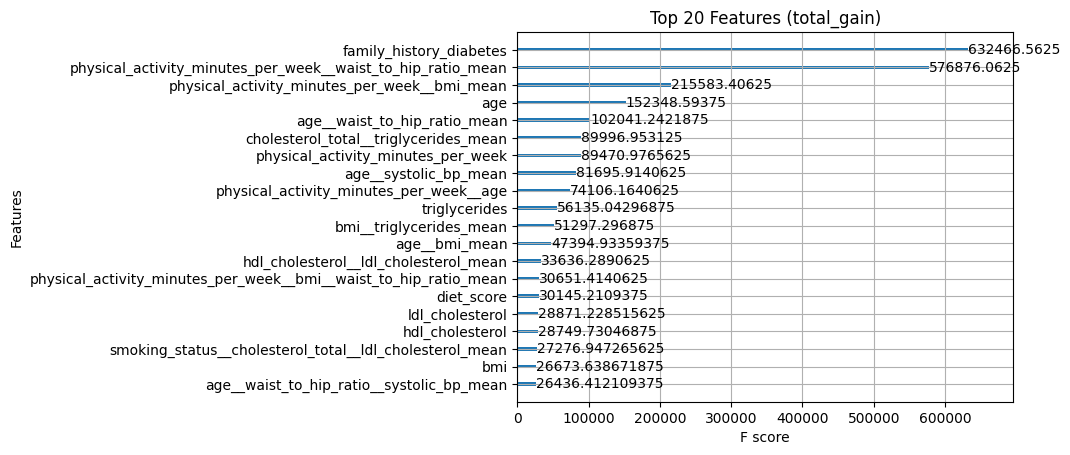

In [398]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
plot_importance(xgb_int, importance_type='total_gain', max_num_features=20)
plt.title("Top 20 Features (total_gain)")
plt.show()


In [392]:
# X_train = X_train.drop(['family_history_diabetes__age'],axis=1)
# X_test = X_test.drop(['family_history_diabetes__age'],axis=1)
X_train.dtypes


age                                                                                int64
alcohol_consumption_per_week                                                       int64
physical_activity_minutes_per_week                                                 int64
diet_score                                                                       float64
sleep_hours_per_day                                                              float64
                                                                                  ...   
bmi__cholesterol_total__ldl_cholesterol__triglycerides_mean                      float64
waist_to_hip_ratio__systolic_bp__diastolic_bp__heart_rate_mean                   float64
diet_score__bmi__cholesterol_total__triglycerides_mean                           float64
physical_activity_minutes_per_week__bmi__waist_to_hip_ratio__systolic_bp_mean    float64
smoking_status__cholesterol_total__ldl_cholesterol__triglycerides_mean           float64
Length: 66, dtype: ob

In [396]:
xgb_int.fit(X_train , y_train ,eval_set = [(X_test,y_test)] , verbose = 200)

[0]	validation_0-auc:0.70210
[200]	validation_0-auc:0.72216
[400]	validation_0-auc:0.72461
[600]	validation_0-auc:0.72563
[800]	validation_0-auc:0.72628
[1000]	validation_0-auc:0.72671
[1200]	validation_0-auc:0.72710
[1400]	validation_0-auc:0.72740
[1600]	validation_0-auc:0.72764
[1800]	validation_0-auc:0.72786
[2000]	validation_0-auc:0.72800
[2200]	validation_0-auc:0.72817
[2400]	validation_0-auc:0.72829
[2600]	validation_0-auc:0.72842
[2800]	validation_0-auc:0.72852
[3000]	validation_0-auc:0.72861
[3200]	validation_0-auc:0.72875
[3400]	validation_0-auc:0.72885
[3600]	validation_0-auc:0.72894
[3800]	validation_0-auc:0.72903
[4000]	validation_0-auc:0.72908
[4200]	validation_0-auc:0.72920
[4400]	validation_0-auc:0.72929
[4600]	validation_0-auc:0.72937
[4800]	validation_0-auc:0.72943
[5000]	validation_0-auc:0.72950
[5200]	validation_0-auc:0.72958
[5400]	validation_0-auc:0.72960
[5600]	validation_0-auc:0.72963
[5800]	validation_0-auc:0.72967
[5999]	validation_0-auc:0.72970


,objective,'binary:logistic'
,use_label_encoder,None
,base_score,None
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.5
,early_stopping_rounds,400
,enable_categorical,True
,eval_metric,'auc'


In [285]:
 # reference: https://www.kaggle.com/code/act18l/say-goodbye-to-ordinalencoder
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator, TransformerMixin
class OrderedTargetEncoder(BaseEstimator, TransformerMixin):
    """
    Out‑of‑fold **mean‑rank** encoder with optional smoothing.
    • Encodes each category by the *rank* of its target mean within a fold.
    • Unseen categories get the global mean rank (or −1 if you prefer).
    """
    def __init__(self, cat_cols=None, n_splits=5, smoothing=0):
        self.cat_cols   = cat_cols
        self.n_splits   = n_splits
        self.smoothing  = smoothing       # 0 = no smoothing
        self.maps_      = {}              # per‑fold maps
        self.global_map = {}              # fit on full data for test set

    def _make_fold_map(self, X_col, y):
        means = y.groupby(X_col, dropna=False).mean()
        if self.smoothing > 0:
            counts = y.groupby(X_col, dropna=False).count()
            smooth = (counts * means + self.smoothing * y.mean()) / (counts + self.smoothing)
            means  = smooth
        return {k: r for r, k in enumerate(means.sort_values().index)}

    def fit(self, X, y):
        X, y = X.reset_index(drop=True), y.reset_index(drop=True)
        if self.cat_cols is None:
            self.cat_cols = X.select_dtypes(include='object').columns.tolist()

        kf = KFold(self.n_splits, shuffle=True, random_state=42)
        self.maps_ = {col: [None]*self.n_splits for col in self.cat_cols}

        for fold, (tr_idx, _) in enumerate(kf.split(X)):
            X_tr, y_tr = X.loc[tr_idx], y.loc[tr_idx]
            for col in self.cat_cols:
                self.maps_[col][fold] = self._make_fold_map(X_tr[col], y_tr)

        for col in self.cat_cols:
            self.global_map[col] = self._make_fold_map(X[col], y)

        return self

    def transform(self, X, y=None, fold=None):
        """
        • During CV pass fold index to use fold‑specific maps (leak‑free).
        • At inference time (fold=None) uses global map.
        """
        X = X.copy()
        tgt_maps = {col: (self.global_map[col] if fold is None else self.maps_[col][fold])
                    for col in self.cat_cols}
        for col, mapping in tgt_maps.items():
            X[col] = X[col].map(mapping).fillna(-1).astype(int)
        return X

In [372]:
data.columns

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

In [338]:
ordr = OrderedTargetEncoder(cat_cols = cat_features ,smoothing=100, n_splits = 10)
ordr.fit(X_train,y_train)

,cat_cols,"['gender', 'ethnicity', ...]"
,n_splits,10
,smoothing,100


In [344]:
X_train_encoded = ordr.transform(X_train)
X_test_encoded = ordr.transform(X_test)
X_test_encoded.columns
X_train.groupby('age')['alcohol_consumption_per_week'].mean()

age
19    2.045045
20    2.048900
21    2.126138
22    2.057627
23    2.095735
        ...   
85    2.101796
86    2.080000
87    2.047619
88    1.983333
89    1.975610
Name: alcohol_consumption_per_week, Length: 71, dtype: float64

In [348]:
X_train.columns

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'physical_activity_minutes_per_week__age'],
      dtype='object')

In [15]:
def target_encoder(df_train, df_val, col, target):
    mean = df_train.groupby(col)[target].mean()
    global_mean = df_train[target].mean()
    col_name = f'{col}_mean'
    df_val = df_val.copy()
    df_val[col_name] = df_val[col].map(mean).fillna(global_mean).astype(float)
    return df_val


In [16]:
selected_interactions = [

   
]

selected_new_interactions = [

    # ===== 2-WAY INTERACTIONS =====
    ['family_history_diabetes', 'bmi'],
    ['family_history_diabetes', 'age'],
    ['family_history_diabetes', 'waist_to_hip_ratio'],
    ['family_history_diabetes', 'cholesterol_total'],
    ['family_history_diabetes', 'triglycerides'],

    ['age', 'triglycerides'],
    ['age', 'cholesterol_total'],
    ['age', 'hdl_cholesterol'],
    ['age', 'ldl_cholesterol'],
    ['age', 'diet_score'],

    ['bmi', 'ldl_cholesterol'],
    ['bmi', 'hdl_cholesterol'],
    ['bmi', 'cholesterol_total'],
    ['bmi', 'heart_rate'],
    ['bmi', 'diet_score'],

    ['waist_to_hip_ratio', 'cholesterol_total'],
    ['waist_to_hip_ratio', 'triglycerides'],
    ['waist_to_hip_ratio', 'hdl_cholesterol'],
    ['waist_to_hip_ratio', 'ldl_cholesterol'],

    ['cholesterol_total', 'diet_score'],
    ['cholesterol_total', 'heart_rate'],
    ['cholesterol_total', 'systolic_bp'],
    ['cholesterol_total', 'physical_activity_minutes_per_week'],

    ['heart_rate', 'systolic_bp'],
    ['heart_rate', 'bmi'],
    ['heart_rate', 'diet_score'],


    # ===== 3-WAY INTERACTIONS =====
    ['family_history_diabetes', 'bmi', 'cholesterol_total'],
    ['family_history_diabetes', 'age', 'triglycerides'],
    ['family_history_diabetes', 'waist_to_hip_ratio', 'ldl_cholesterol'],

    ['age', 'bmi', 'cholesterol_total'],
    ['age', 'waist_to_hip_ratio', 'triglycerides'],

    ['bmi', 'cholesterol_total', 'triglycerides'],
    ['bmi', 'hdl_cholesterol', 'ldl_cholesterol'],
    ['bmi', 'heart_rate', 'systolic_bp'],

    ['waist_to_hip_ratio', 'cholesterol_total', 'triglycerides'],
    ['waist_to_hip_ratio', 'hdl_cholesterol', 'ldl_cholesterol'],

    ['cholesterol_total', 'diet_score', 'triglycerides'],
    ['cholesterol_total', 'heart_rate', 'systolic_bp'],

    ['heart_rate', 'bmi', 'cholesterol_total'],


    # ===== 4-WAY INTERACTIONS =====
    ['family_history_diabetes', 'bmi', 'waist_to_hip_ratio', 'cholesterol_total'],

    ['age', 'bmi', 'cholesterol_total', 'triglycerides'],

    ['bmi', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol'],

    ['waist_to_hip_ratio', 'cholesterol_total', 'triglycerides', 'hdl_cholesterol'],

    ['cholesterol_total', 'diet_score', 'triglycerides', 'hdl_cholesterol'],

    ['heart_rate', 'bmi', 'cholesterol_total', 'systolic_bp'],
]
extra_interactions = [

    # =========================
    # 🔵 2-WAY INTERACTIONS
    # =========================
    ['family_history_diabetes', 'hdl_cholesterol'],
    ['family_history_diabetes', 'ldl_cholesterol'],
    ['family_history_diabetes', 'heart_rate'],
    ['family_history_diabetes', 'diet_score'],
    ['family_history_diabetes', 'physical_activity_minutes_per_week'],

    ['age', 'heart_rate'],
    ['age', 'waist_to_hip_ratio'],   # version nouvelle, si pas dans ancienne liste
    ['age', 'diastolic_bp'],

    ['bmi', 'heart_rate'],
    ['bmi', 'diet_score'],

    ['waist_to_hip_ratio', 'diet_score'],
    ['waist_to_hip_ratio', 'heart_rate'],

    ['hdl_cholesterol', 'triglycerides'],
    ['ldl_cholesterol', 'triglycerides'],

    ['physical_activity_minutes_per_week', 'triglycerides'],
    ['physical_activity_minutes_per_week', 'hdl_cholesterol'],

    ['diet_score', 'triglycerides'],
    ['diet_score', 'hdl_cholesterol'],


    # =========================
    # 🔶 3-WAY INTERACTIONS
    # =========================
    ['family_history_diabetes', 'hdl_cholesterol', 'triglycerides'],
    ['family_history_diabetes', 'ldl_cholesterol', 'triglycerides'],
    ['family_history_diabetes', 'diet_score', 'triglycerides'],

    ['age', 'physical_activity_minutes_per_week', 'waist_to_hip_ratio'],
    ['age', 'physical_activity_minutes_per_week', 'triglycerides'],

    ['age', 'hdl_cholesterol', 'triglycerides'],
    ['age', 'ldl_cholesterol', 'triglycerides'],

    ['bmi', 'physical_activity_minutes_per_week', 'triglycerides'],
    ['bmi', 'diet_score', 'triglycerides'],

    ['waist_to_hip_ratio', 'cholesterol_total', 'triglycerides'],
    ['waist_to_hip_ratio', 'hdl_cholesterol', 'triglycerides'],

    ['cholesterol_total', 'diet_score', 'triglycerides'],
    ['cholesterol_total', 'heart_rate', 'systolic_bp'],

    ['heart_rate', 'bmi', 'cholesterol_total'],


    # =========================
    # 🔴 4-WAY INTERACTIONS
    # =========================
    ['family_history_diabetes', 'age', 'triglycerides', 'hdl_cholesterol'],

    ['age', 'bmi', 'cholesterol_total', 'triglycerides'],

    ['bmi', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol'],

    ['waist_to_hip_ratio', 'cholesterol_total', 'triglycerides', 'hdl_cholesterol'],

    ['cholesterol_total', 'diet_score', 'triglycerides', 'hdl_cholesterol'],

    ['heart_rate', 'bmi', 'cholesterol_total', 'systolic_bp'],
]

selected_interactions = selected_interactions + selected_new_interactions + extra_interactions
selected_interactions

[['family_history_diabetes', 'bmi'],
 ['family_history_diabetes', 'age'],
 ['family_history_diabetes', 'waist_to_hip_ratio'],
 ['family_history_diabetes', 'cholesterol_total'],
 ['family_history_diabetes', 'triglycerides'],
 ['age', 'triglycerides'],
 ['age', 'cholesterol_total'],
 ['age', 'hdl_cholesterol'],
 ['age', 'ldl_cholesterol'],
 ['age', 'diet_score'],
 ['bmi', 'ldl_cholesterol'],
 ['bmi', 'hdl_cholesterol'],
 ['bmi', 'cholesterol_total'],
 ['bmi', 'heart_rate'],
 ['bmi', 'diet_score'],
 ['waist_to_hip_ratio', 'cholesterol_total'],
 ['waist_to_hip_ratio', 'triglycerides'],
 ['waist_to_hip_ratio', 'hdl_cholesterol'],
 ['waist_to_hip_ratio', 'ldl_cholesterol'],
 ['cholesterol_total', 'diet_score'],
 ['cholesterol_total', 'heart_rate'],
 ['cholesterol_total', 'systolic_bp'],
 ['cholesterol_total', 'physical_activity_minutes_per_week'],
 ['heart_rate', 'systolic_bp'],
 ['heart_rate', 'bmi'],
 ['heart_rate', 'diet_score'],
 ['family_history_diabetes', 'bmi', 'cholesterol_total'],
 

In [17]:
interaction_features =[]
for cols in selected_interactions :
    if len(cols) == 2 :
        name = cols[0] + '__' + cols[1]
        X[name] = X[cols[0]].astype(str) + '__'+X[cols[1]].astype(str)
        test[name] = test[cols[0]].astype(str) + '__'+test[cols[1]].astype(str)
    if len(cols) == 3:
        name = cols[0] + '__' + cols[1]+'__'+cols[2]
        X[name] = X[cols[0]].astype(str) + '__'+X[cols[1]].astype(str)+'__'+X[cols[2]].astype(str)
        test[name] = test[cols[0]].astype(str) + '__'+test[cols[1]].astype(str)+'__'+test[cols[2]].astype(str)
    if len(cols) == 4 :
        name = cols[0] + '__' + cols[1]+'__'+cols[2]+'__'+cols[3]
        X[name] = X[cols[0]].astype(str) + '__'+X[cols[1]].astype(str)+'__'+X[cols[2]].astype(str)+'__'+X[cols[3]].astype(str)
        test[name] = test[cols[0]].astype(str) + '__'+test[cols[1]].astype(str)+'__'+test[cols[2]].astype(str)+'__'+test[cols[3]].astype(str)

    interaction_features.append(name)
    



In [18]:
interaction_features


['family_history_diabetes__bmi',
 'family_history_diabetes__age',
 'family_history_diabetes__waist_to_hip_ratio',
 'family_history_diabetes__cholesterol_total',
 'family_history_diabetes__triglycerides',
 'age__triglycerides',
 'age__cholesterol_total',
 'age__hdl_cholesterol',
 'age__ldl_cholesterol',
 'age__diet_score',
 'bmi__ldl_cholesterol',
 'bmi__hdl_cholesterol',
 'bmi__cholesterol_total',
 'bmi__heart_rate',
 'bmi__diet_score',
 'waist_to_hip_ratio__cholesterol_total',
 'waist_to_hip_ratio__triglycerides',
 'waist_to_hip_ratio__hdl_cholesterol',
 'waist_to_hip_ratio__ldl_cholesterol',
 'cholesterol_total__diet_score',
 'cholesterol_total__heart_rate',
 'cholesterol_total__systolic_bp',
 'cholesterol_total__physical_activity_minutes_per_week',
 'heart_rate__systolic_bp',
 'heart_rate__bmi',
 'heart_rate__diet_score',
 'family_history_diabetes__bmi__cholesterol_total',
 'family_history_diabetes__age__triglycerides',
 'family_history_diabetes__waist_to_hip_ratio__ldl_cholesterol'

In [19]:
import gc
from sklearn.model_selection import StratifiedKFold , KFold
pred = np.zeros(len(test))
oof = np.zeros(len(X))
k = 5
startK = StratifiedKFold(n_splits=k , shuffle = True , random_state=88)
for fold,(tr_idx , vl_idx)  in enumerate(startK.split(X,y)):
    print('fold ---------------- '+str(fold))
    X_tr_raw = X.iloc[tr_idx].reset_index(drop=True)
    y_tr_raw=y.iloc[tr_idx].reset_index(drop=True)

    X_vl_raw  = X.iloc[vl_idx].reset_index(drop=True)
    y_vl=y.iloc[vl_idx].reset_index(drop=True)
    X_tr , X_vl  = X_tr_raw.copy(), X_vl_raw.copy()
    X_ts = test.copy(deep=True)

    for col in interaction_features:
        X_tr[f'{col}_mean'] = np.nan
        X_vl[f'{col}_mean'] = np.nan
        X_ts[f'{col}_mean'] = np.nan


    inner_startkfold = KFold(n_splits = k , shuffle=True , random_state=88)
    

    for _ ,(tr_idx_in,vl_idx_in) in enumerate(inner_startkfold.split(X_tr_raw)):
        in_tr = pd.concat([X_tr_raw.iloc[tr_idx_in],y_tr_raw.iloc[tr_idx_in]],axis=1)
        in_vl = X_tr_raw.iloc[vl_idx_in]
        for col in interaction_features :
           

            
            te_temp = target_encoder(in_tr, in_vl.copy(),col,'diagnosed_diabetes')
            te_col = f'{col}_mean'
            
            X_tr.loc[vl_idx_in,te_col] = te_temp[te_col].values
    assert not X_tr[[f'{c}_mean' for c in interaction_features]].isnull().any().any(), \
    "NaN detected in X_tr after OOF target encoding"
    tr_with_y = pd.concat([X_tr_raw, y_tr_raw], axis=1)

    for col in interaction_features :
       
        
        te_col=f'{col}_mean'
        tmp = target_encoder(tr_with_y, X_vl[[col]].copy(), col, 'diagnosed_diabetes')
        X_vl[f'{col}_mean'] = tmp[f'{col}_mean'].values

        tmp = target_encoder(tr_with_y, X_ts[[col]].copy(), col, 'diagnosed_diabetes')
        X_ts[f'{col}_mean'] = tmp[f'{col}_mean'].values

    X_tr.drop(interaction_features ,axis = 1 , inplace =True)
    X_vl.drop(interaction_features ,axis = 1 , inplace =True)
    X_ts.drop(interaction_features ,axis = 1 , inplace =True)
    print('=================fitting=========model')
    xgb_int.fit(X_tr,y_tr_raw , eval_set = [(X_vl,y_vl)] , verbose = 400)
    y_vl_pred = xgb_int.predict_proba(X_vl)[:,1]
    pred += xgb_int.predict_proba(X_ts)[:,1]
    oof[vl_idx] = xgb_int.predict_proba(X_vl)[:,1]
    auc = roc_auc_score(y_vl,y_vl_pred)
    print('auc ============='+str(fold) + '==========' +str(auc))
    del  X_tr_raw , y_tr_raw,X_vl_raw ,y_vl ,X_tr , X_vl ,X_ts
pred /= k
score_final = roc_auc_score(y , oof)


fold ---------------- 0
=================fitting=========model
[0]	validation_0-auc:0.70922
[400]	validation_0-auc:0.72613
[800]	validation_0-auc:0.72738
[1200]	validation_0-auc:0.72786
[1600]	validation_0-auc:0.72804
[2000]	validation_0-auc:0.72809
[2332]	validation_0-auc:0.72810
auc =============0==========0.7281117874230971
fold ---------------- 1
=================fitting=========model
[0]	validation_0-auc:0.71078
[400]	validation_0-auc:0.72923
[800]	validation_0-auc:0.73030
[1200]	validation_0-auc:0.73058
[1600]	validation_0-auc:0.73066
[2000]	validation_0-auc:0.73064
[2255]	validation_0-auc:0.73059
auc =============1==========0.7306882948813962
fold ---------------- 2
=================fitting=========model
[0]	validation_0-auc:0.71284
[400]	validation_0-auc:0.73081
[800]	validation_0-auc:0.73159
[1200]	validation_0-auc:0.73182
[1600]	validation_0-auc:0.73184
[1727]	validation_0-auc:0.73186
auc =============2==========0.7318948720462193
fold ---------------- 3
=================fitt

In [384]:
X.drop(interaction_features,axis=1 , inplace=True)

In [30]:
pred

array([0.46264258, 0.73736436, 0.8079343 , ..., 0.5846246 , 0.5929072 ,
       0.62178495])

<Figure size 1000x1200 with 0 Axes>

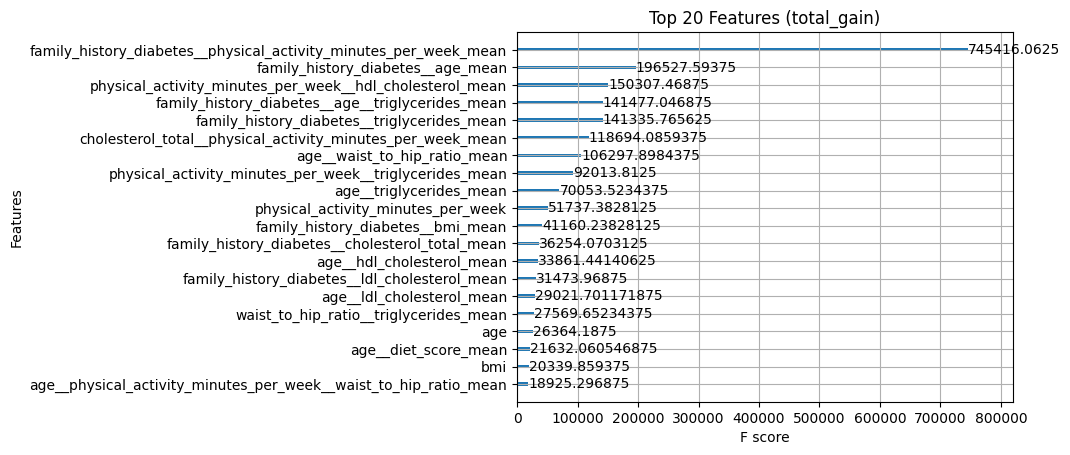

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 12))
plot_importance(xgb_int, importance_type='total_gain', max_num_features=20)
plt.title("Top 20 Features (total_gain)")
plt.show()

In [22]:
submission = pd.DataFrame({
    "id": test.index,
    "diagnosed_diabetes": pred
})

In [23]:
submission.to_csv('gboost_interactionss 3.csv',index=False)

In [20]:
score_final

0.72981913777084